In [ ]:
import pandas as pd
from collections import Counter

import numpy as np
import pandas as pd
from os import path
from PIL import Image
import math


import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style("ticks")


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import statsmodels.tsa.stattools as stattools

from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import csv
import scipy
import os


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
## this function takes 2 time series and creates a cross correlation plot

def ccf_plot (x1,y1,dat):
    
    df40 = dat.dropna(subset=[x1,y1])
   
    x = df40[x1]
    y = df40[y1]


    ccs1= stattools.ccf(x, y, adjusted=True)[:50]
    ccs2= stattools.ccf(y, x, adjusted=True)[:50][::-1]

    ccs = np.concatenate((ccs2,ccs1))

    nlags = len(ccs)


    # Compute the Significance level
    # ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
    conf_level = 2 / np.sqrt(nlags*2)

    # Draw Plot
    plt.figure(figsize=(8,8), dpi= 300)

    ## horizontal lines
    plt.hlines(0, xmin=0, xmax=100, color='black')  # 0 axis
    plt.hlines(conf_level, xmin=0, xmax=100, color='gray', linestyles  ='dotted' )
    plt.hlines(-conf_level, xmin=0, xmax=100, color='gray', linestyles  ='dotted')

    ## vertical line
    plt.axvline(25, ymin=0, ymax=1, color='red',  alpha = 0.6)

    
    #plt.vlines(50,  color='blue', linestyles  ='dotted', alpha = 0.7, linewidth = 4)


    #plt.bar(x=np.arange(len(ccs)), height=ccs, width=0.6, color = 'black')
    plt.bar(x=np.arange(len(ccs[25:75])), height=ccs[25:75], width=0.6, color = 'black')


    # Decoration
    plt.title('Time Lags ' + str(x1) + ' - ' + str(y1), fontsize=28)
    plt.xlim(0,len(ccs[25:75]))

    ## how many tics in x axis?
    plt.xticks([5, 25,  45], ['-20', '0', '20'])

    ## labels
    plt.xlabel('Time lag (Years)', fontsize=30)
    plt.ylabel('Correlation', fontsize=30)

    ## saves both in png and svg format
    plt.savefig(str(x1)+' - '+str(y1)+".svg", format="svg")
    plt.savefig(str(x1)+' - '+str(y1)+".png", format="png", bbox_inches="tight")

In [ ]:
## General data set
base_dir = os.getcwd()

df = pd.read_csv(base_dir +"/3.2_output_CompleteData_by_year.csv")
df


Unnamed: 0  year  text_per_year  impulsive_feelings  slow_feelings  \
0             0  1576              1            0.012821       0.000000   
1             1  1577              1            0.004762       0.033333   
2             2  1583              1            0.008493       0.027601   
3             3  1584              3            0.018565       0.013926   
4             4  1587              4            0.008696       0.039027   
..          ...   ...            ...                 ...            ...   
181         181  1796              6            0.015703       0.030267   
182         182  1797              4            0.008128       0.036474   
183         183  1798              7            0.011338       0.042140   
184         184  1799              6            0.016005       0.042097   
185         185  1800              4            0.013459       0.013787   

     pleasure  asceticism  short_term  long_term  physical  ...  Population  \
0    0.025641    0.000000    0.000000   0.000000  0.038462  ...   3447944.0   
1    0.033333    0.000000    0.000000   0.023810  0.014286  ...   3484643.6   
2    0.023355    0.004246    0.002123   0.004246  0.008493  ...   3715123.2   
3    0.038110    0.006709    0.017733   0.016079  0.034065  ...   3756963.8   
4    0.016822    0.005952    0.007402   0.005072  0.009420  ...   3860085.2   
..        ...         ...         ...        ...       ...  ...         ...   
181  0.011109    0.010594    0.008021   0.023520  0.017754  ...   8256323.0   
182  0.011996    0.003623    0.001812   0.019819  0.009439  ...   8339346.2   
183  0.013643    0.002902    0.001764   0.038471  0.021595  ...   8422369.4   
184  0.009259    0.005864    0.009689   0.033873  0.015950  ...   8505392.6   
185  0.007583    0.010417    0.001225   0.012714  0.062051  ...   8588415.8   

     TotalEduMen  TotalEduWomen  TotalEduAll  birth_per_marriage  familyLIWC  \
0           1.09           0.47         0.78            3.461538    0.500000   
1           1.09           0.47         0.78            3.488875    0.930000   
2           1.10           0.48         0.79            3.515727    0.250000   
3           1.10           0.48         0.79            3.472140    0.356667   
4           1.12           0.48         0.80            3.393529    0.672500   
..           ...            ...          ...                 ...         ...   
181         1.65           1.13         1.39            4.335775    0.616667   
182         1.65           1.12         1.39            4.312050    0.662500   
183         1.66           1.14         1.40            4.289120    1.001429   
184         1.65           1.14         1.39            4.266945    0.778333   
185         1.65           1.14         1.39            4.245490    0.862500   

     friendLIWC  sexualLIWC  focusfutureLIWC  focuspresentLIWC  
0      0.490000    0.100000         4.230000         15.270000  
1      0.370000    0.120000         3.460000         15.740000  
2      0.130000    0.090000         3.150000         13.690000  
3      0.176667    0.276667         3.210000         12.443333  
4      0.307500    0.115000         2.905000         10.727500  
..          ...         ...              ...               ...  
181    0.486667    0.331667         2.121667         11.211667  
182    0.512500    0.100000         2.625000         12.777500  
183    0.635714    0.121429         2.657143         12.532857  
184    0.478333    0.123333         2.230000         11.190000  
185    0.610000    0.060000         2.370000         12.732500  

[186 rows x 83 columns]

In [ ]:
vars = list(df.columns)

In [ ]:
#### HERE SET UP DATABASE FOR THE PLOTS####

graph_vars = []
df2 = pd.DataFrame()

## basically make sure all vars are numeric
for item in vars:
    if item not in ['','.1','author','theatre','period']:
        df2[item] = pd.to_numeric(df[item])
        graph_vars += [item]
      
#print(graph_vars)
df2

Unnamed: 0  year  text_per_year  impulsive_feelings  slow_feelings  \
0             0  1576              1            0.012821       0.000000   
1             1  1577              1            0.004762       0.033333   
2             2  1583              1            0.008493       0.027601   
3             3  1584              3            0.018565       0.013926   
4             4  1587              4            0.008696       0.039027   
..          ...   ...            ...                 ...            ...   
181         181  1796              6            0.015703       0.030267   
182         182  1797              4            0.008128       0.036474   
183         183  1798              7            0.011338       0.042140   
184         184  1799              6            0.016005       0.042097   
185         185  1800              4            0.013459       0.013787   

     pleasure  asceticism  short_term  long_term  physical  ...  Population  \
0    0.025641    0.000000    0.000000   0.000000  0.038462  ...   3447944.0   
1    0.033333    0.000000    0.000000   0.023810  0.014286  ...   3484643.6   
2    0.023355    0.004246    0.002123   0.004246  0.008493  ...   3715123.2   
3    0.038110    0.006709    0.017733   0.016079  0.034065  ...   3756963.8   
4    0.016822    0.005952    0.007402   0.005072  0.009420  ...   3860085.2   
..        ...         ...         ...        ...       ...  ...         ...   
181  0.011109    0.010594    0.008021   0.023520  0.017754  ...   8256323.0   
182  0.011996    0.003623    0.001812   0.019819  0.009439  ...   8339346.2   
183  0.013643    0.002902    0.001764   0.038471  0.021595  ...   8422369.4   
184  0.009259    0.005864    0.009689   0.033873  0.015950  ...   8505392.6   
185  0.007583    0.010417    0.001225   0.012714  0.062051  ...   8588415.8   

     TotalEduMen  TotalEduWomen  TotalEduAll  birth_per_marriage  familyLIWC  \
0           1.09           0.47         0.78            3.461538    0.500000   
1           1.09           0.47         0.78            3.488875    0.930000   
2           1.10           0.48         0.79            3.515727    0.250000   
3           1.10           0.48         0.79            3.472140    0.356667   
4           1.12           0.48         0.80            3.393529    0.672500   
..           ...            ...          ...                 ...         ...   
181         1.65           1.13         1.39            4.335775    0.616667   
182         1.65           1.12         1.39            4.312050    0.662500   
183         1.66           1.14         1.40            4.289120    1.001429   
184         1.65           1.14         1.39            4.266945    0.778333   
185         1.65           1.14         1.39            4.245490    0.862500   

     friendLIWC  sexualLIWC  focusfutureLIWC  focuspresentLIWC  
0      0.490000    0.100000         4.230000         15.270000  
1      0.370000    0.120000         3.460000         15.740000  
2      0.130000    0.090000         3.150000         13.690000  
3      0.176667    0.276667         3.210000         12.443333  
4      0.307500    0.115000         2.905000         10.727500  
..          ...         ...              ...               ...  
181    0.486667    0.331667         2.121667         11.211667  
182    0.512500    0.100000         2.625000         12.777500  
183    0.635714    0.121429         2.657143         12.532857  
184    0.478333    0.123333         2.230000         11.190000  
185    0.610000    0.060000         2.370000         12.732500  

[186 rows x 83 columns]

In [ ]:
## make a copy

df3 = df2.copy()

In [ ]:
## General data set
base_dir = os.getcwd()

df4 = pd.read_csv(base_dir +"/demographics.csv")
df4



year  GDPpc  Wages  Books  inflation  life_expectancy         period  \
0    1564   1179   2.10   18.7  -0.238013           38.466  pre_civil_war   
1    1565   1176   1.91   27.9  10.343658           39.068  pre_civil_war   
2    1566   1315   2.12   29.0 -10.279028           39.670  pre_civil_war   
3    1567   1229   2.13   28.3  -0.490940           39.948  pre_civil_war   
4    1568   1222   1.97   23.4   8.183530           40.226  pre_civil_war   
..    ...    ...    ...    ...        ...              ...            ...   
242  1806   2062   3.24   84.2  -6.362153           40.580            NaN   
243  1807   2167   3.39   80.6  -4.529617           40.714            NaN   
244  1808   2039   3.20   89.1   6.204380           40.848            NaN   
245  1809   2076   2.84   85.4  12.628866           40.982            NaN   
246  1810   2182   2.96  135.8   2.898551           41.116            NaN   

     marriage  natural pop increase  death rate  ...  Migration  \
0       9.938                10.108      25.206  ...     4762.6   
1       9.794                10.024      24.708  ...     4822.8   
2       9.650                 9.940      24.210  ...     4883.0   
3       9.694                 9.880      23.914  ...     4909.6   
4       9.738                 9.820      23.618  ...     4936.2   
..        ...                   ...         ...  ...        ...   
242     8.080                14.220      23.680  ...     9422.0   
243     8.148                14.562      23.594  ...     9578.2   
244     8.216                14.904      23.508  ...     9734.4   
245     8.284                15.246      23.422  ...     9890.6   
246     8.352                15.588      23.336  ...    10046.8   

     Intrinsic growth   net reproduction rate  Gross reproduction rate  \
0                0.934                  1.352                    2.416   
1                0.922                  1.346                    2.368   
2                0.910                  1.340                    2.320   
3                0.882                  1.328                    2.286   
4                0.854                  1.316                    2.252   
..                 ...                    ...                      ...   
242              1.520                  1.590                    2.670   
243              1.554                  1.606                    2.690   
244              1.588                  1.622                    2.710   
245              1.622                  1.638                    2.730   
246              1.656                  1.654                    2.750   

     annual growth rate  Population  TotalEduMen  TotalEduWomen  TotalEduAll  \
0                 0.860   3118382.0         1.04           0.46         0.75   
1                 0.850   3145947.0         1.04           0.46         0.75   
2                 0.840   3173512.0         1.05           0.46         0.75   
3                 0.836   3200853.4         1.05           0.46         0.75   
4                 0.832   3228194.8         1.05           0.46         0.76   
..                  ...         ...          ...            ...          ...   
242               1.320   9232494.0         1.59           1.16         1.38   
243               1.354   9358786.2         1.59           1.16         1.37   
244               1.388   9485078.4         1.58           1.16         1.37   
245               1.422   9611370.6         1.56           1.14         1.35   
246               1.456   9737662.8         1.55           1.15         1.35   

     birth_per_marriage  
0              3.554035  
1              3.547070  
2              3.539896  
3              3.486899  
4              3.434381  
..                  ...  
242            4.690594  
243            4.682867  
244            4.675268  
245            4.667793  
246            4.660441  

[247 rows x 21 columns]

In [ ]:
vars2 = list(df4.columns)

In [ ]:

#### HERE SET UP DATABASE FOR THE PLOTS####

graph_vars2 = []
df5 = df4.copy()
for item in vars2:
    if item not in ['','Period','period']:
        df5[item] = pd.to_numeric(df4[item])
        graph_vars2 += [item]


## Z-score the sociodemographics
from scipy import stats

soc_vars = graph_vars2

for var in soc_vars:
    if var not in ['','year']:
        df5[var] = stats.zscore(df5[var],nan_policy='omit') 

#print(graph_vars)
df5


year     GDPpc     Wages     Books  inflation  life_expectancy  \
0    1564 -0.688978 -0.176148 -1.526843  -0.139644         0.499278   
1    1565 -0.697536 -0.481414 -1.428798   0.960660         0.719503   
2    1566 -0.301051 -0.144014 -1.417075  -1.183731         0.939728   
3    1567 -0.546358 -0.127948 -1.424535  -0.165944         1.041427   
4    1568 -0.566325 -0.385014 -1.476755   0.736046         1.143125   
..    ...       ...       ...       ...        ...              ...   
242  1806  1.829700  1.655449 -0.828803  -0.776446         1.272627   
243  1807  2.129203  1.896449 -0.867169  -0.585895         1.321647   
244  1808  1.764095  1.591183 -0.776583   0.530249         1.370667   
245  1809  1.869634  1.012784 -0.816015   1.198281         1.419687   
246  1810  2.171990  1.205583 -0.278897   0.186502         1.468707   

            period  marriage  natural pop increase  death rate  ...  \
0    pre_civil_war  2.110439              1.026339   -0.515671  ...   
1    pre_civil_war  1.924597              1.006171   -0.718544  ...   
2    pre_civil_war  1.738755              0.986003   -0.921416  ...   
3    pre_civil_war  1.795540              0.971598   -1.041999  ...   
4    pre_civil_war  1.852325              0.957192   -1.162582  ...   
..             ...       ...                   ...         ...  ...   
242            NaN -0.287436              2.013602   -1.137325  ...   
243            NaN -0.199677              2.095714   -1.172359  ...   
244            NaN -0.111919              2.177826   -1.207394  ...   
245            NaN -0.024160              2.259938   -1.242428  ...   
246            NaN  0.063598              2.342050   -1.277462  ...   

     Migration  Intrinsic growth   net reproduction rate  \
0    -1.271857           0.758122               0.810069   
1    -1.209489           0.734007               0.776428   
2    -1.147121           0.709892               0.742786   
3    -1.119563           0.653624               0.675504   
4    -1.092005           0.597356               0.608221   
..         ...                ...                    ...   
242   3.555346           1.935733               2.144506   
243   3.717171           2.004059               2.234216   
244   3.878996           2.072384               2.323926   
245   4.040822           2.140710               2.413636   
246   4.202647           2.209035               2.503346   

     Gross reproduction rate  annual growth rate  Population  TotalEduMen  \
0                   0.895009            0.934573   -1.748609    -1.871710   
1                   0.667876            0.910530   -1.728184    -1.871710   
2                   0.440742            0.886486   -1.707760    -1.836513   
3                   0.279856            0.876869   -1.687500    -1.836513   
4                   0.118969            0.867252   -1.667241    -1.836513   
..                       ...                 ...         ...          ...   
242                 2.096925            2.040564    2.781742     0.064124   
243                 2.191564            2.122311    2.875321     0.064124   
244                 2.286203            2.204058    2.968899     0.028927   
245                 2.380842            2.285805    3.062477    -0.041467   
246                 2.475481            2.367552    3.156055    -0.076664   

     TotalEduWomen  TotalEduAll  birth_per_marriage  
0        -1.532035    -1.770904           -1.091147  
1        -1.532035    -1.770904           -1.112563  
2        -1.532035    -1.770904           -1.134619  
3        -1.532035    -1.770904           -1.297569  
4        -1.532035    -1.731175           -1.459046  
..             ...          ...                 ...  
242       1.446587     0.732006            2.403417  
243       1.446587     0.692277            2.379659  
244       1.446587     0.692277            2.356294  
245       1.361484     0.612820            2.333312  
246       1.404035     0.612820            2.310705  

[247

<ipython-input-19-d0ff52bf4f4b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out3['rolledvar1'] = rolling_item.mean()
<ipython-input-19-d0ff52bf4f4b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out3['rolledvar1'] = rolling_item.mean()
<ipython-input-19-d0ff52bf4f4b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

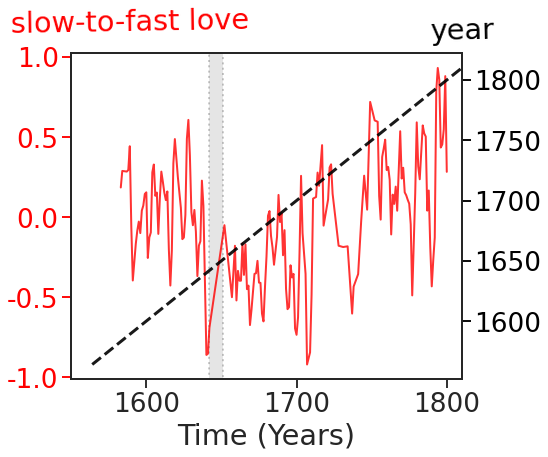

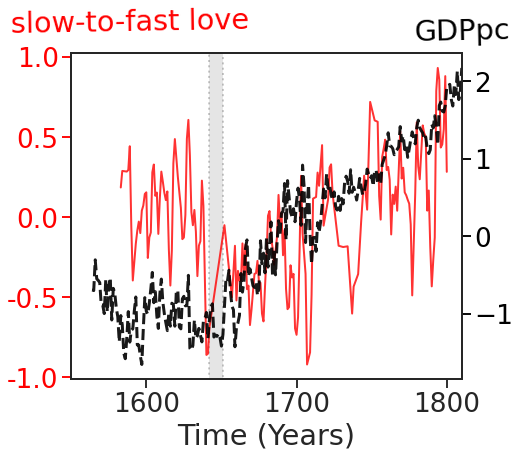

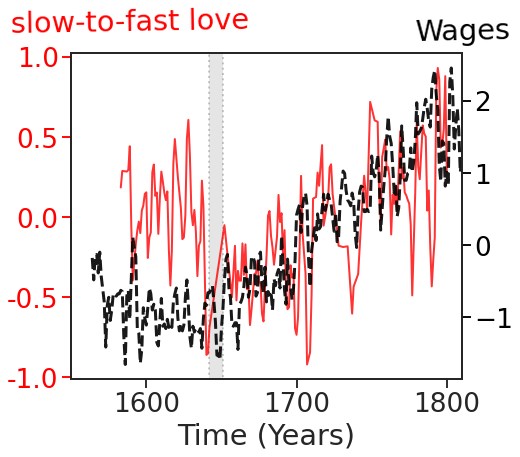

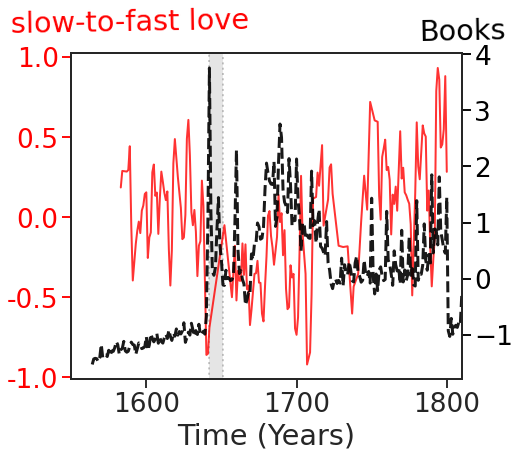

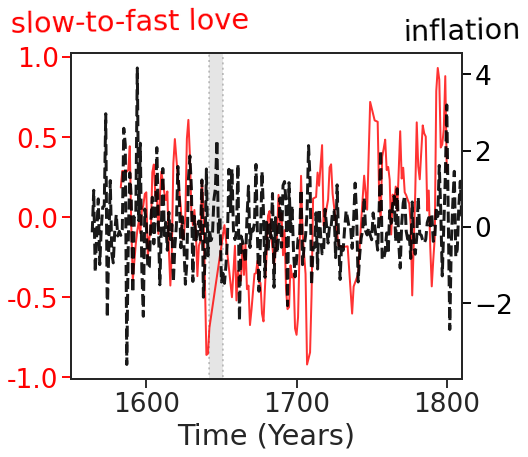

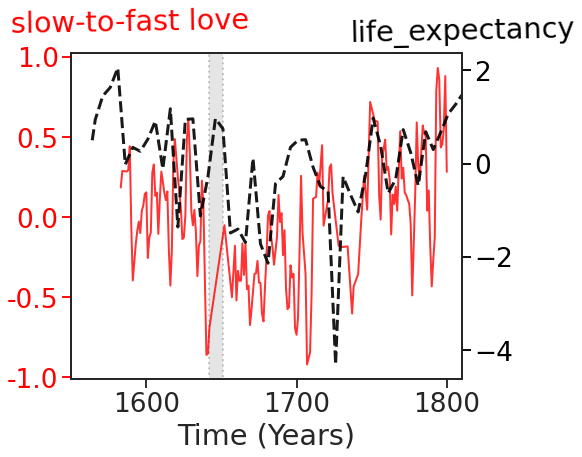

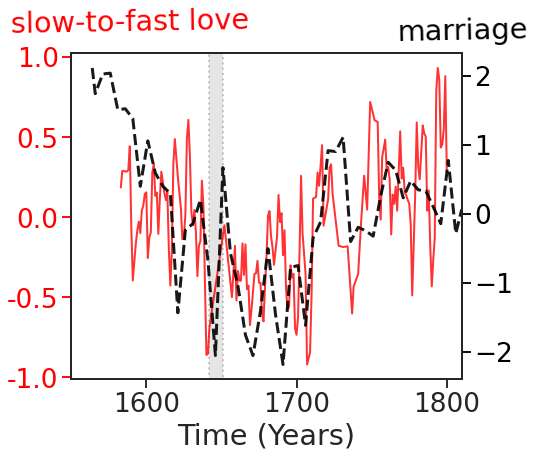

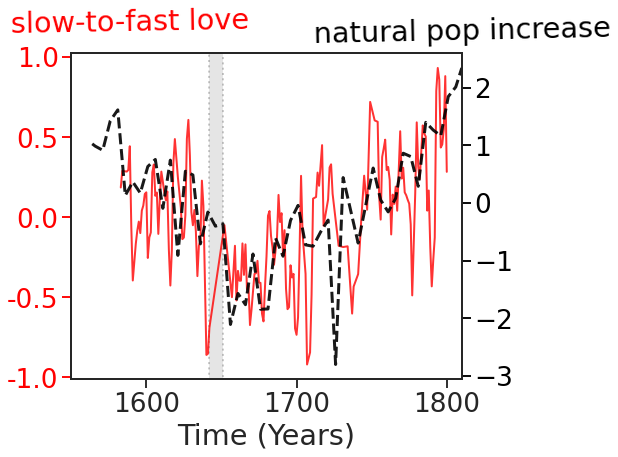

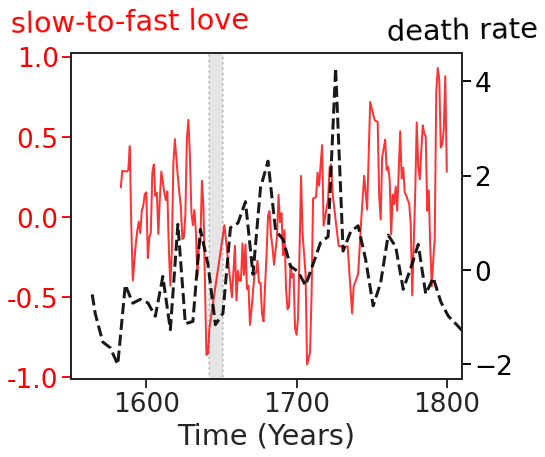

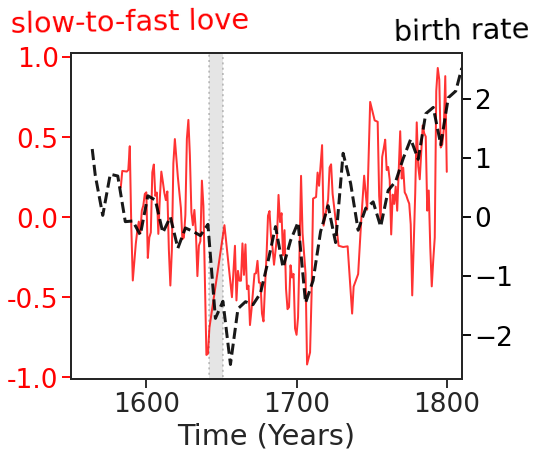

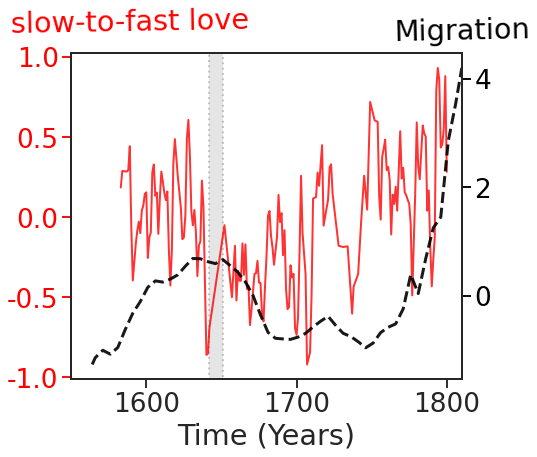

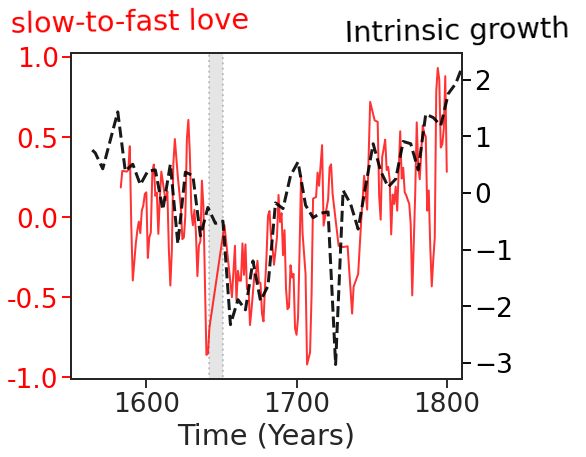

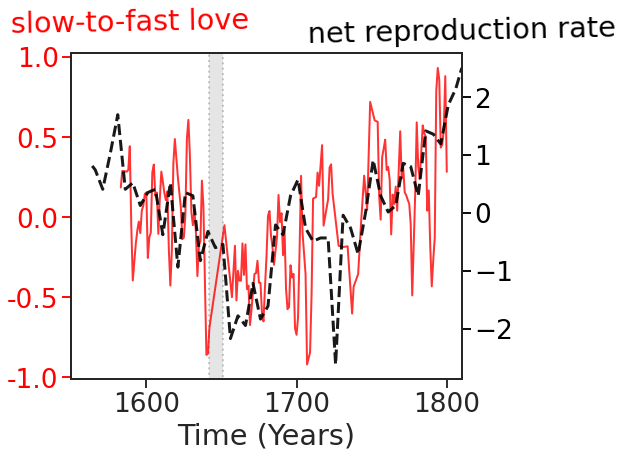

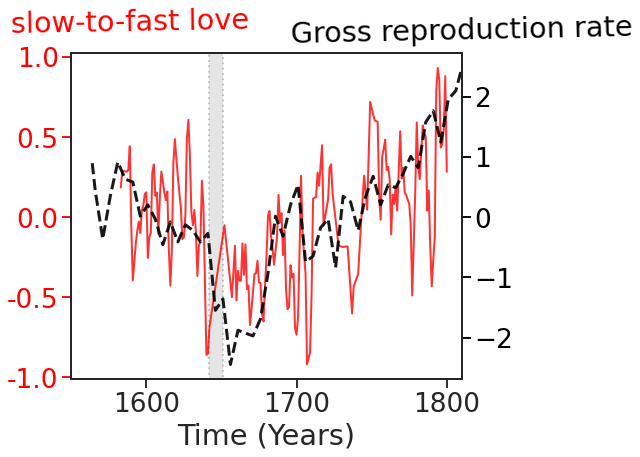

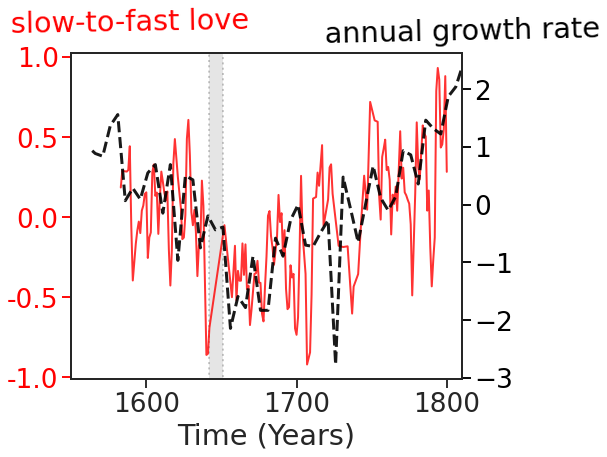

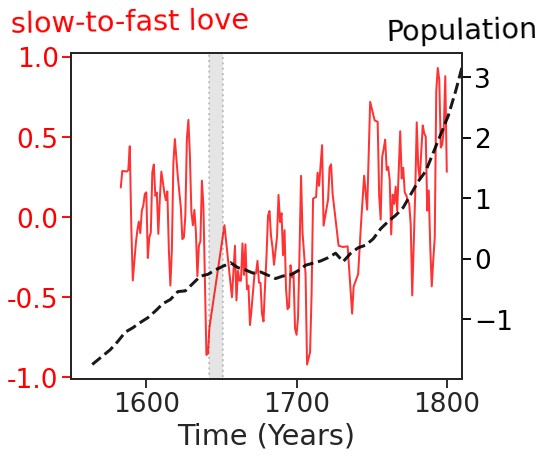

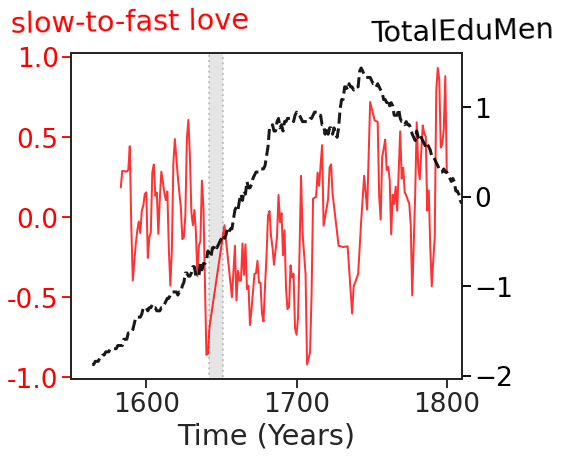

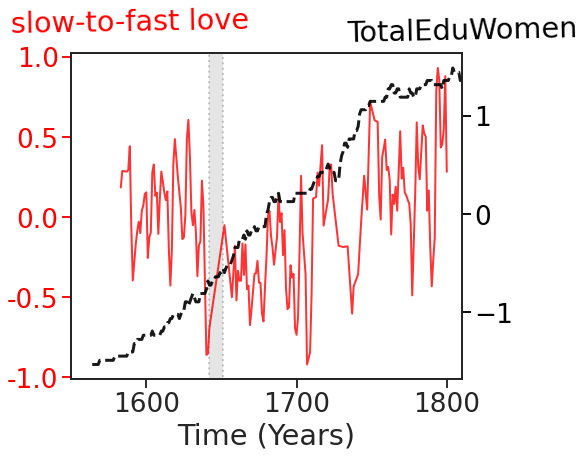

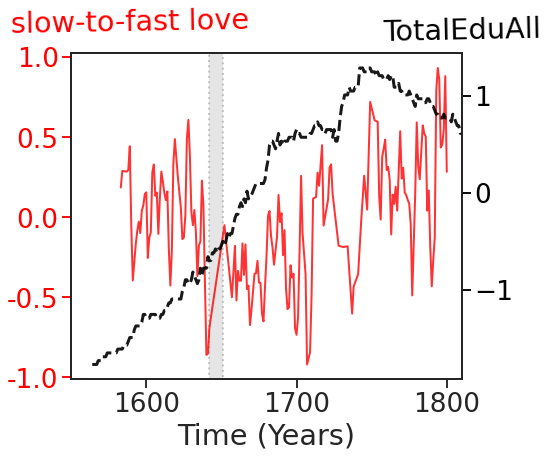

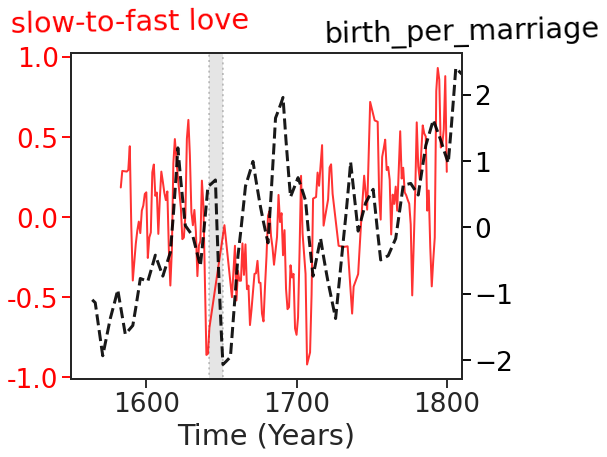

In [ ]:
## Ratio linear plots
df_out3=pd.DataFrame()

df3['slow-to-fast love'] = df3['ratio_feelings2_Out']
df5['year2'] = df5['year']


ratio_list = ['slow-to-fast love']#'slow-to-fast love', 'friend-to-sexual ratio']#'Future_Present_ratio', 'Female_Male_ratio', 'Family_Sexual_ratio', 'Affiliation_Sexual_ratio', 'Friend_Sexual_ratio','ratio_global', 'ratio_emotions', 'ratio_behavior', 'ratio_traits']
socio_economic_list = graph_vars2



for var1 in  ratio_list:
    for var2 in socio_economic_list:
        
        ## Remove outliers
        df_out3 = remove_outlier(df3, var1)
        
        ## Rolling averages
        rolling_item = df_out3[var1].rolling(window=3)
        df_out3['rolledvar1'] = rolling_item.mean()

    
        #%matplotlib inline
        sns.set()
        sns.set_context("talk",font_scale=1.6)
        sns.set_style("white")
        sns.set_style("ticks")


        plt.figure(figsize=(7, 6))
        
        
        ## Psycholgy line
        ax2 = sns.lineplot(x="year", y='rolledvar1', color="red", ci=None, data=df_out3, alpha = 0.8, linewidth = 2)
        #ax2 = sns.lineplot(x="year", y=var1, color="red", ci=None, data=df2, alpha = 0.8, linewidth = 2)


        ax2.set(xlabel='Time (Years)', ylabel=var1)
        ax2.yaxis.label.set_color('red')
        ax2.tick_params(axis='y', colors='red')

        ## Economical line
        ax1 = plt.twinx()
        ax1= sns.lineplot(x="year2", y=var2, color = 'black',ax=ax1,  data=df5, alpha = 0.9, linewidth = 3)
        ax1.set(xlabel='time', ylabel=var2)
        ax1.yaxis.label.set_color('black')
        ax1.tick_params(axis='y', colors='black')
        ax1.lines[0].set_linestyle("--")
        
        
        
        ax2.yaxis.set_label_coords(0.15,1.05)
        ax2.yaxis.label.set_rotation(1)
        
        ax1.yaxis.set_label_coords(1,1.11)
        ax1.yaxis.label.set_rotation(1.2)
        
        ## Adjust x-axis
        plt.xlim(1550, 1810)
        
        start, end = ax2.get_xlim()
        ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
        
        # Add rectangle
        ax2.add_patch(
        patches.Rectangle(
        (1642, -2), # (x,y)
        9, # width
        10, # height
        # You can add rotation as well with 'angle'
        alpha=0.2, facecolor="gray", edgecolor="black", linewidth=2, linestyle='dotted'))

        #plt.title(str(var1).replace('/', '-to-').split(' ')[0] +' and GDPpc year averages in England')

        plt.savefig(str(var1).replace('/', '_')+'_'+str(var2)+".svg", format="svg")
        plt.savefig(str(var1).replace('/', '_')+'_'+str(var2)+".png", format="png", bbox_inches="tight")

In [ ]:
df3

year  text_per_year  impulsive_feelings  slow_feelings  pleasure  \
0    1576              1            0.012821       0.000000  0.025641   
1    1577              1            0.004762       0.033333  0.033333   
2    1583              1            0.008493       0.027601  0.023355   
3    1584              3            0.018565       0.013926  0.038110   
4    1587              4            0.008696       0.039027  0.016822   
..    ...            ...                 ...            ...       ...   
181  1796              6            0.015703       0.030267  0.011109   
182  1797              4            0.008128       0.036474  0.011996   
183  1798              7            0.011338       0.042140  0.013643   
184  1799              6            0.016005       0.042097  0.009259   
185  1800              4            0.013459       0.013787  0.007583   

     asceticism  short_term  long_term  physical     moral  ...  TotalEduMen  \
0      0.000000    0.000000   0.000000  0.038462  0.012821  ...         1.09   
1      0.000000    0.000000   0.023810  0.014286  0.009524  ...         1.09   
2      0.004246    0.002123   0.004246  0.008493  0.010616  ...         1.10   
3      0.006709    0.017733   0.016079  0.034065  0.015646  ...         1.10   
4      0.005952    0.007402   0.005072  0.009420  0.005797  ...         1.12   
..          ...         ...        ...       ...       ...  ...          ...   
181    0.010594    0.008021   0.023520  0.017754  0.025649  ...         1.65   
182    0.003623    0.001812   0.019819  0.009439  0.024527  ...         1.65   
183    0.002902    0.001764   0.038471  0.021595  0.014140  ...         1.66   
184    0.005864    0.009689   0.033873  0.015950  0.029508  ...         1.65   
185    0.010417    0.001225   0.012714  0.062051  0.007659  ...         1.65   

     TotalEduWomen  TotalEduAll  birth_per_marriage  familyLIWC  friendLIWC  \
0             0.47         0.78            3.461538    0.500000    0.490000   
1             0.47         0.78            3.488875    0.930000    0.370000   
2             0.48         0.79            3.515727    0.250000    0.130000   
3             0.48         0.79            3.472140    0.356667    0.176667   
4             0.48         0.80            3.393529    0.672500    0.307500   
..             ...          ...                 ...         ...         ...   
181           1.13         1.39            4.335775    0.616667    0.486667   
182           1.12         1.39            4.312050    0.662500    0.512500   
183           1.14         1.40            4.289120    1.001429    0.635714   
184           1.14         1.39            4.266945    0.778333    0.478333   
185           1.14         1.39            4.245490    0.862500    0.610000   

     sexualLIWC  focusfutureLIWC  focuspresentLIWC  slow-to-fast love  
0      0.100000         4.230000         15.270000          -1.362553  
1      0.120000         3.460000         15.740000           1.290436  
2      0.090000         3.150000         13.690000           0.628748  
3      0.276667         3.210000         12.443333          -1.052508  
4      0.115000         2.905000         10.727500           1.278324  
..          ...              ...               ...                ...  
181    0.331667         2.121667         11.211667           0.152676  
182    0.100000         2.625000         12.777500           1.178983  
183    0.121429         2.657143         12.532857           0.312712  
184    0.123333         2.230000         11.190000           1.150202  
185    0.060000         2.370000         12.732500          -0.613199  

[186 rows x 83 columns]

<ipython-input-28-ebf394ceee4b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Love'] = rolling_item.mean()


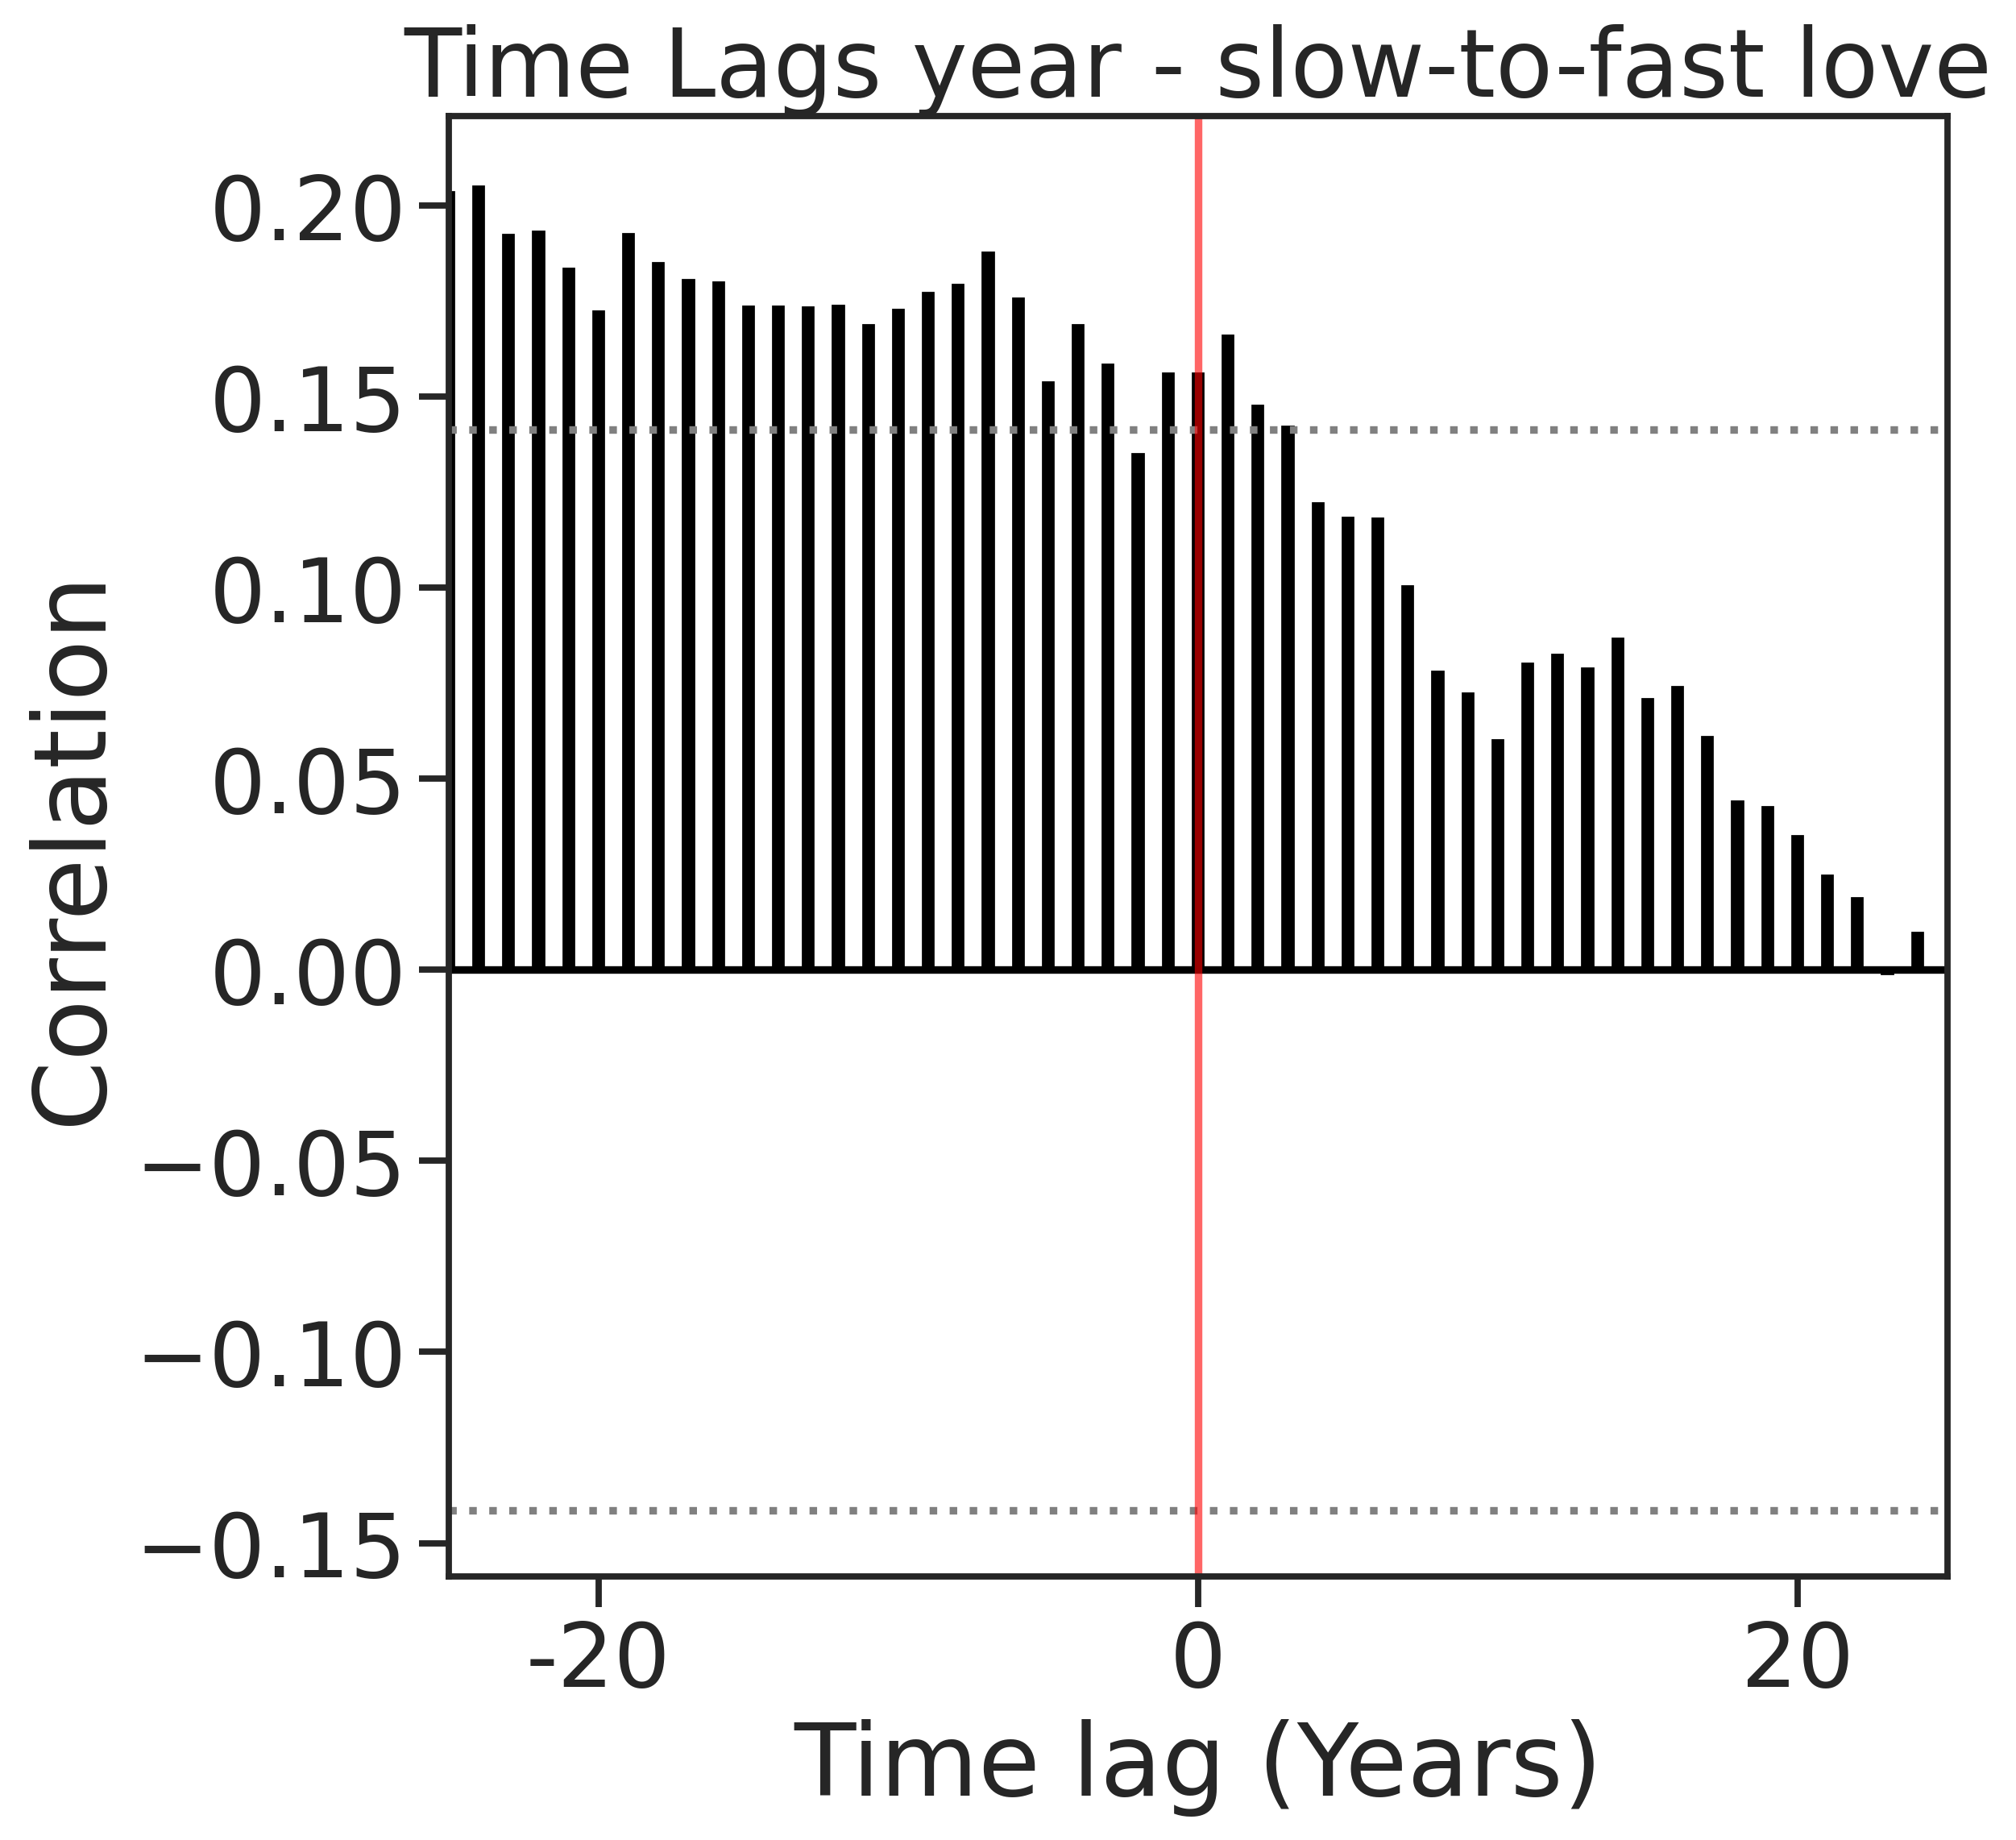

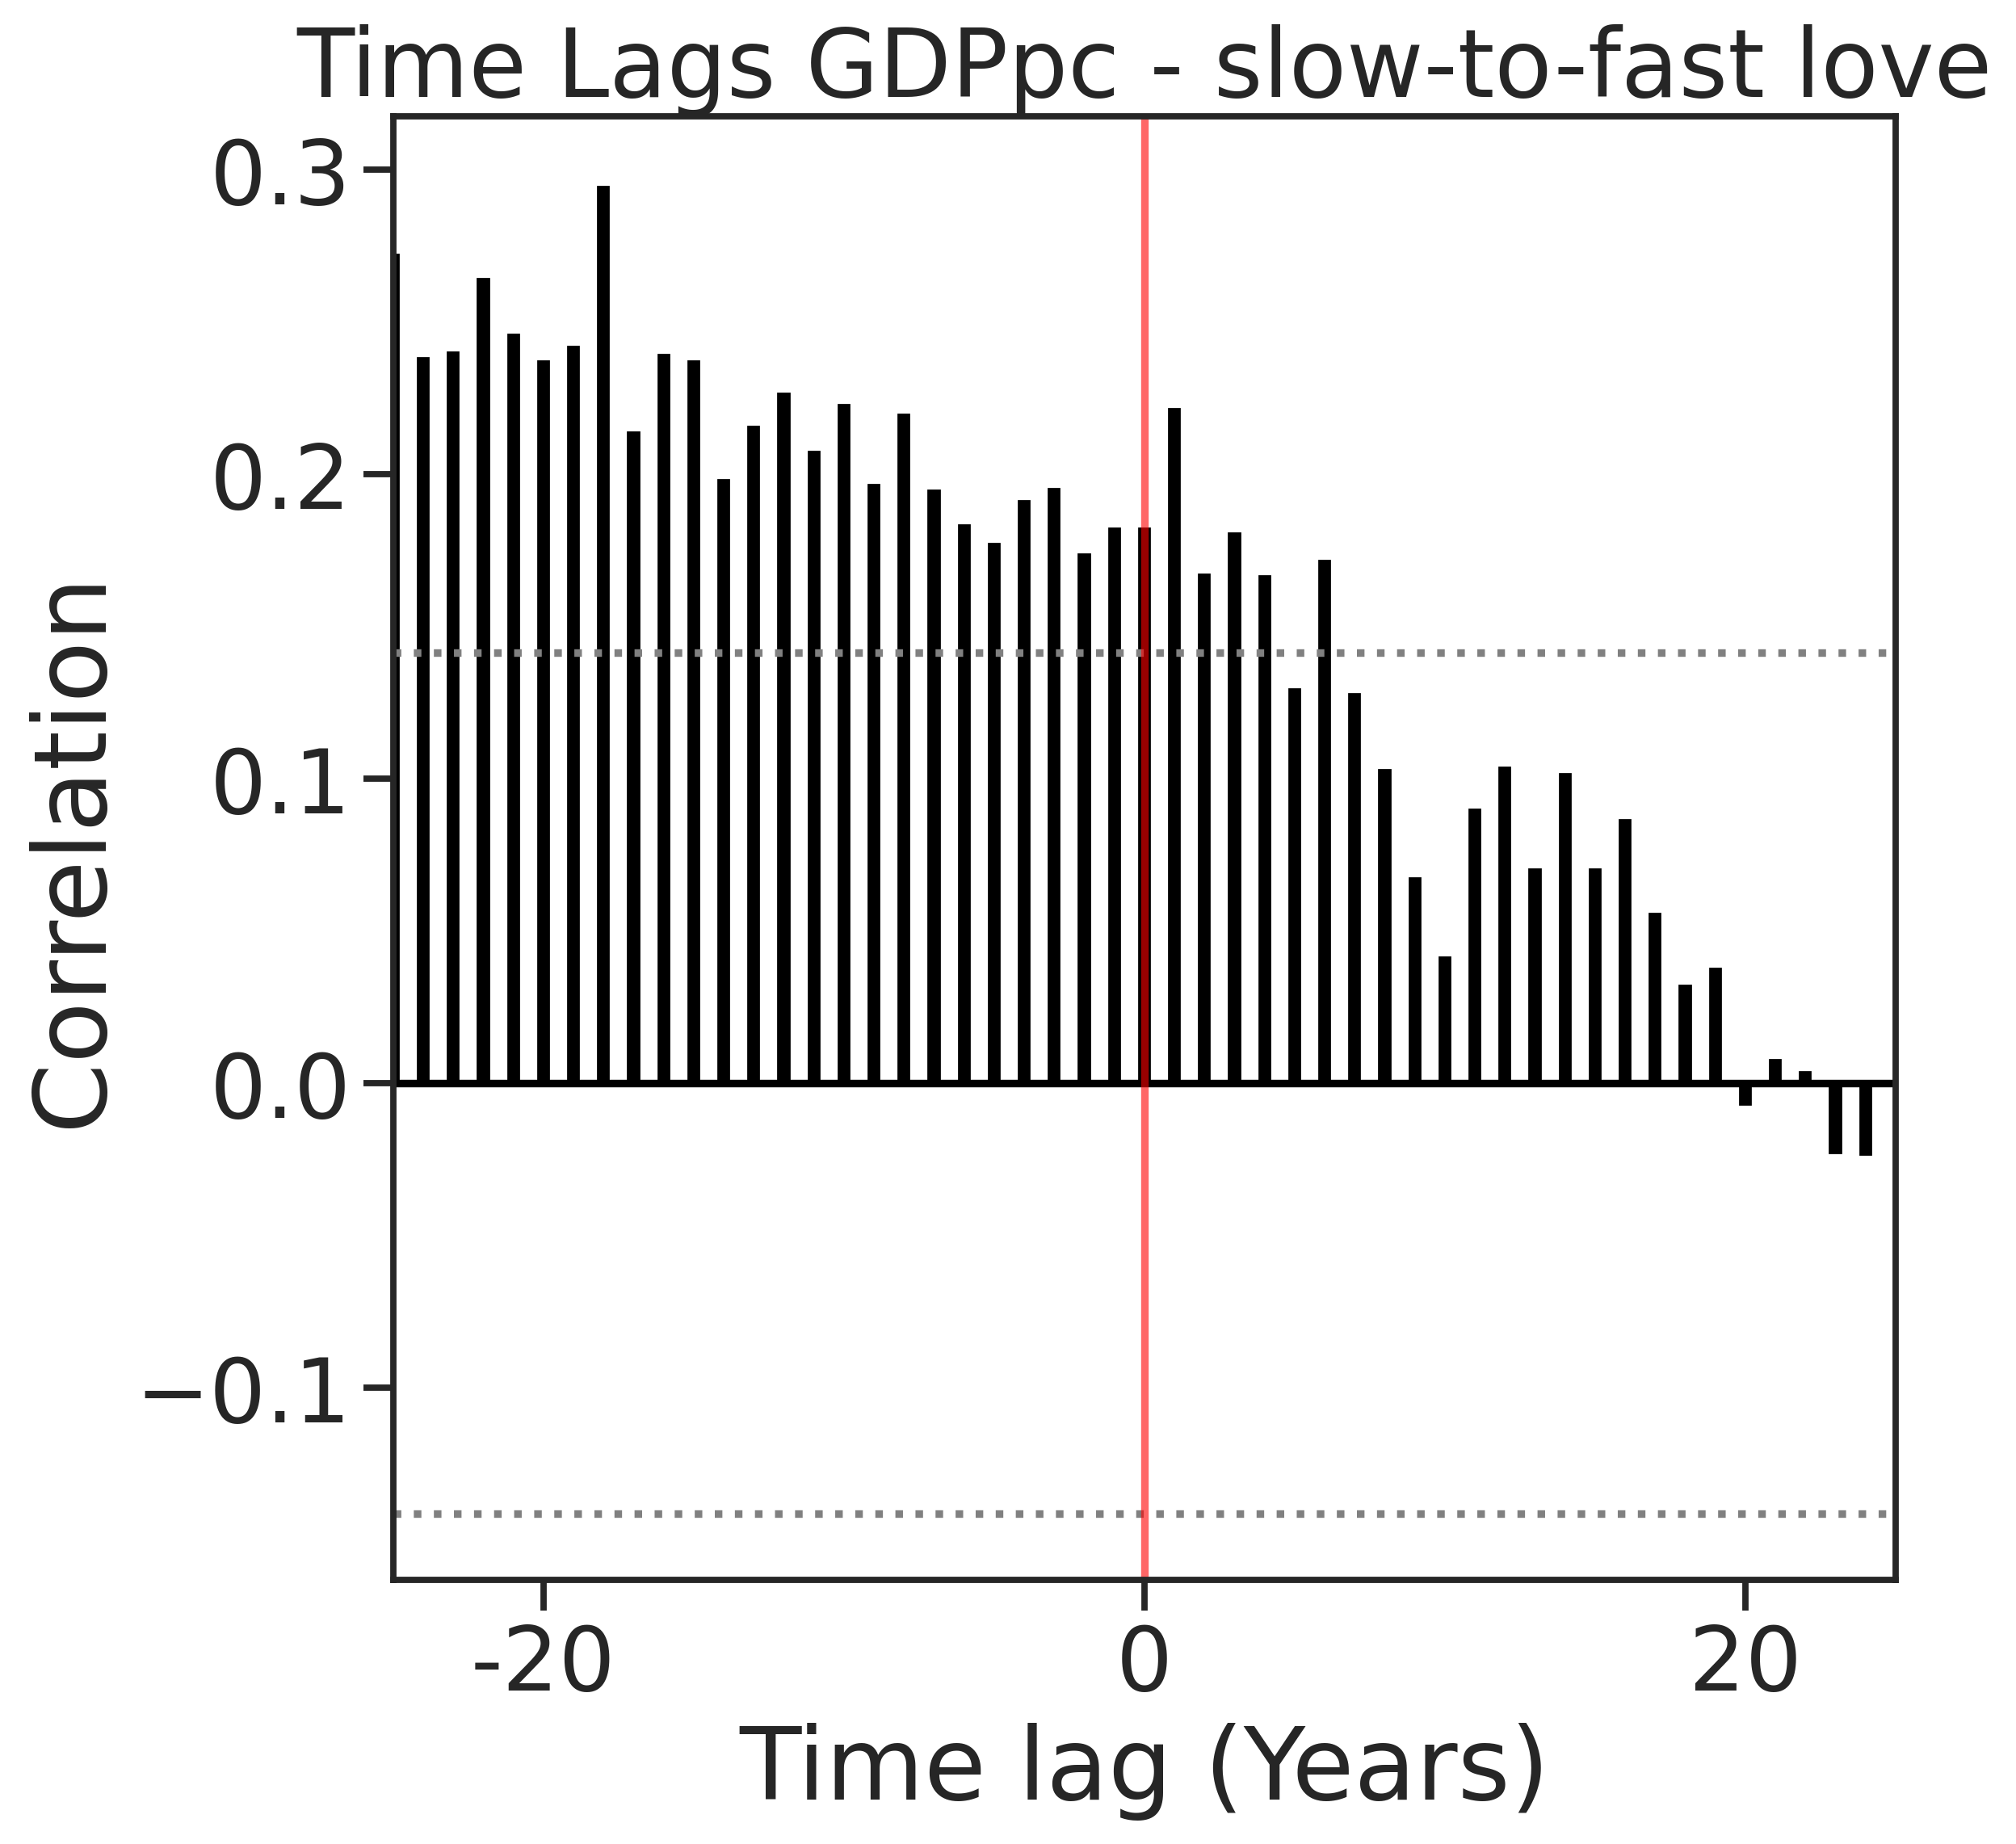

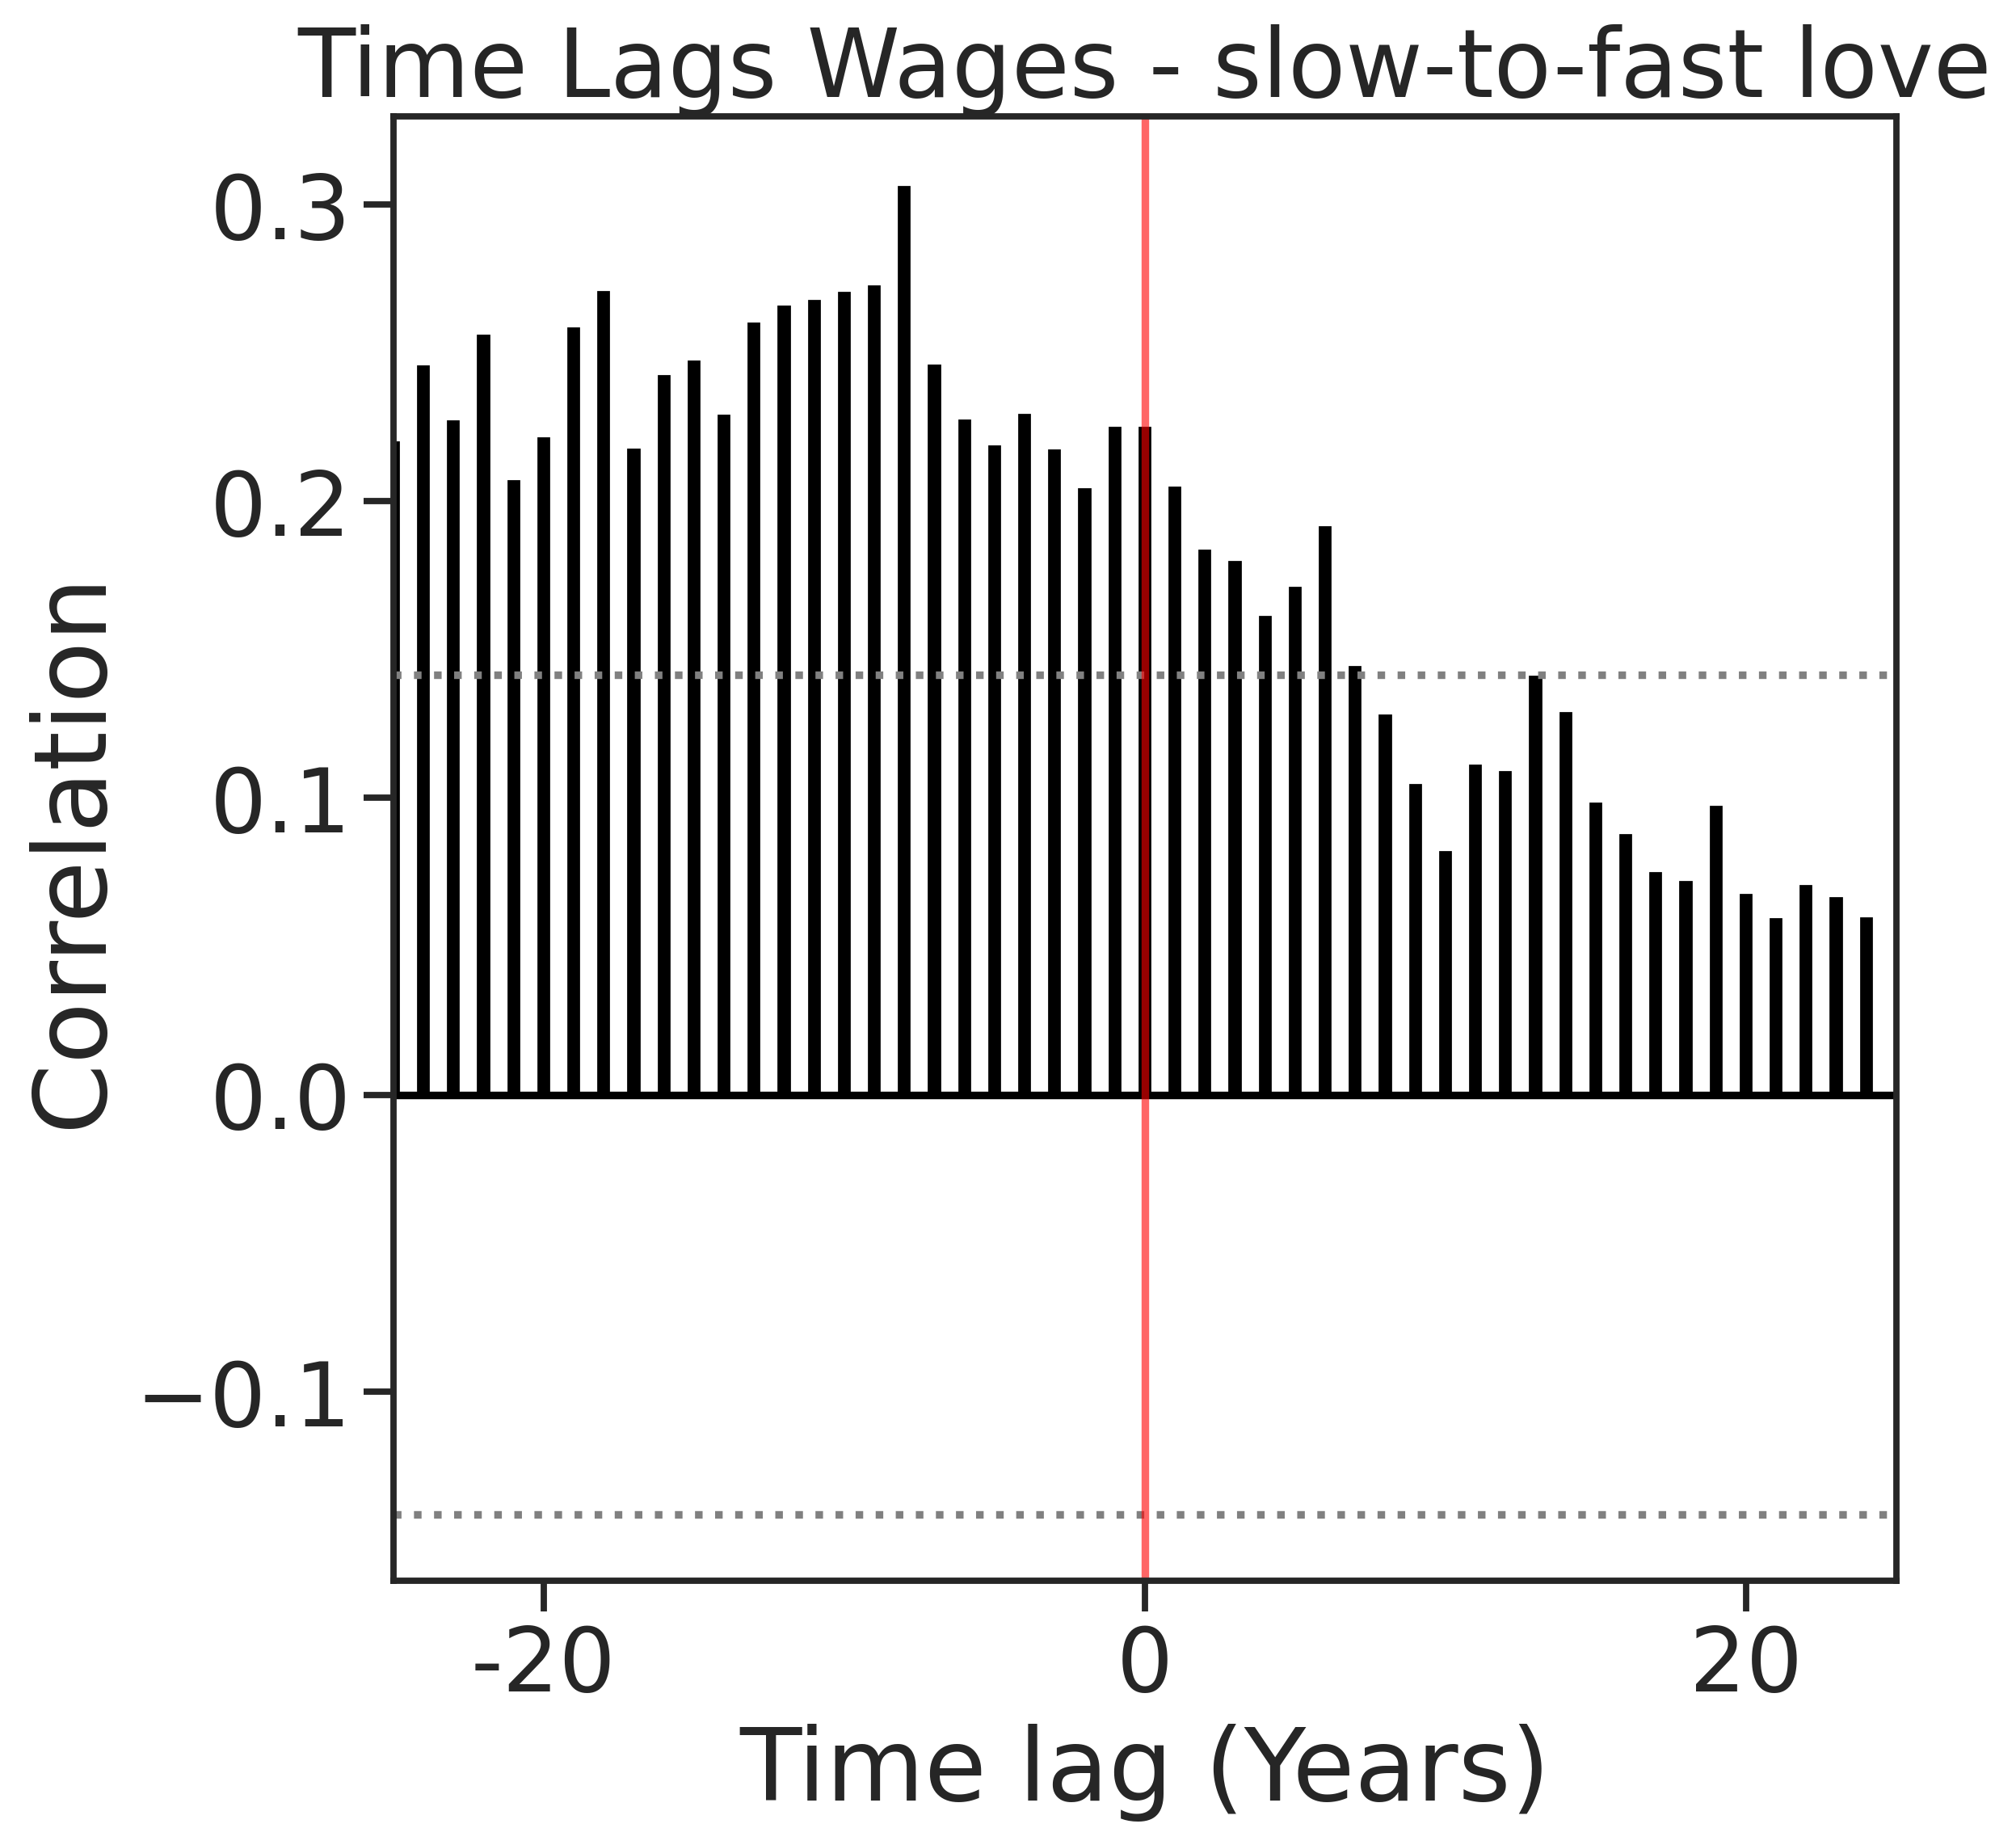

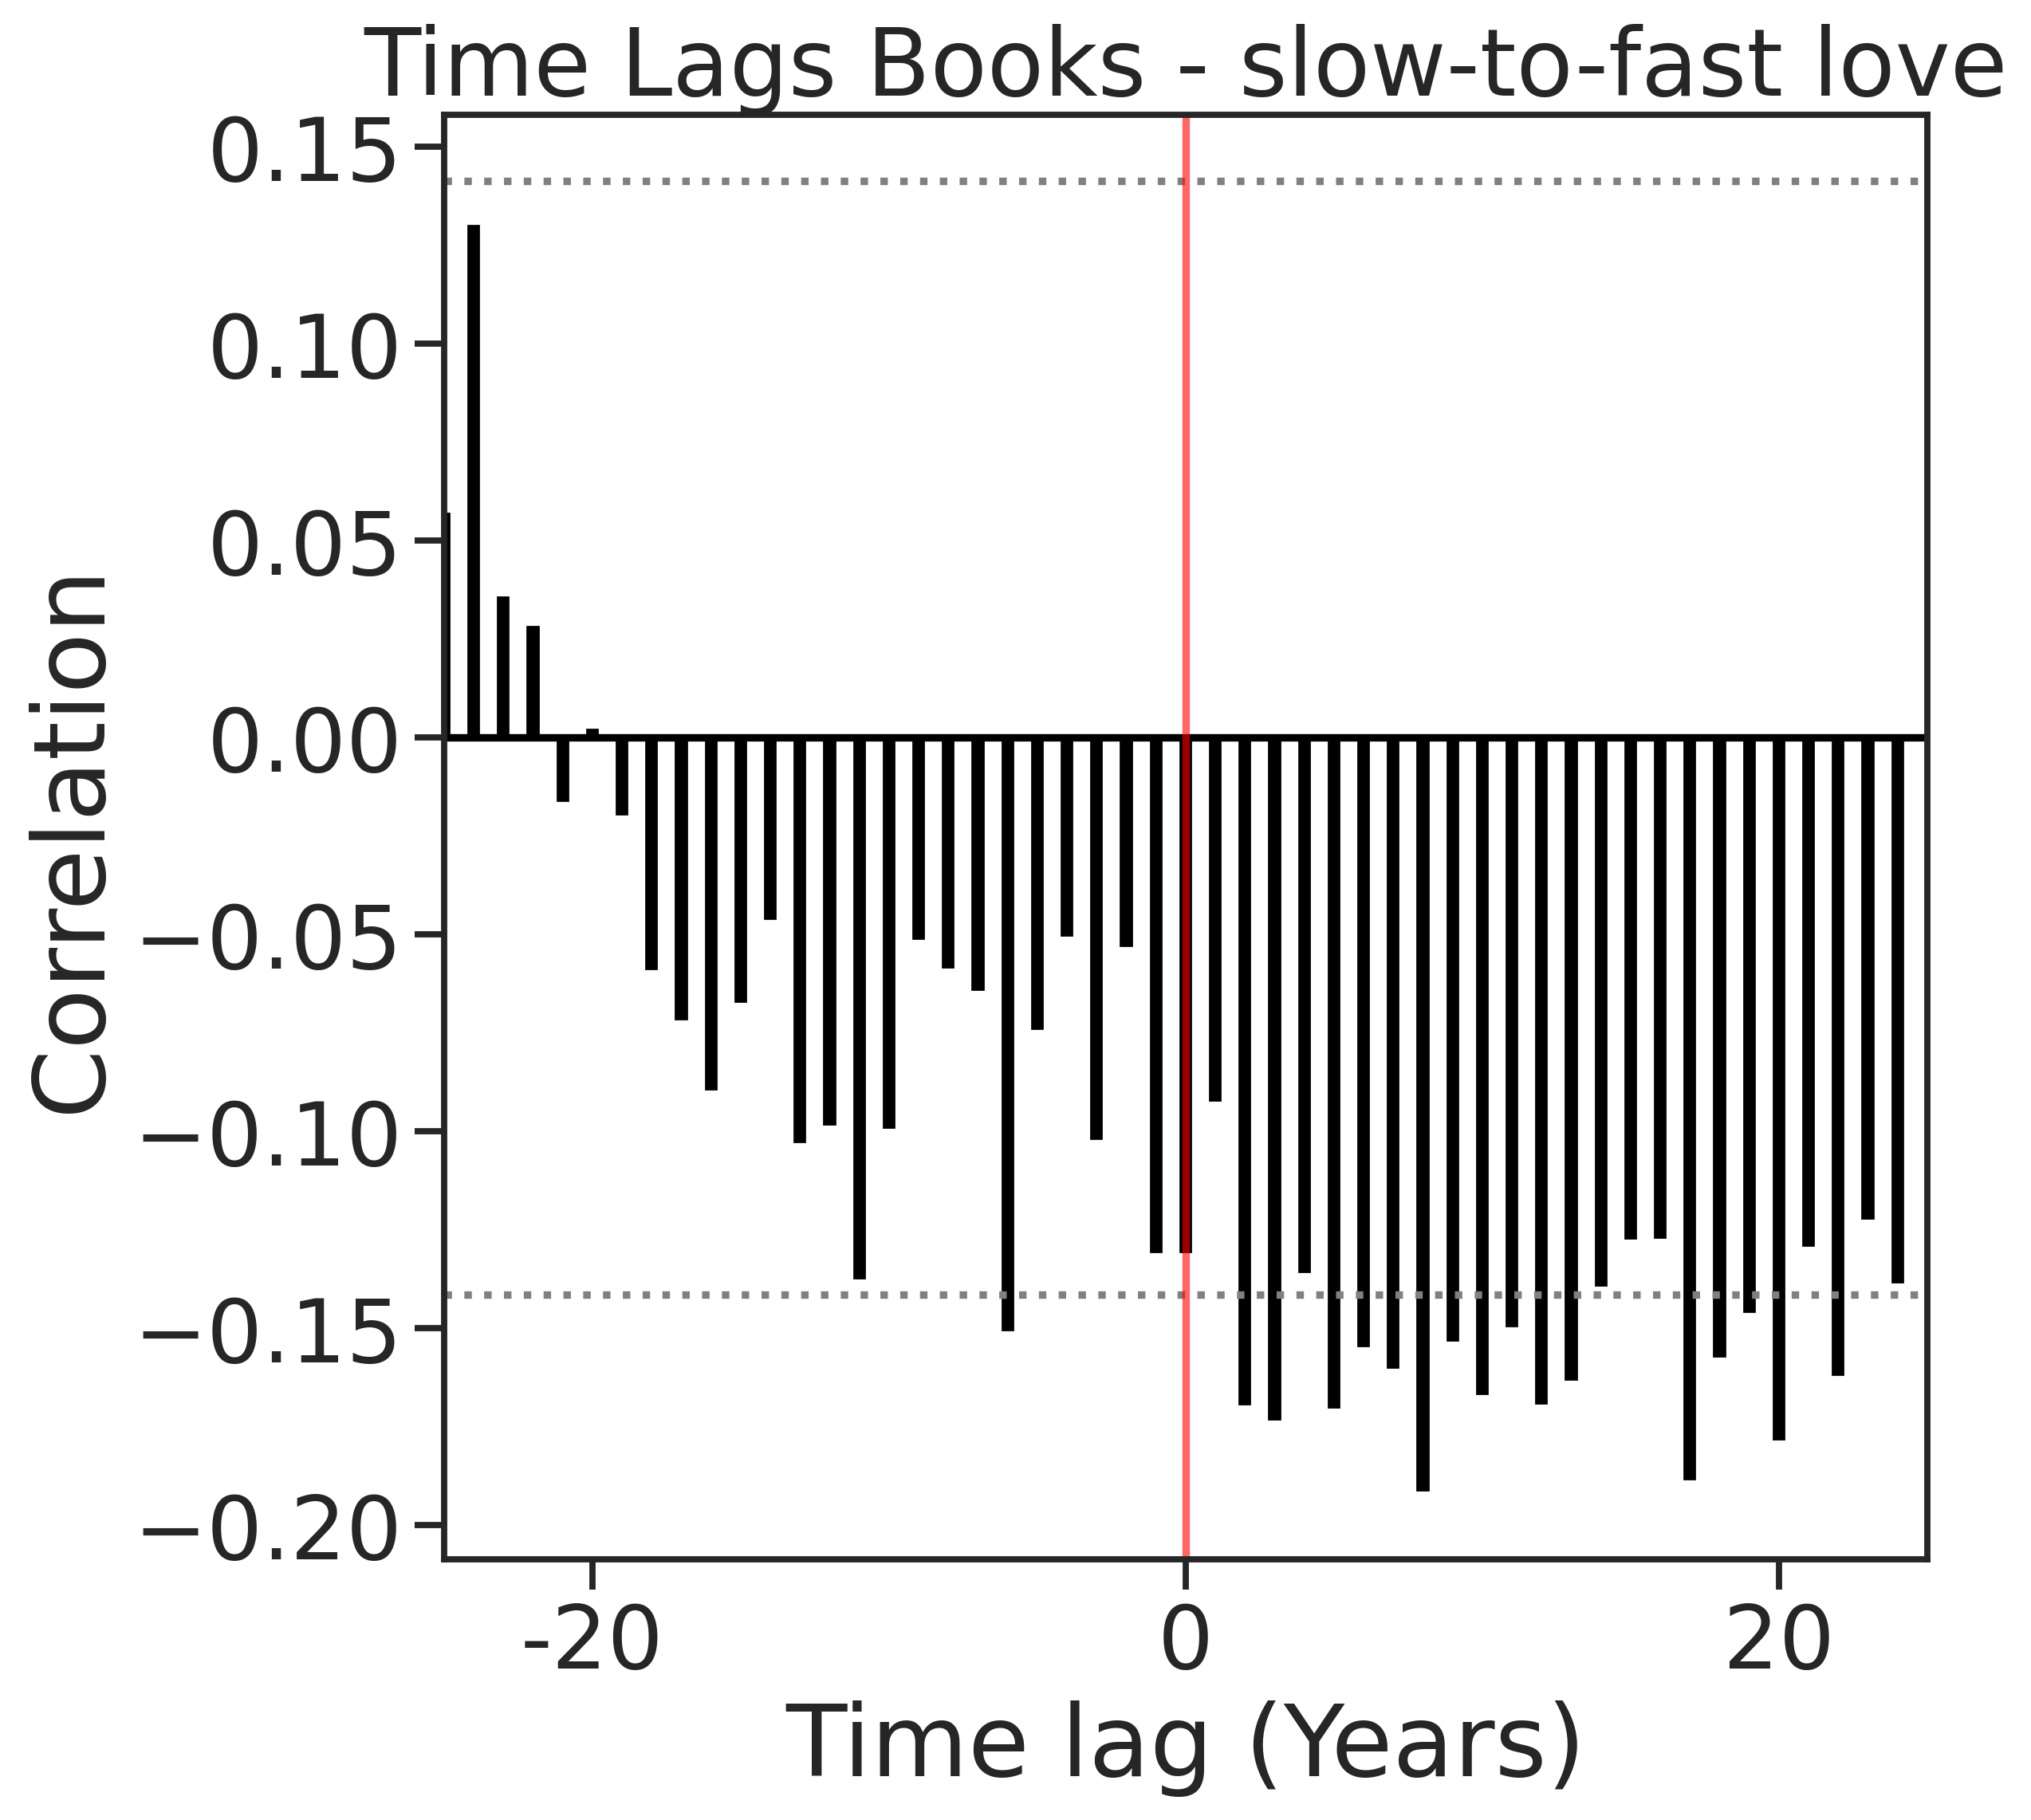

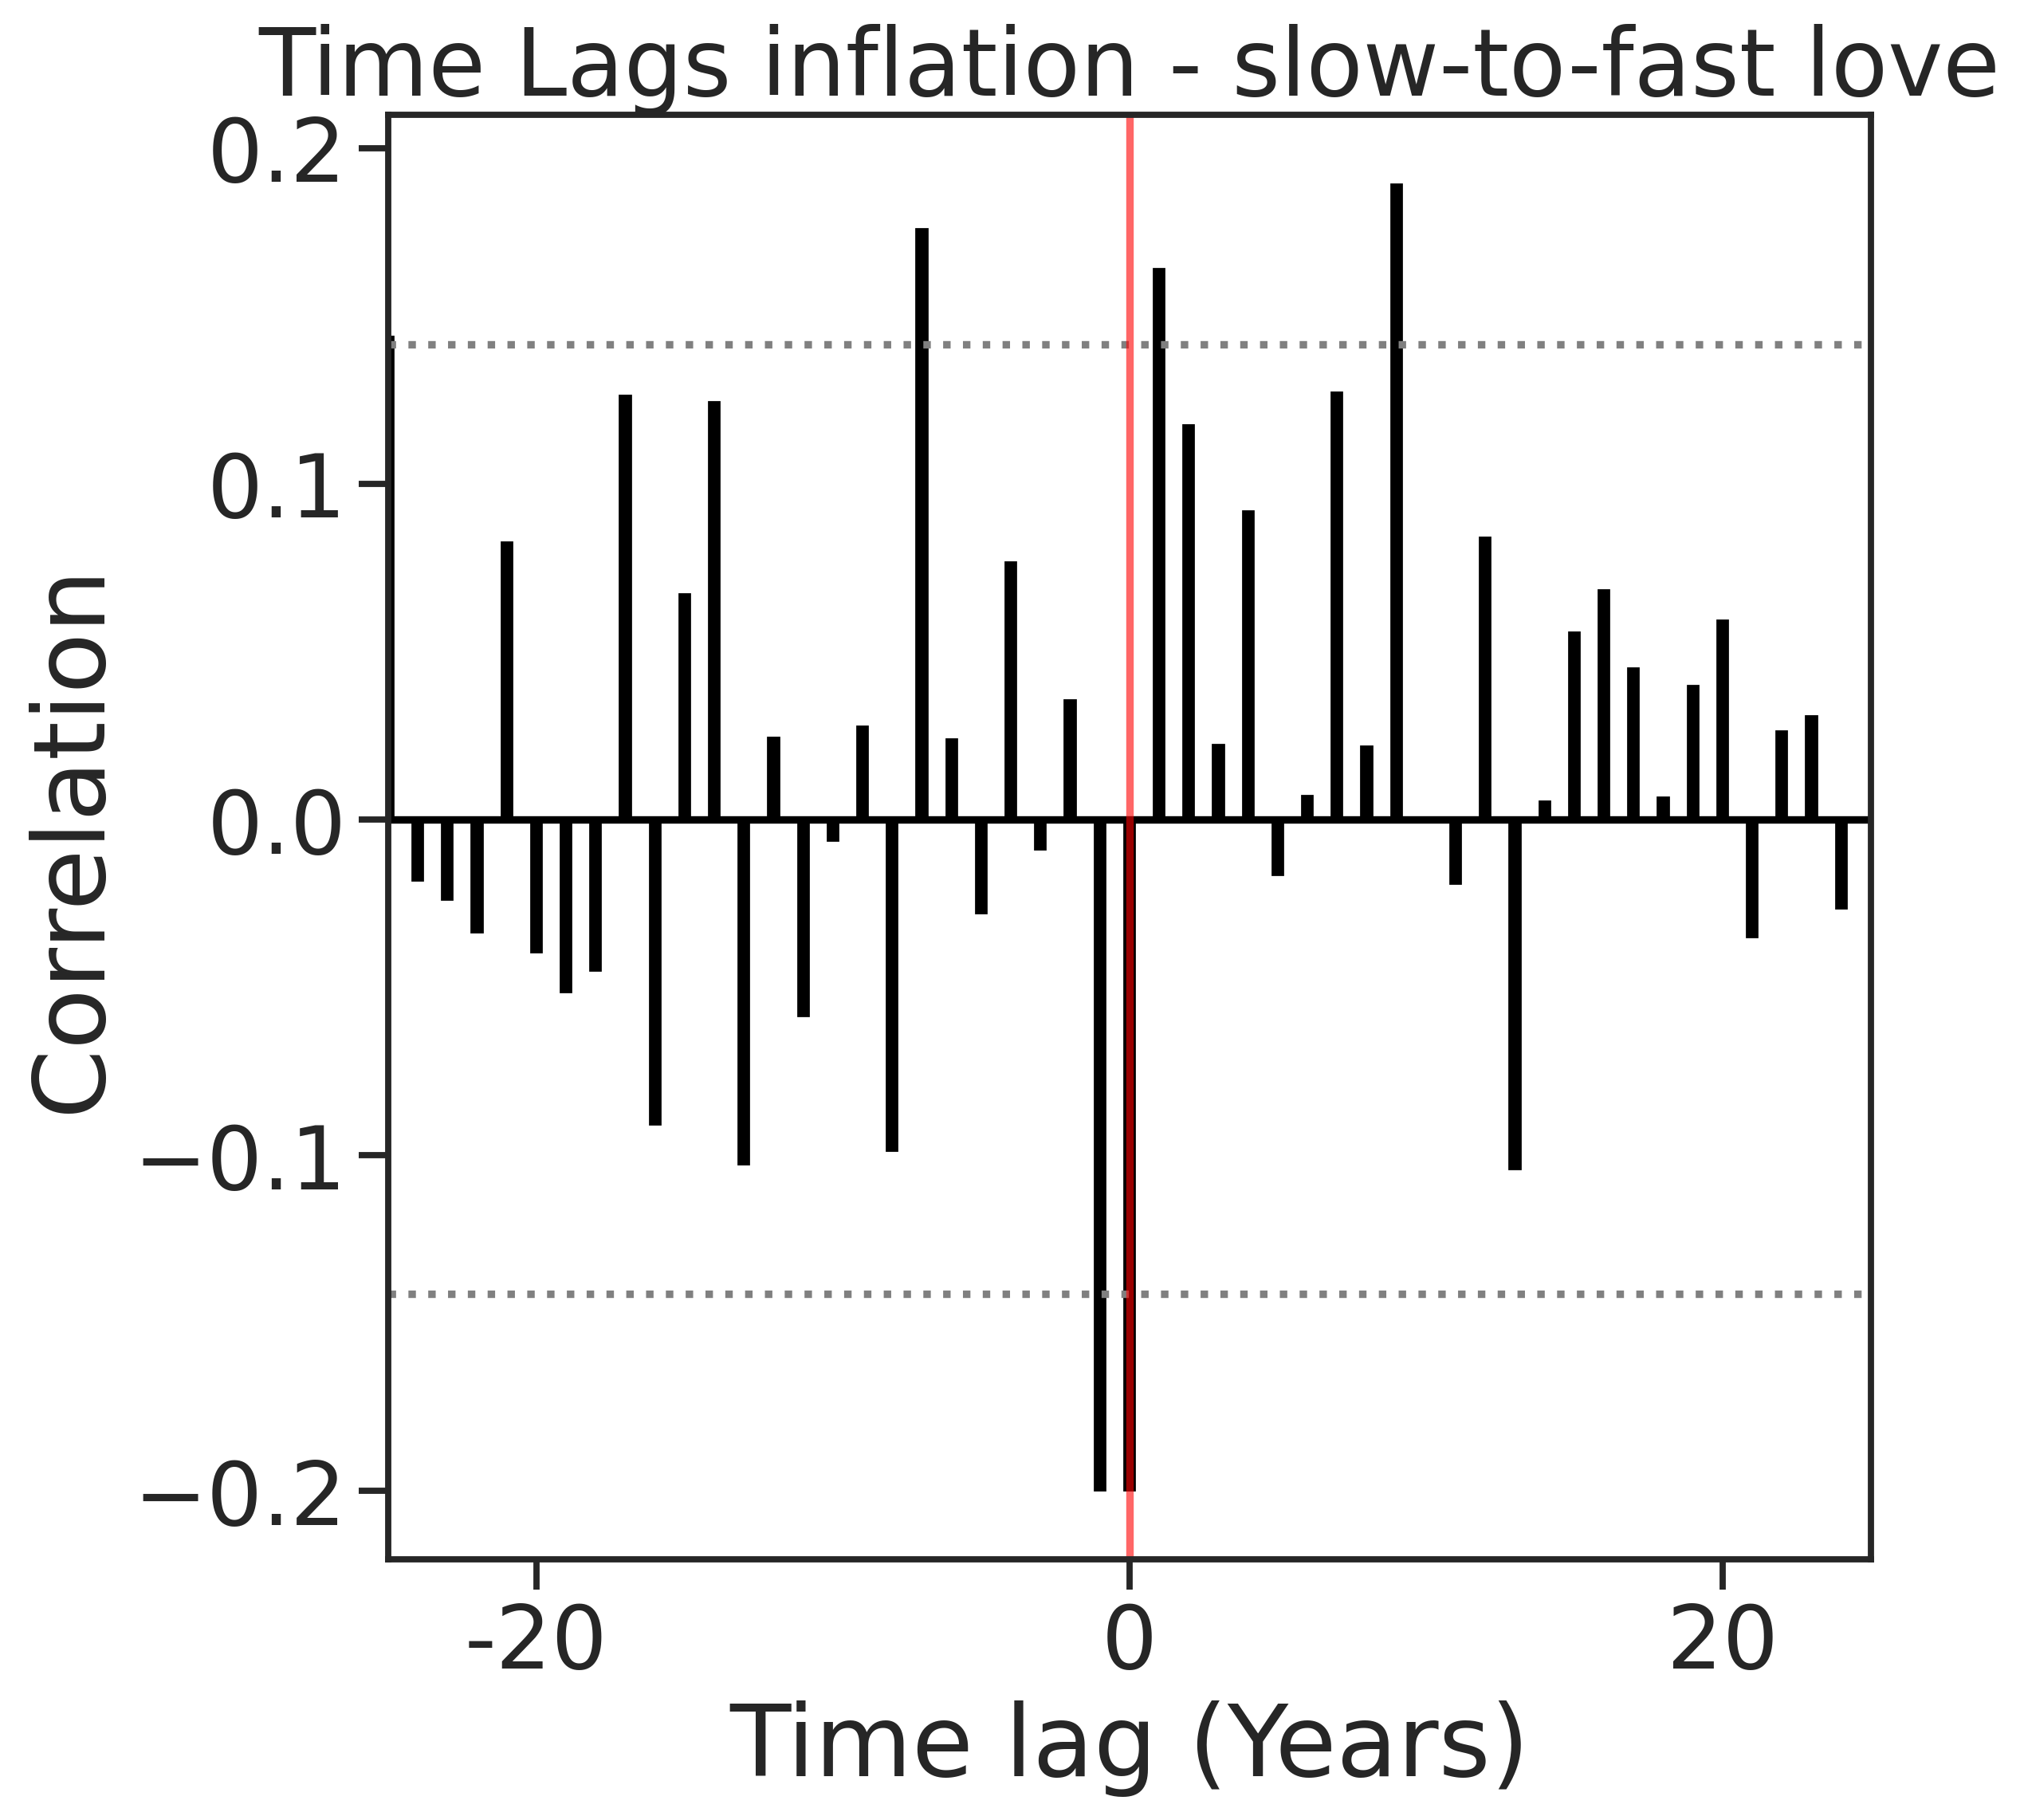

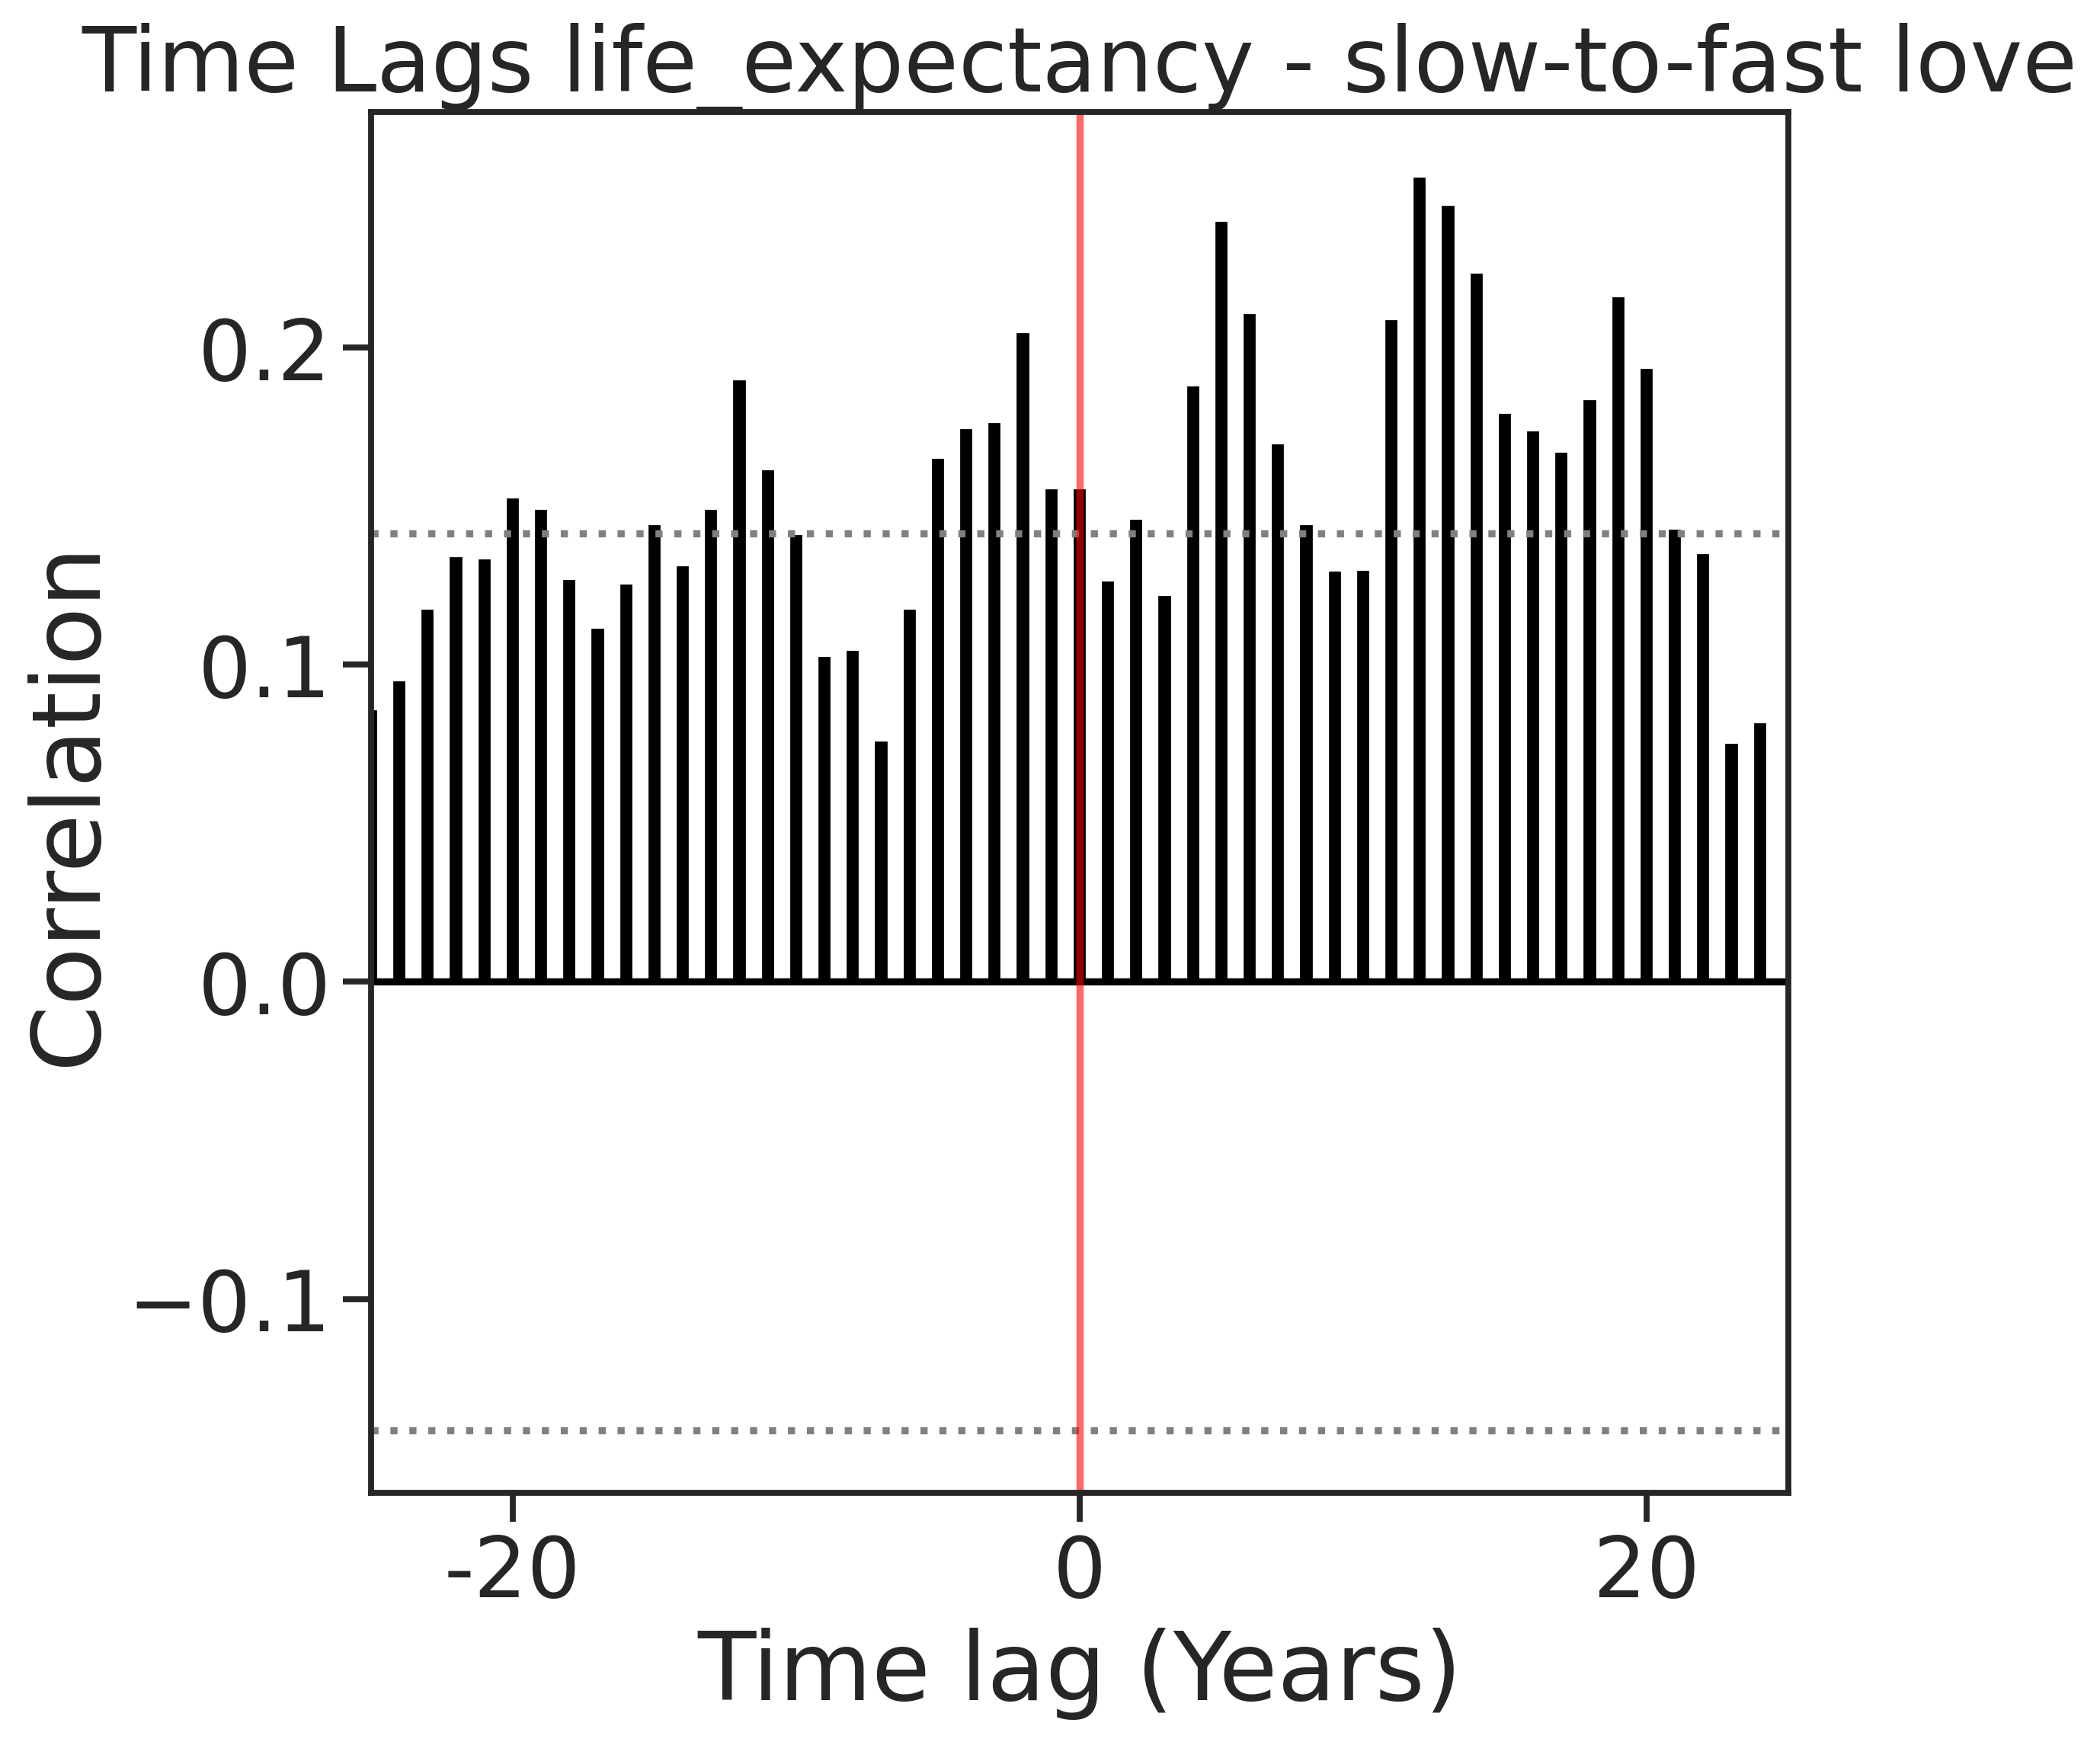

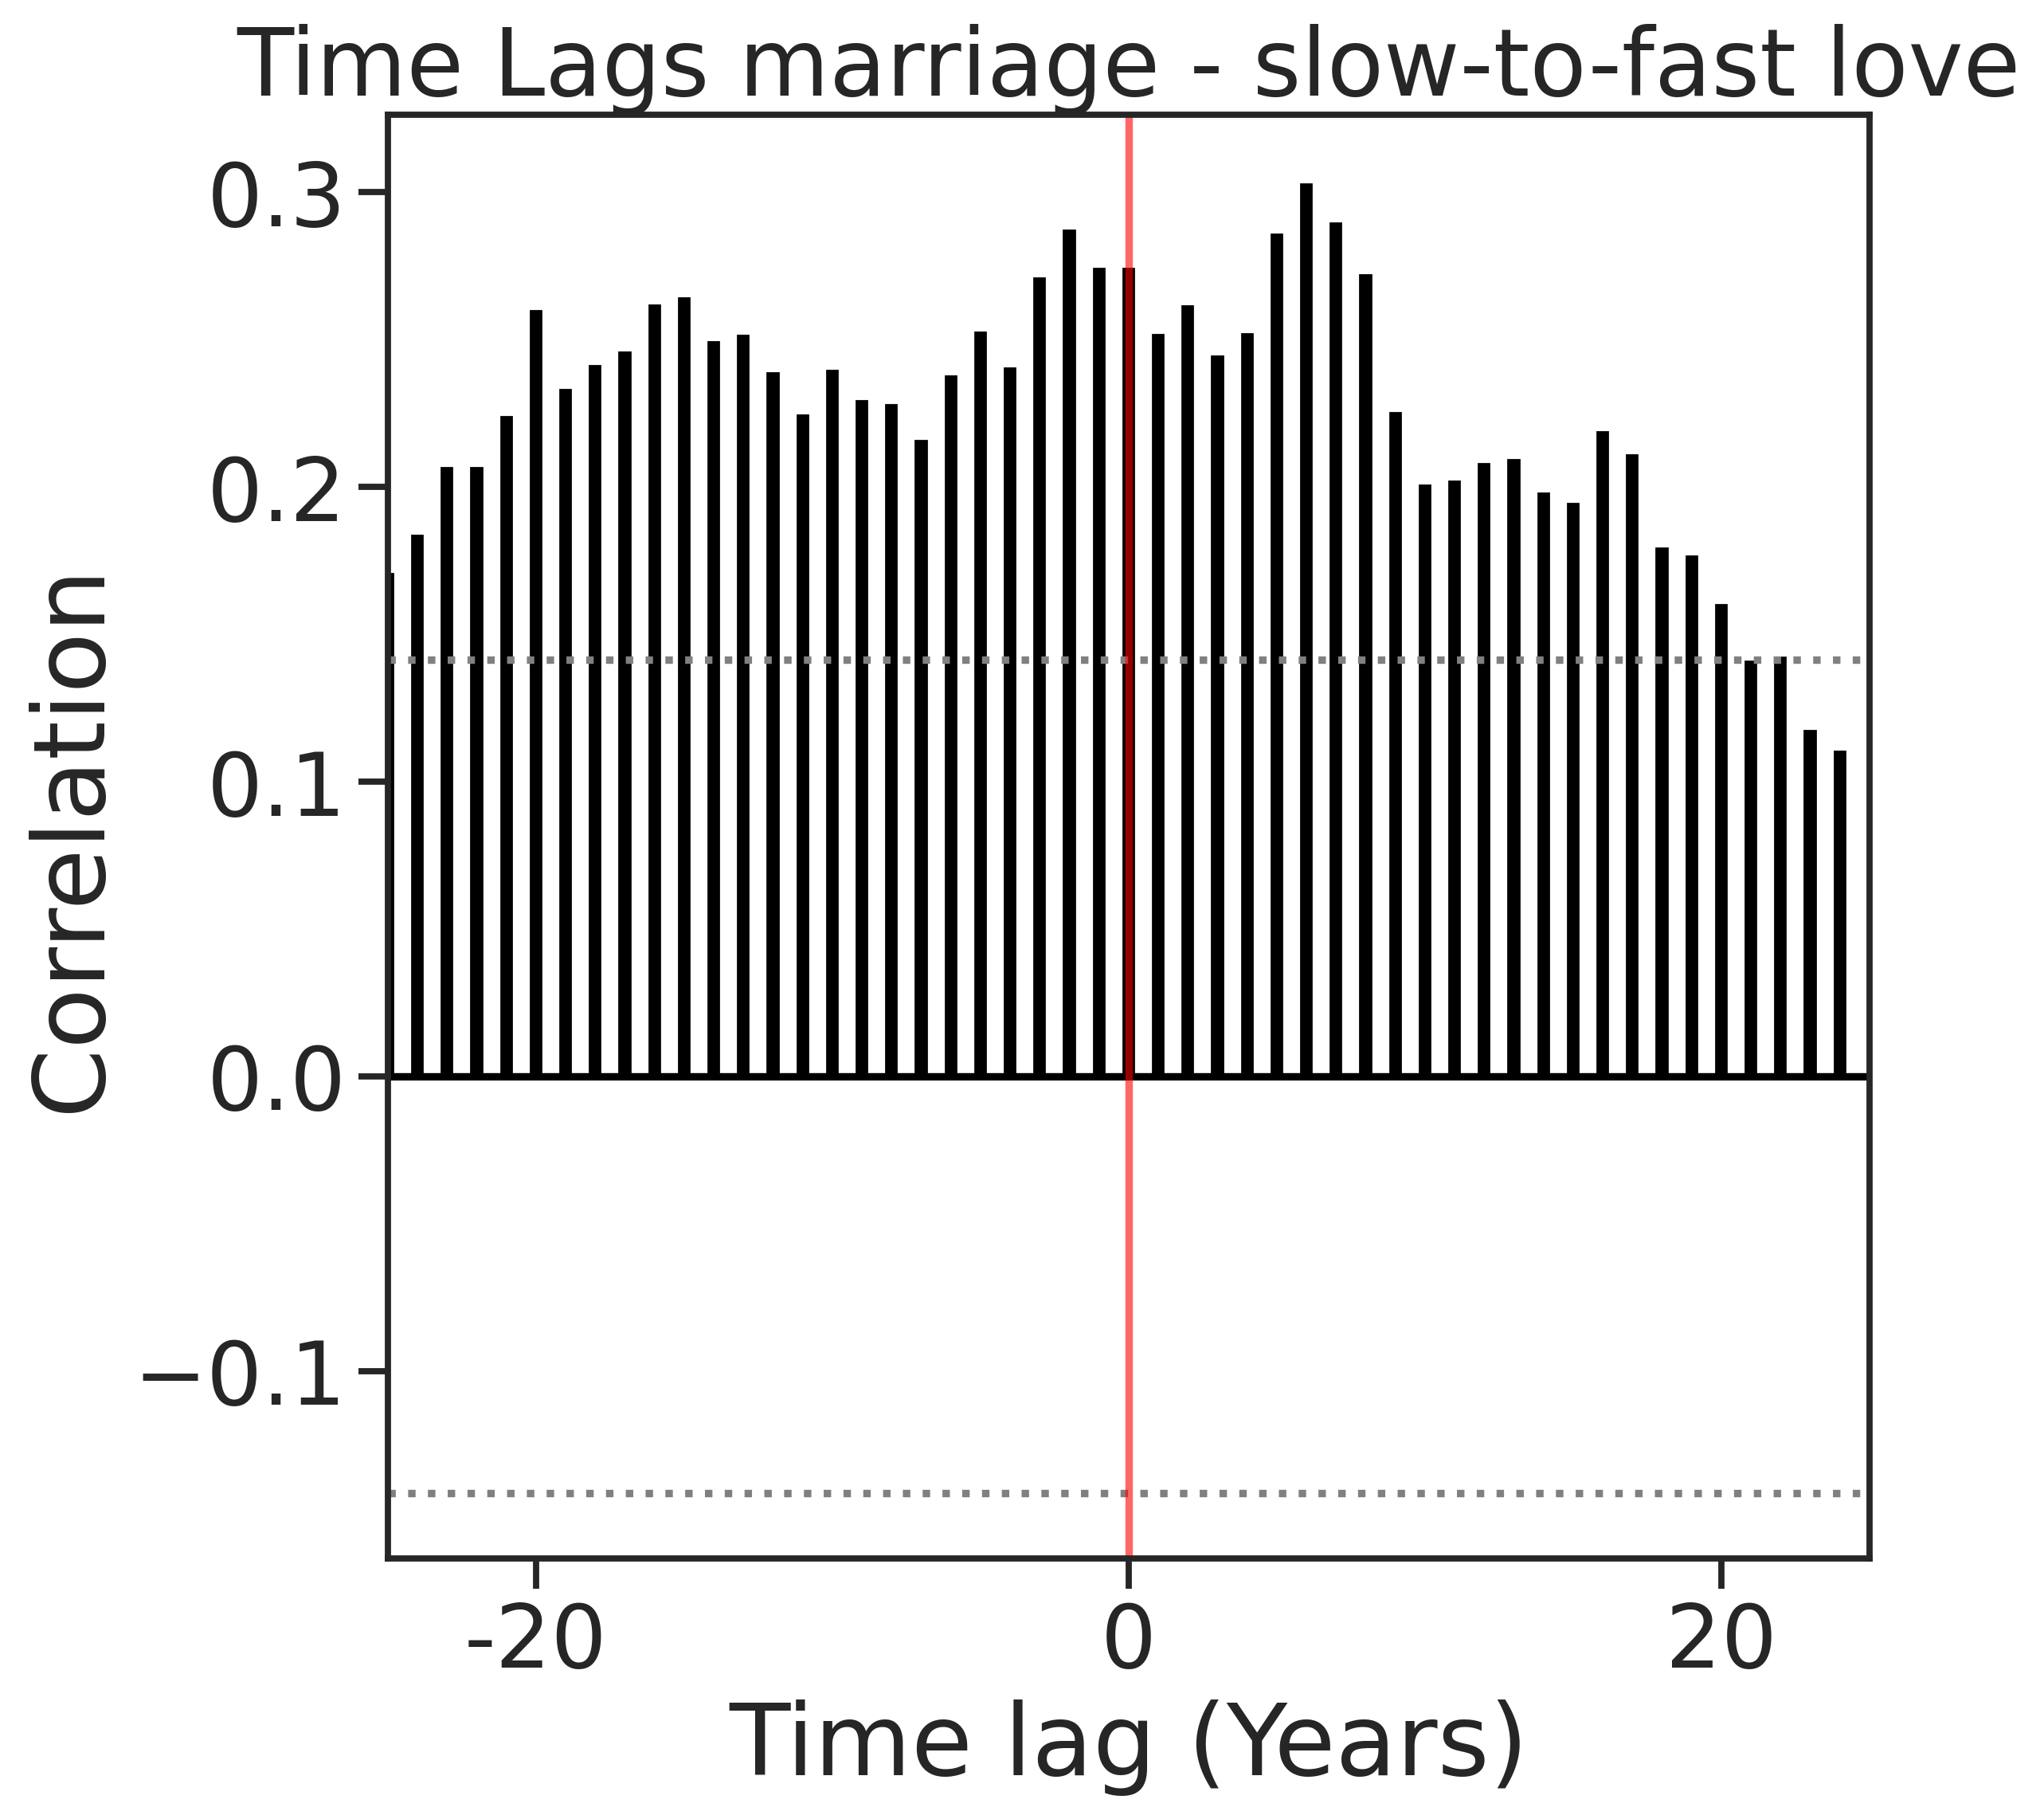

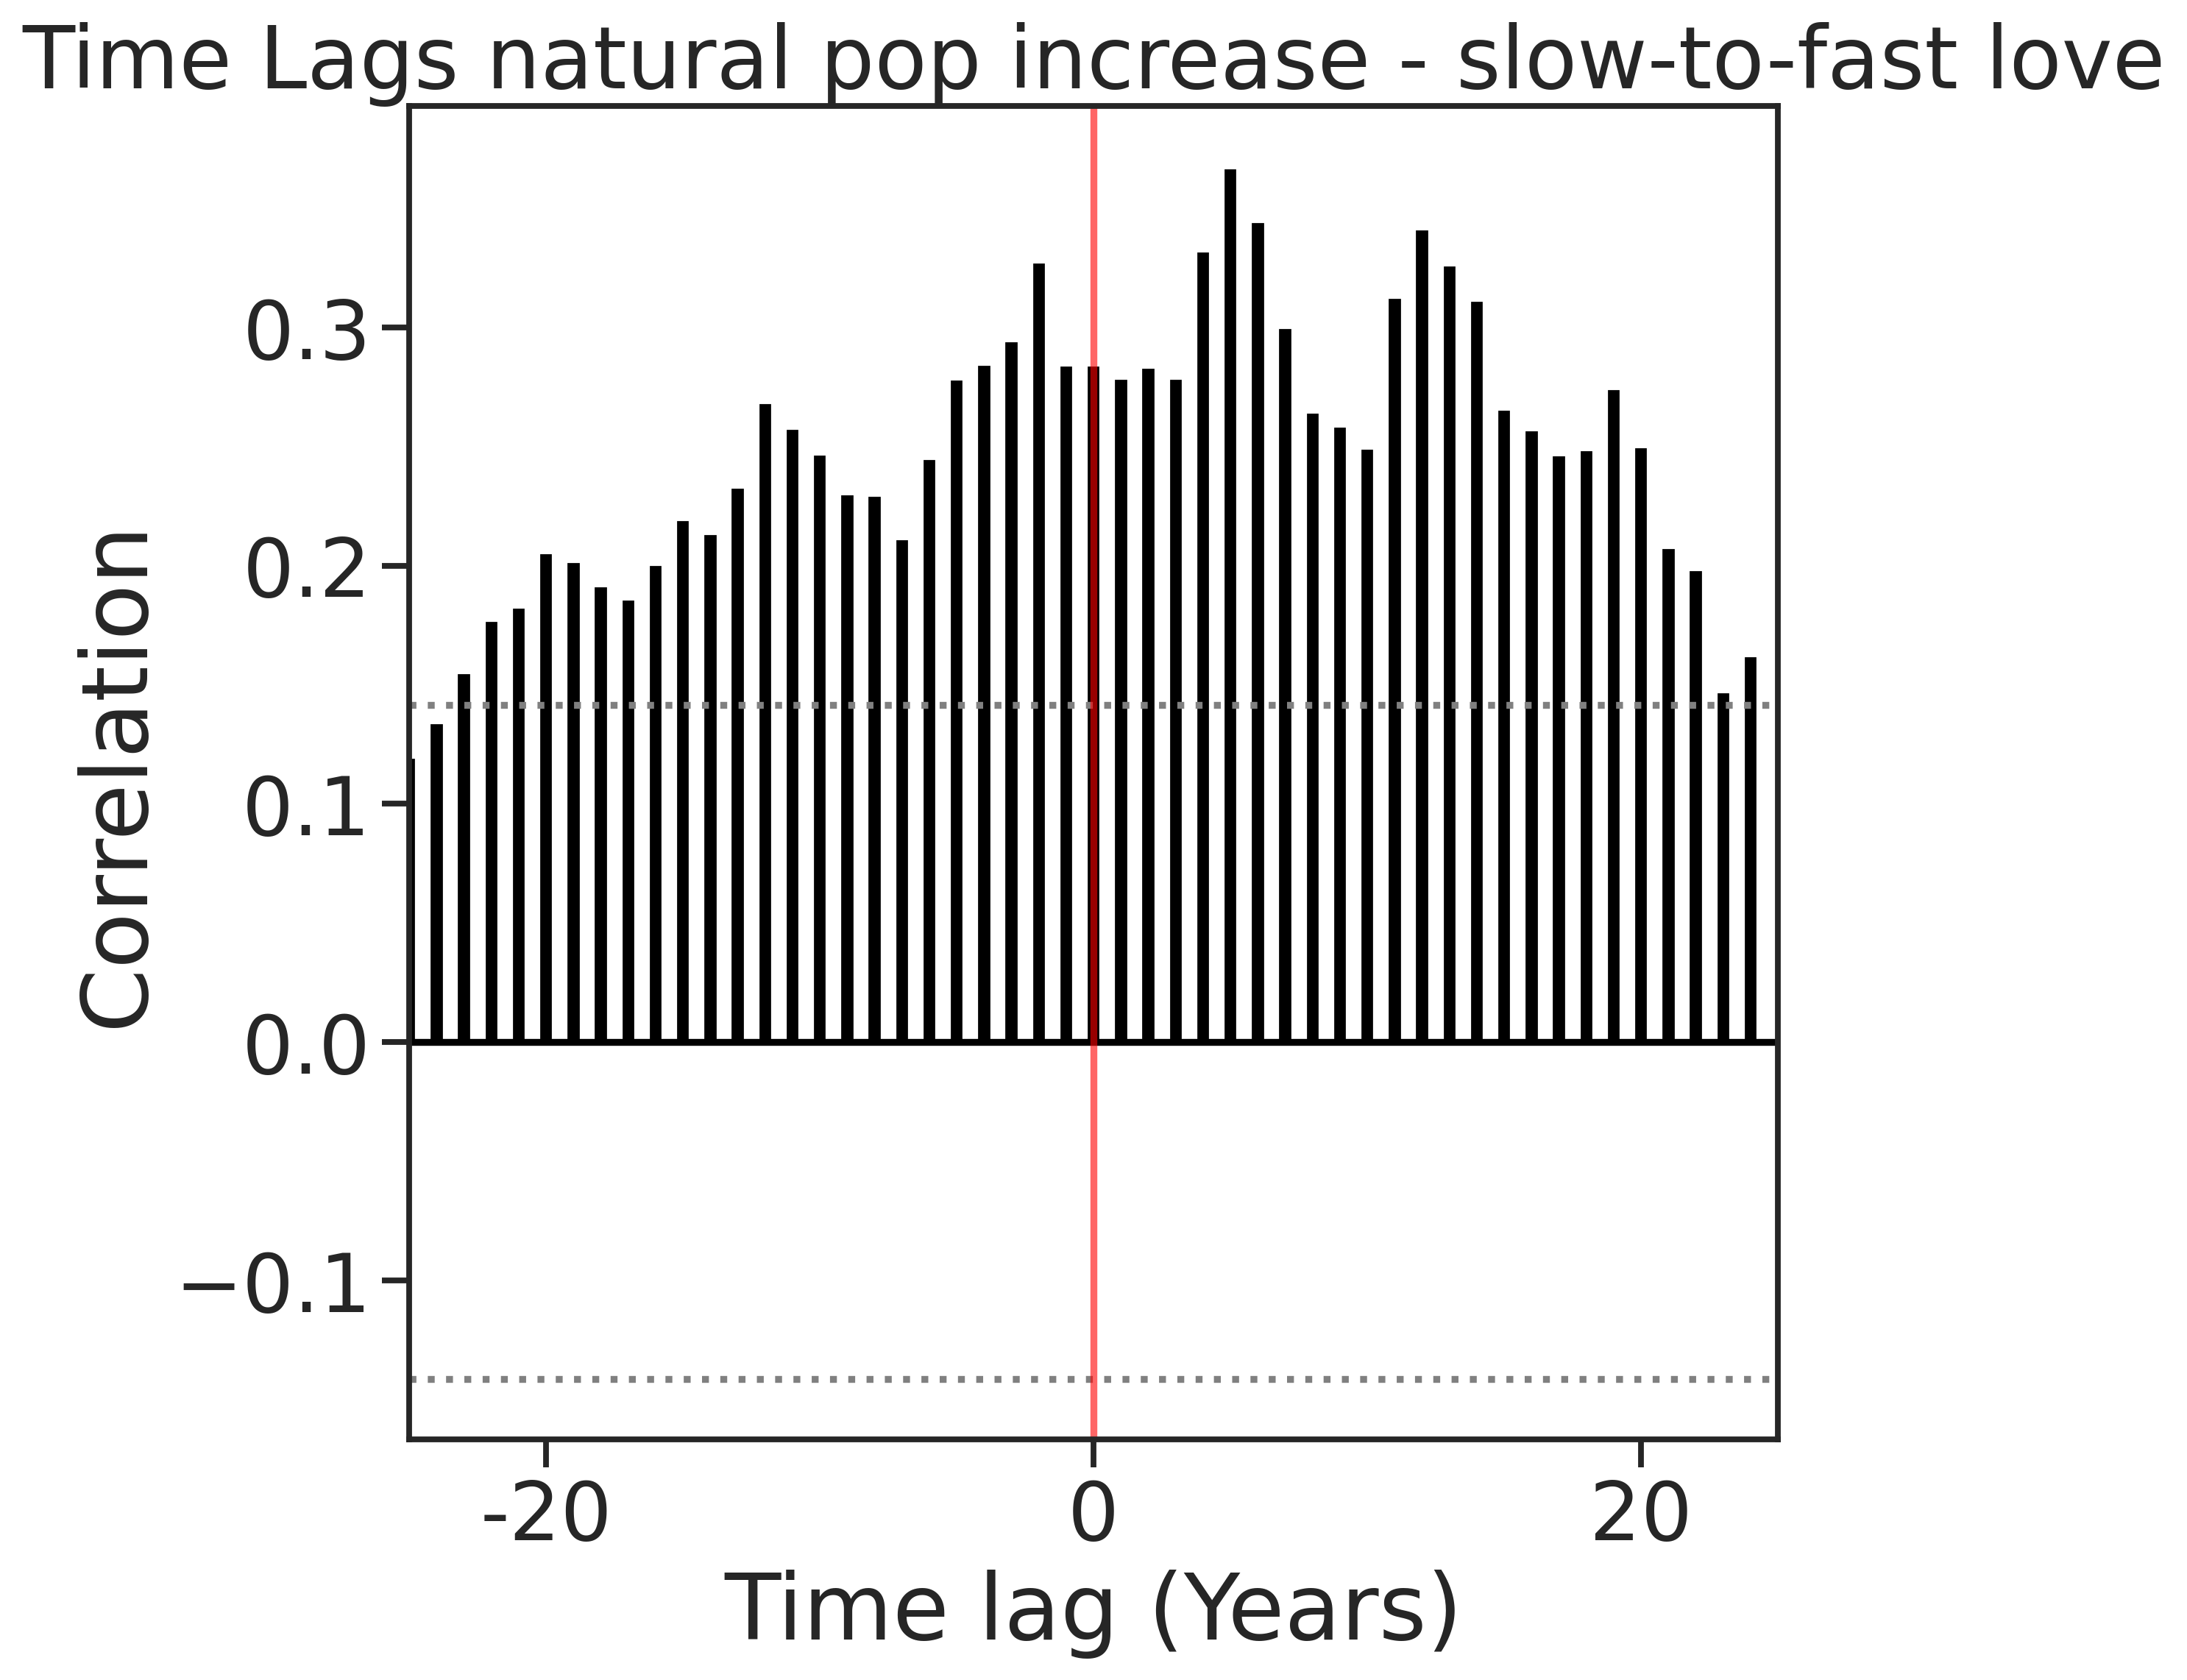

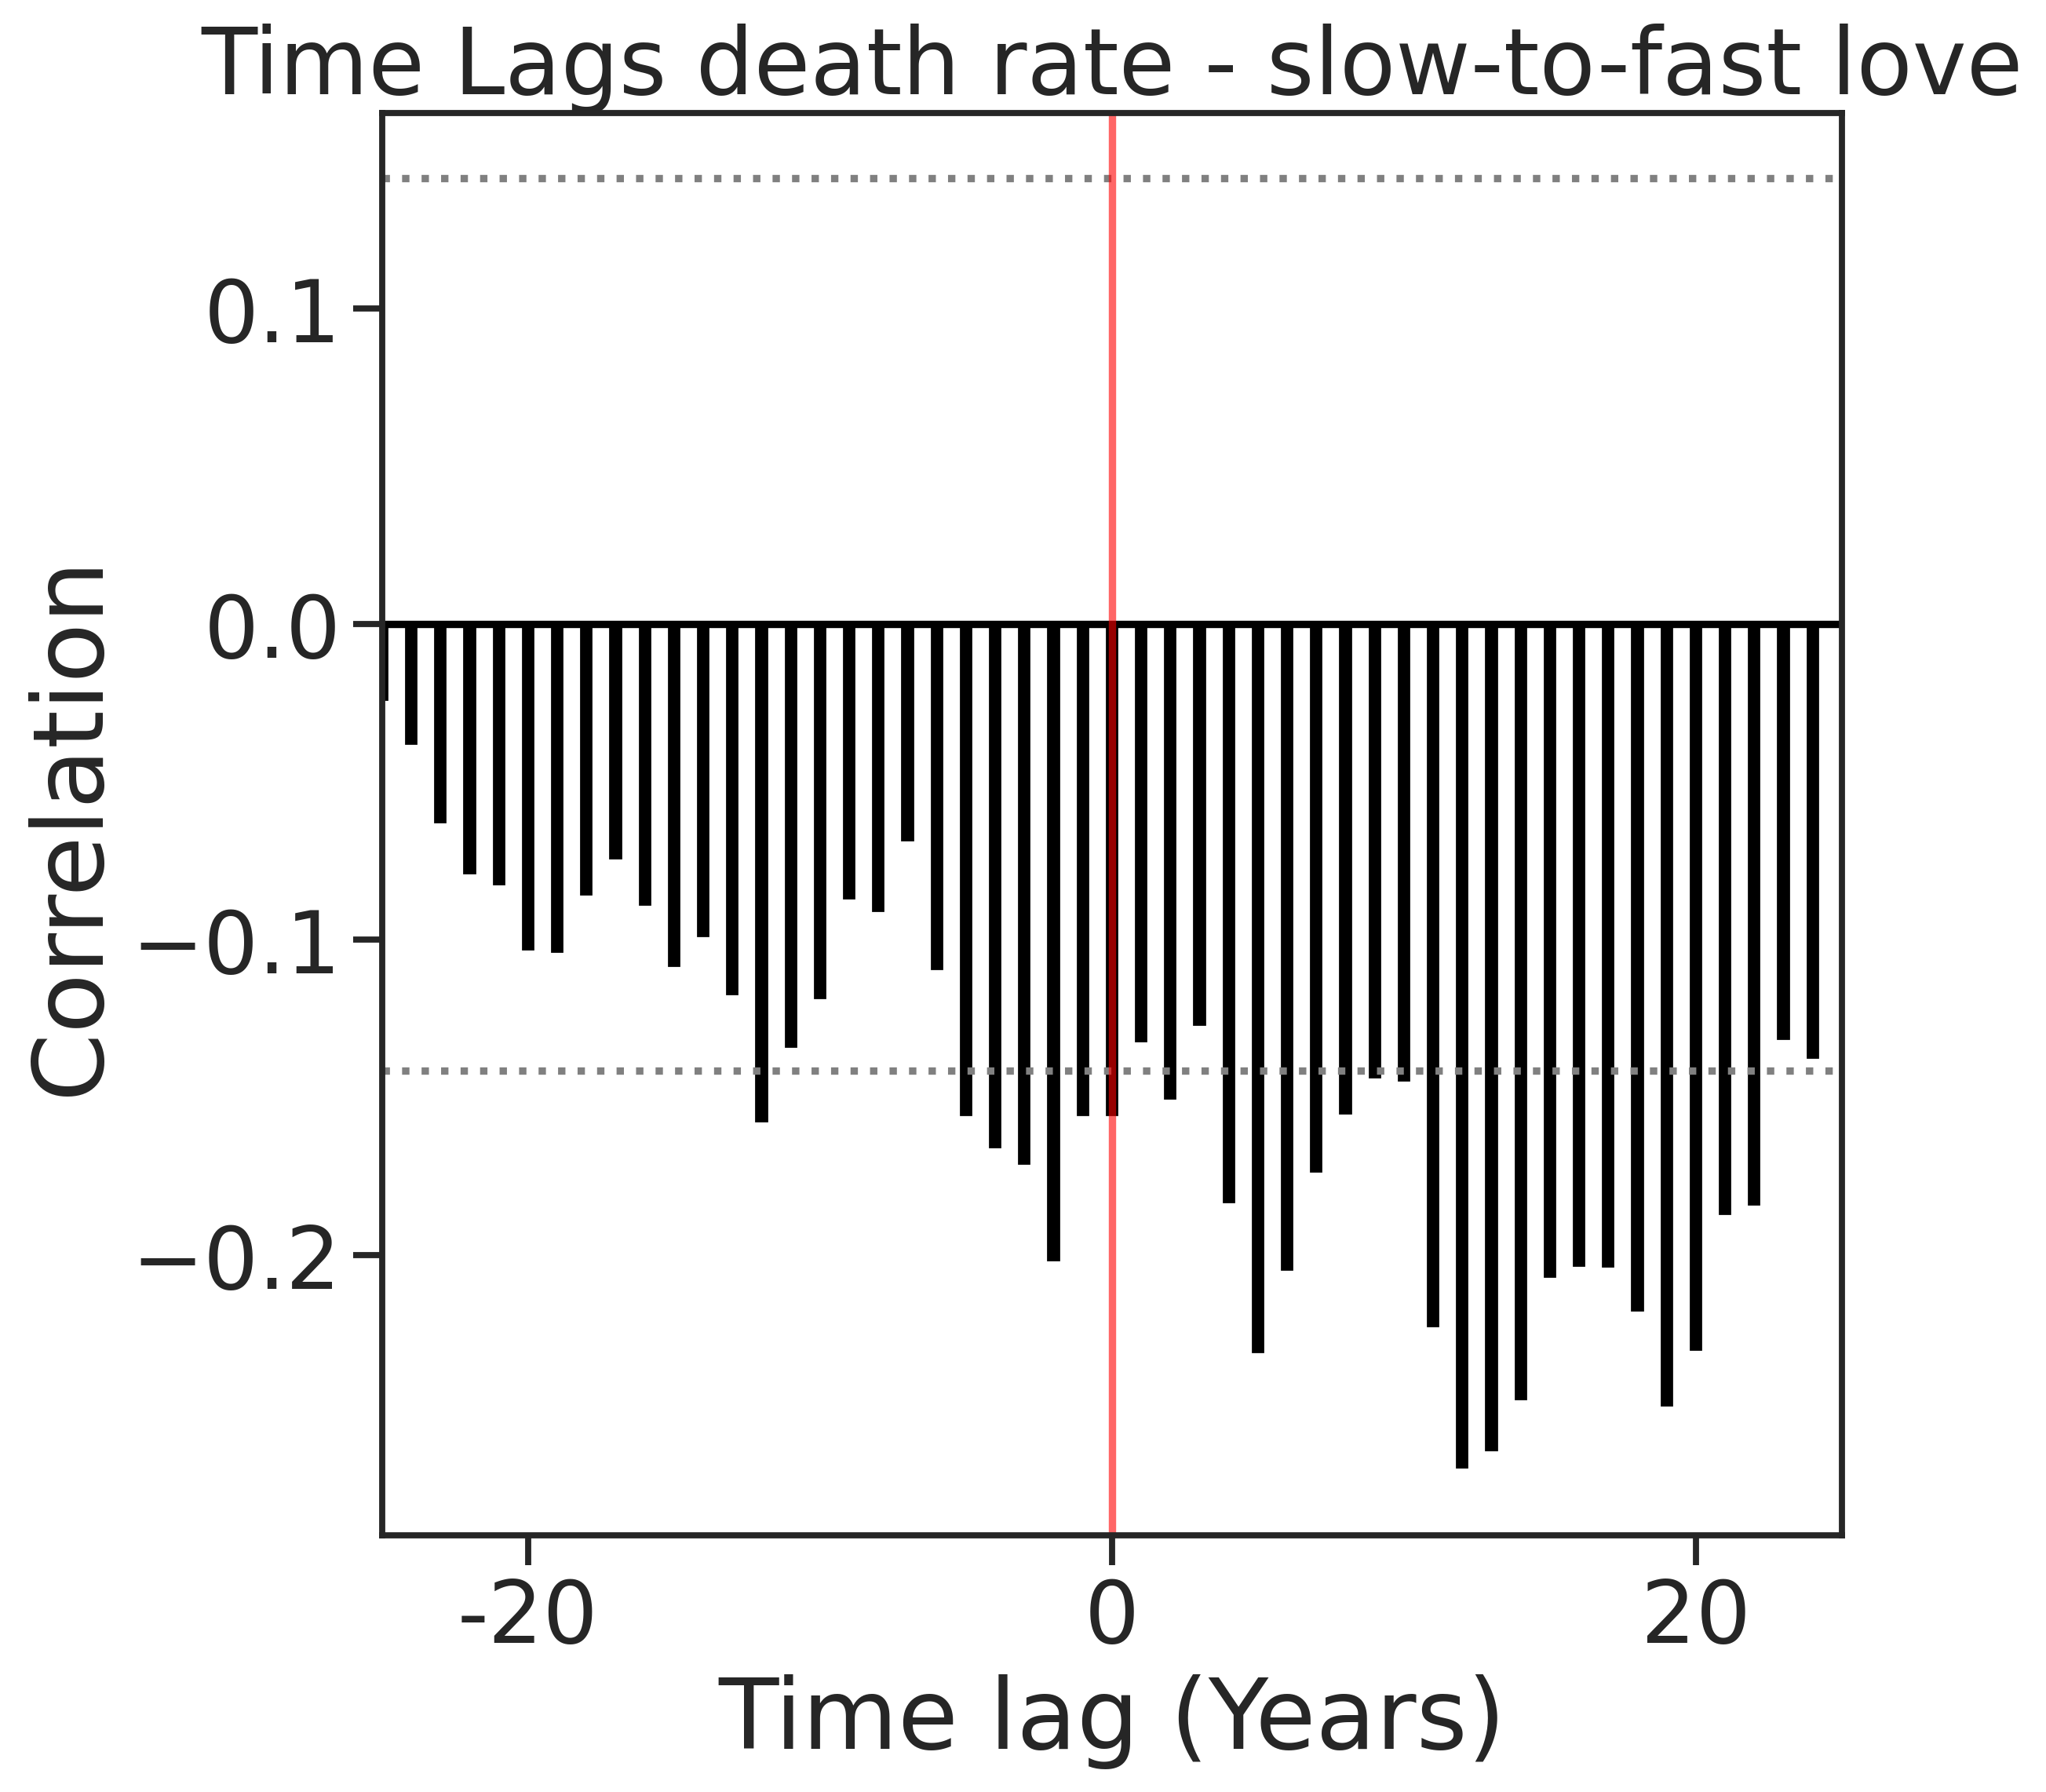

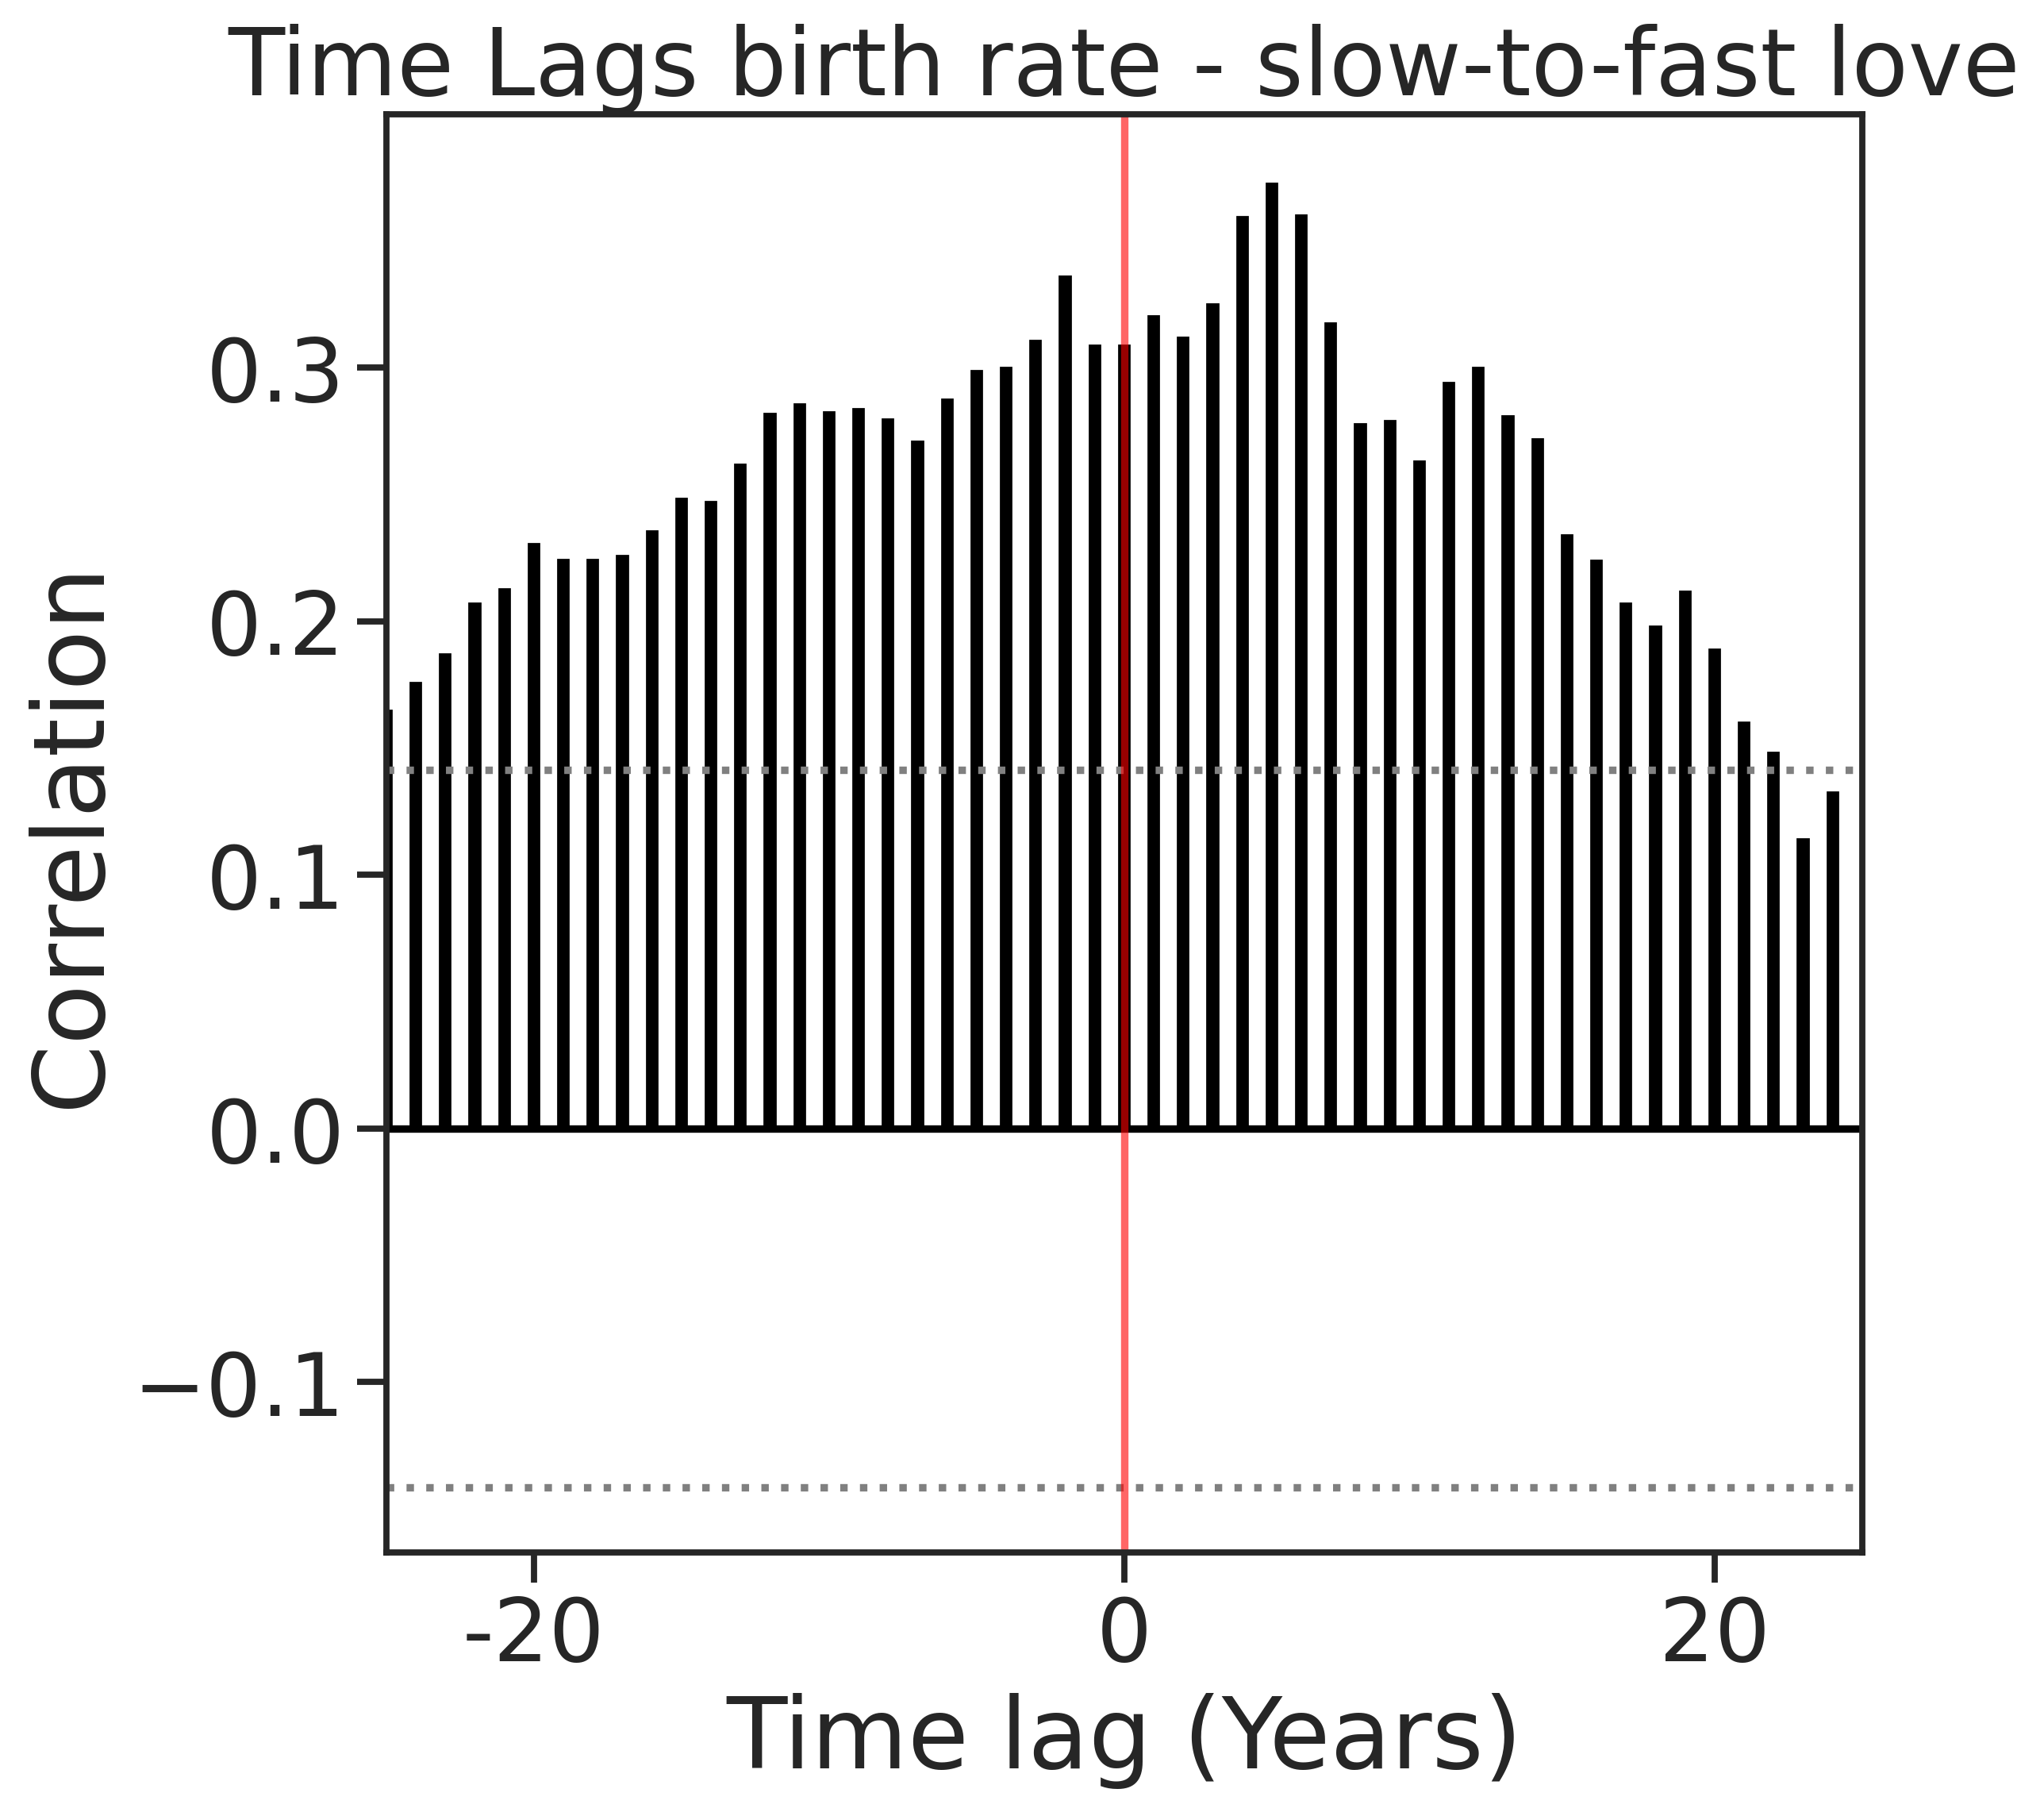

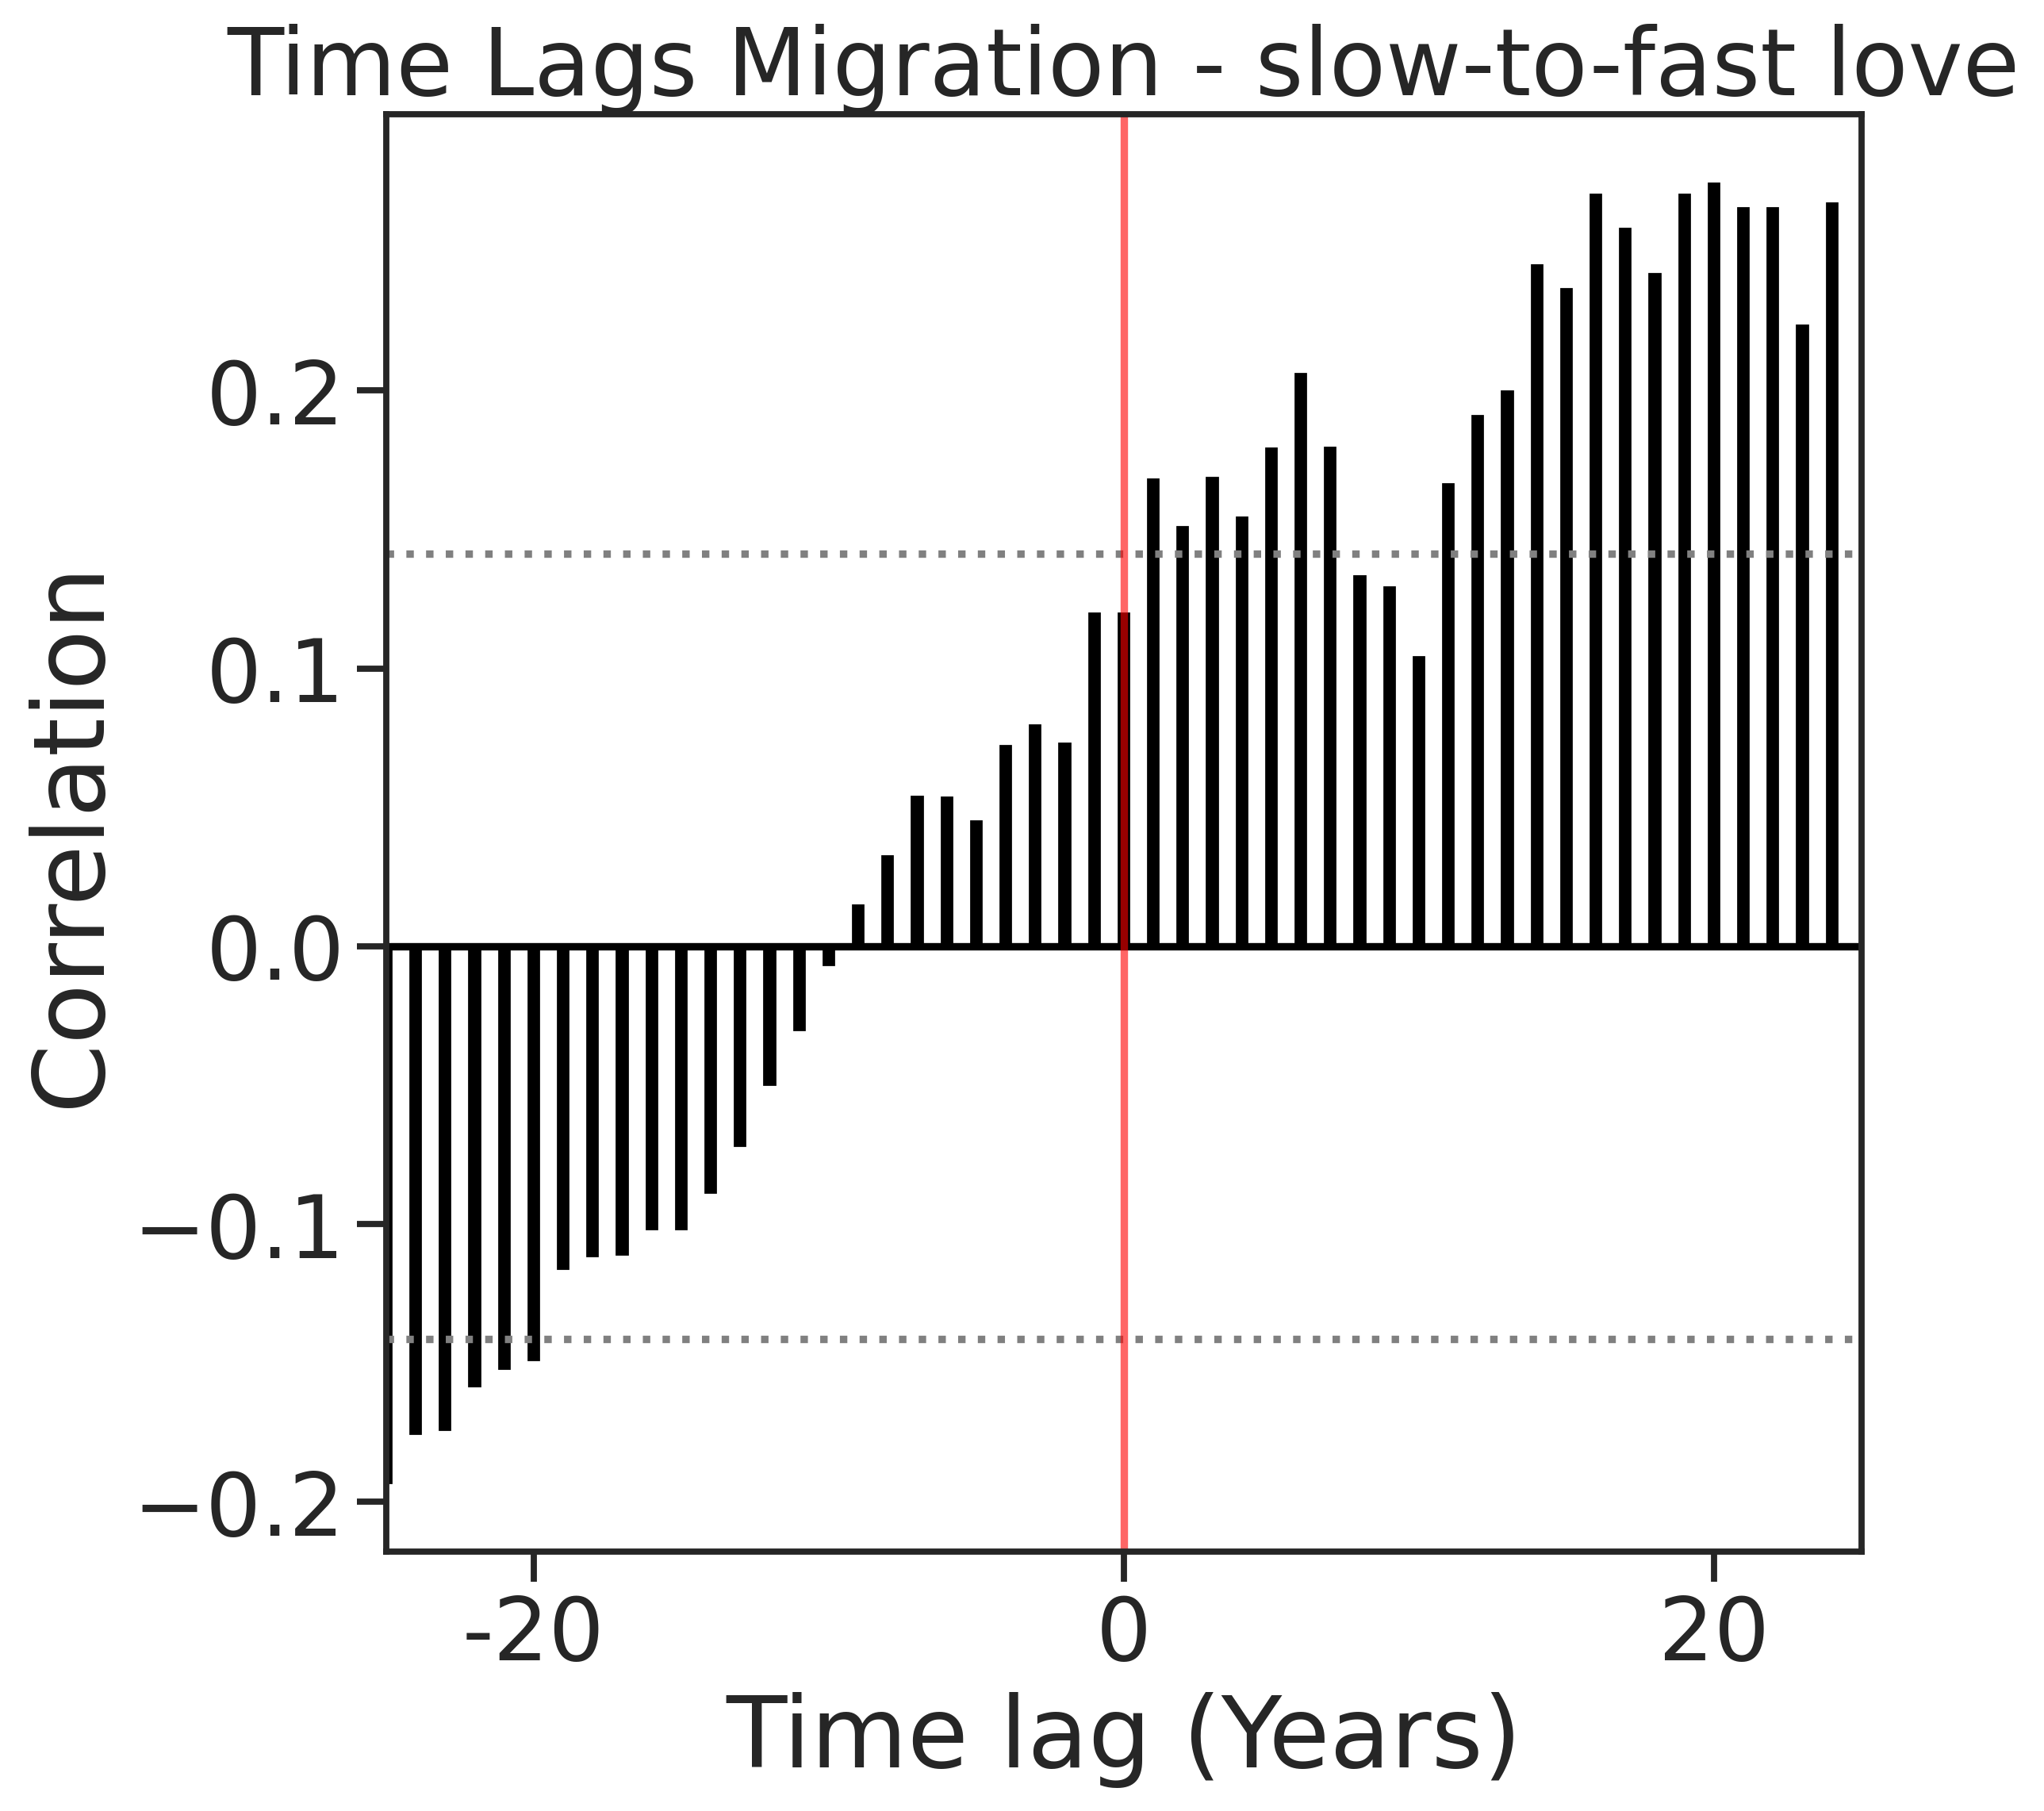

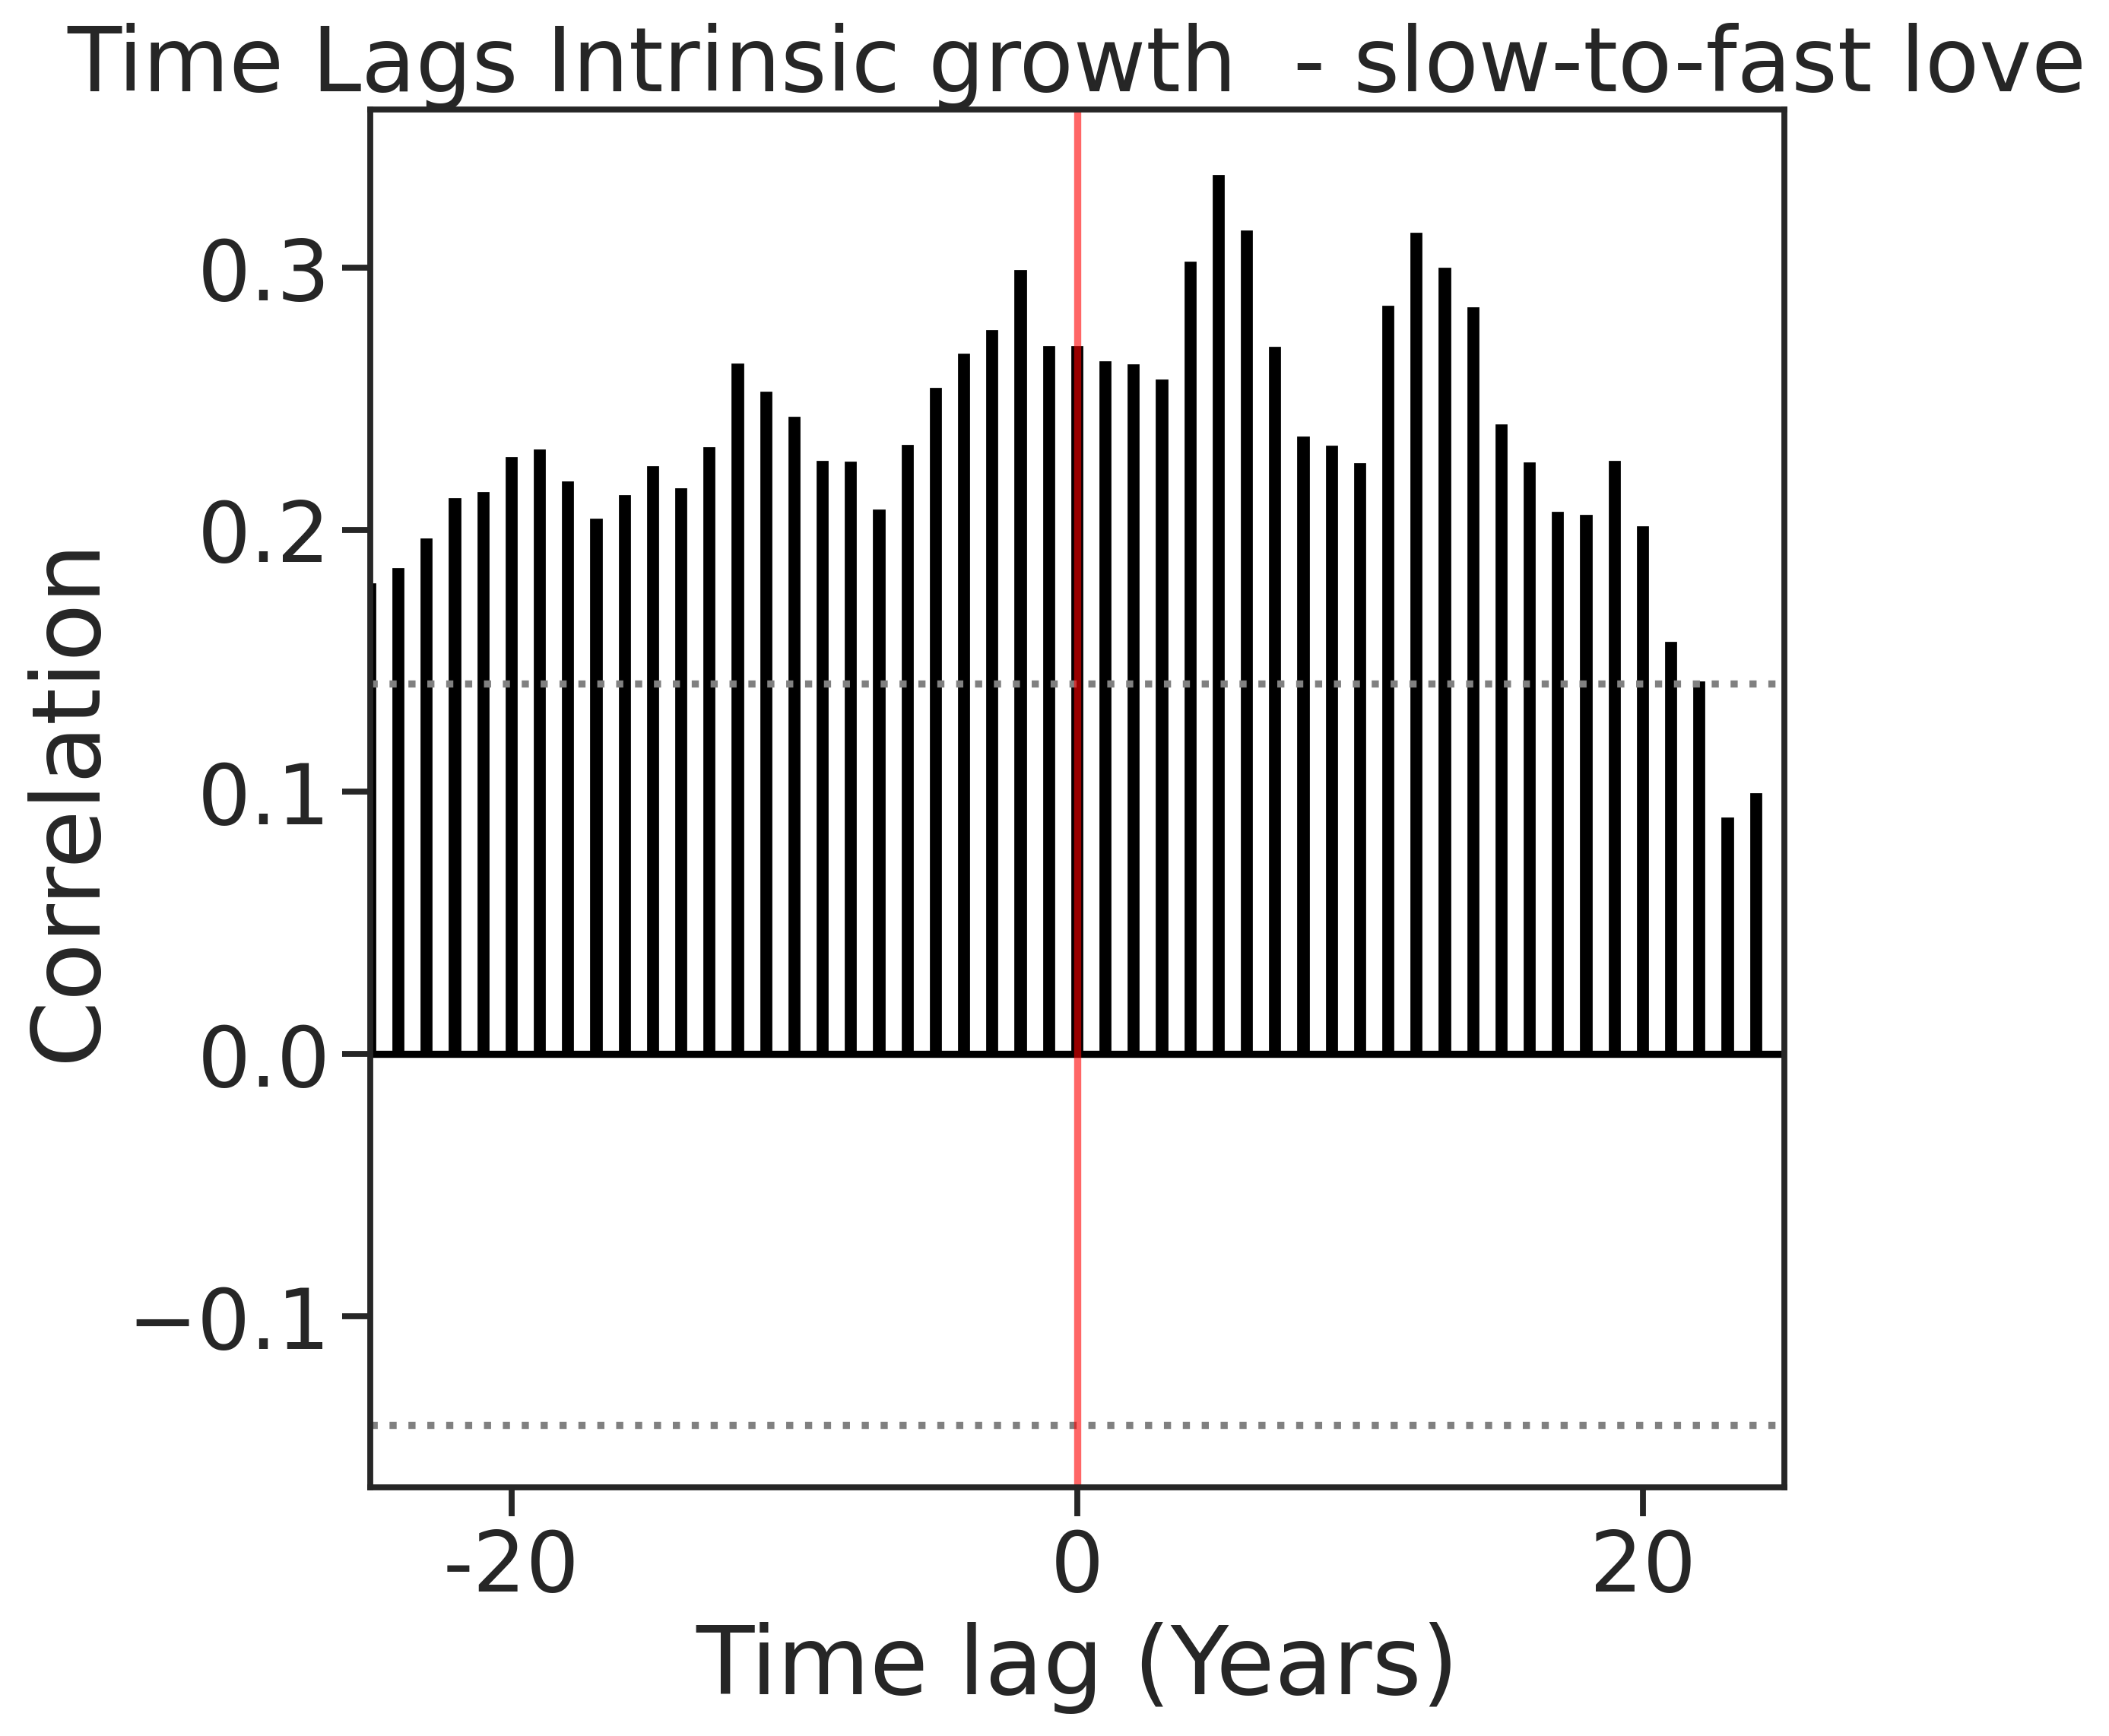

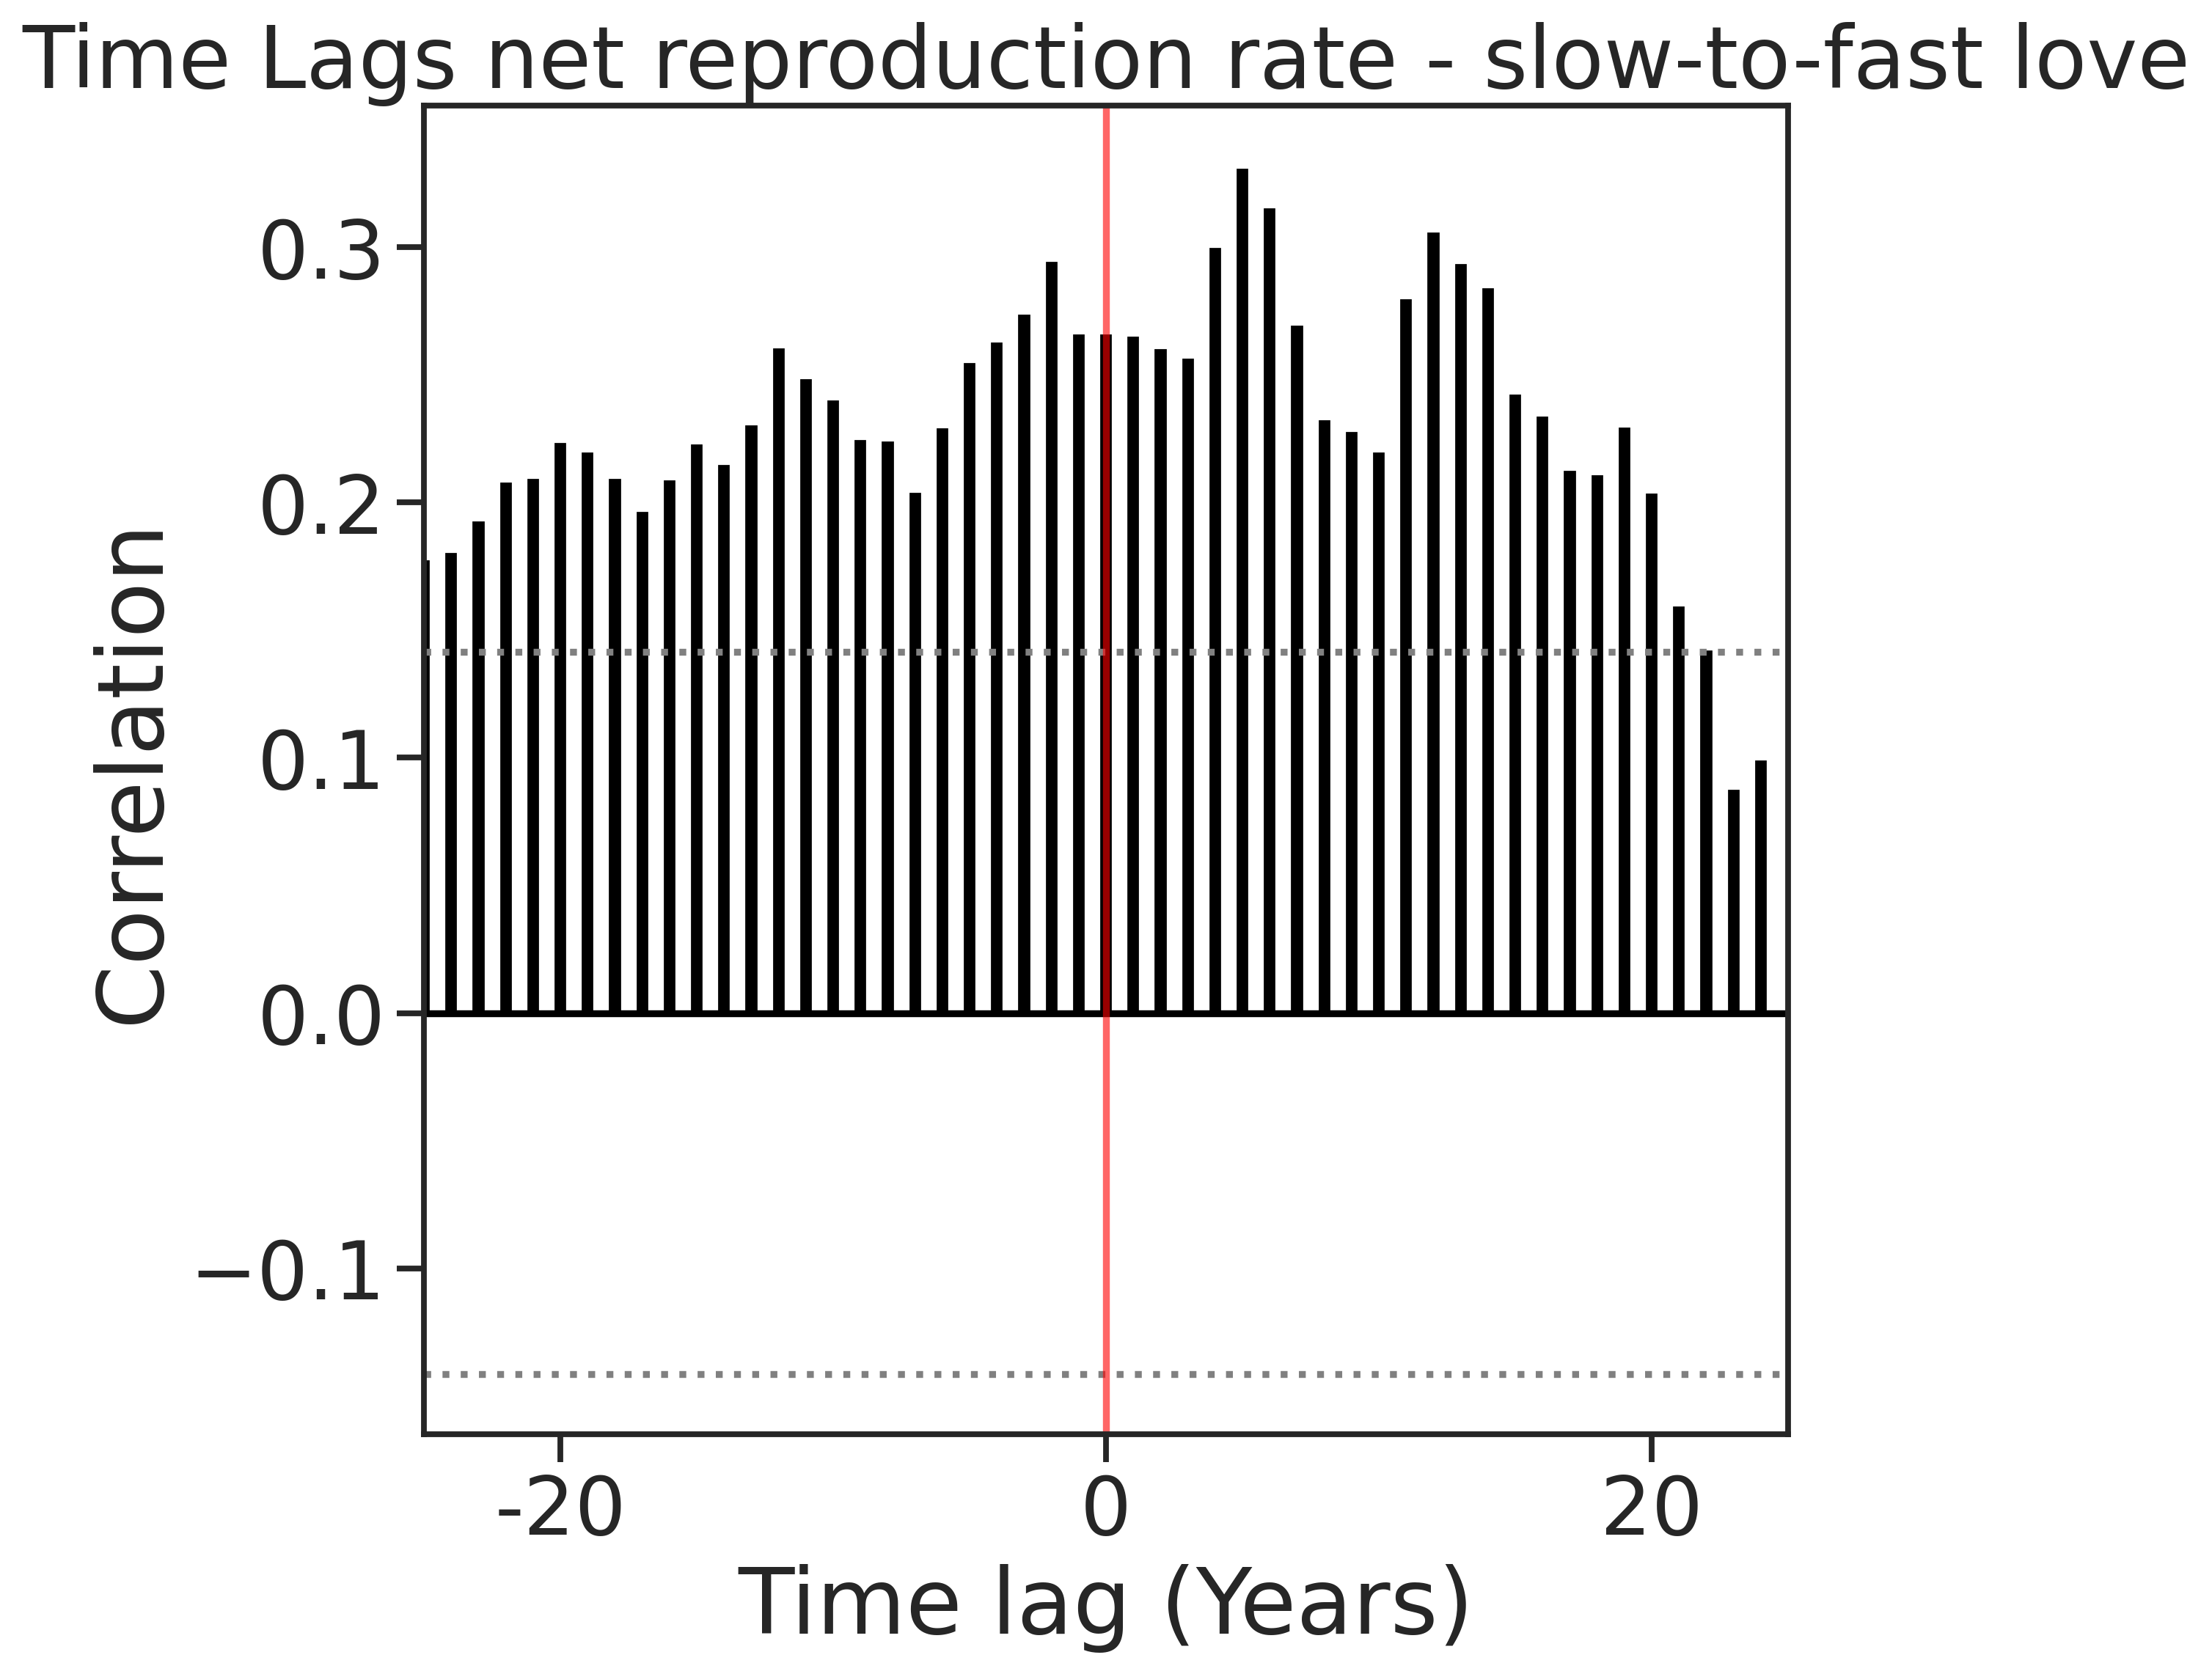

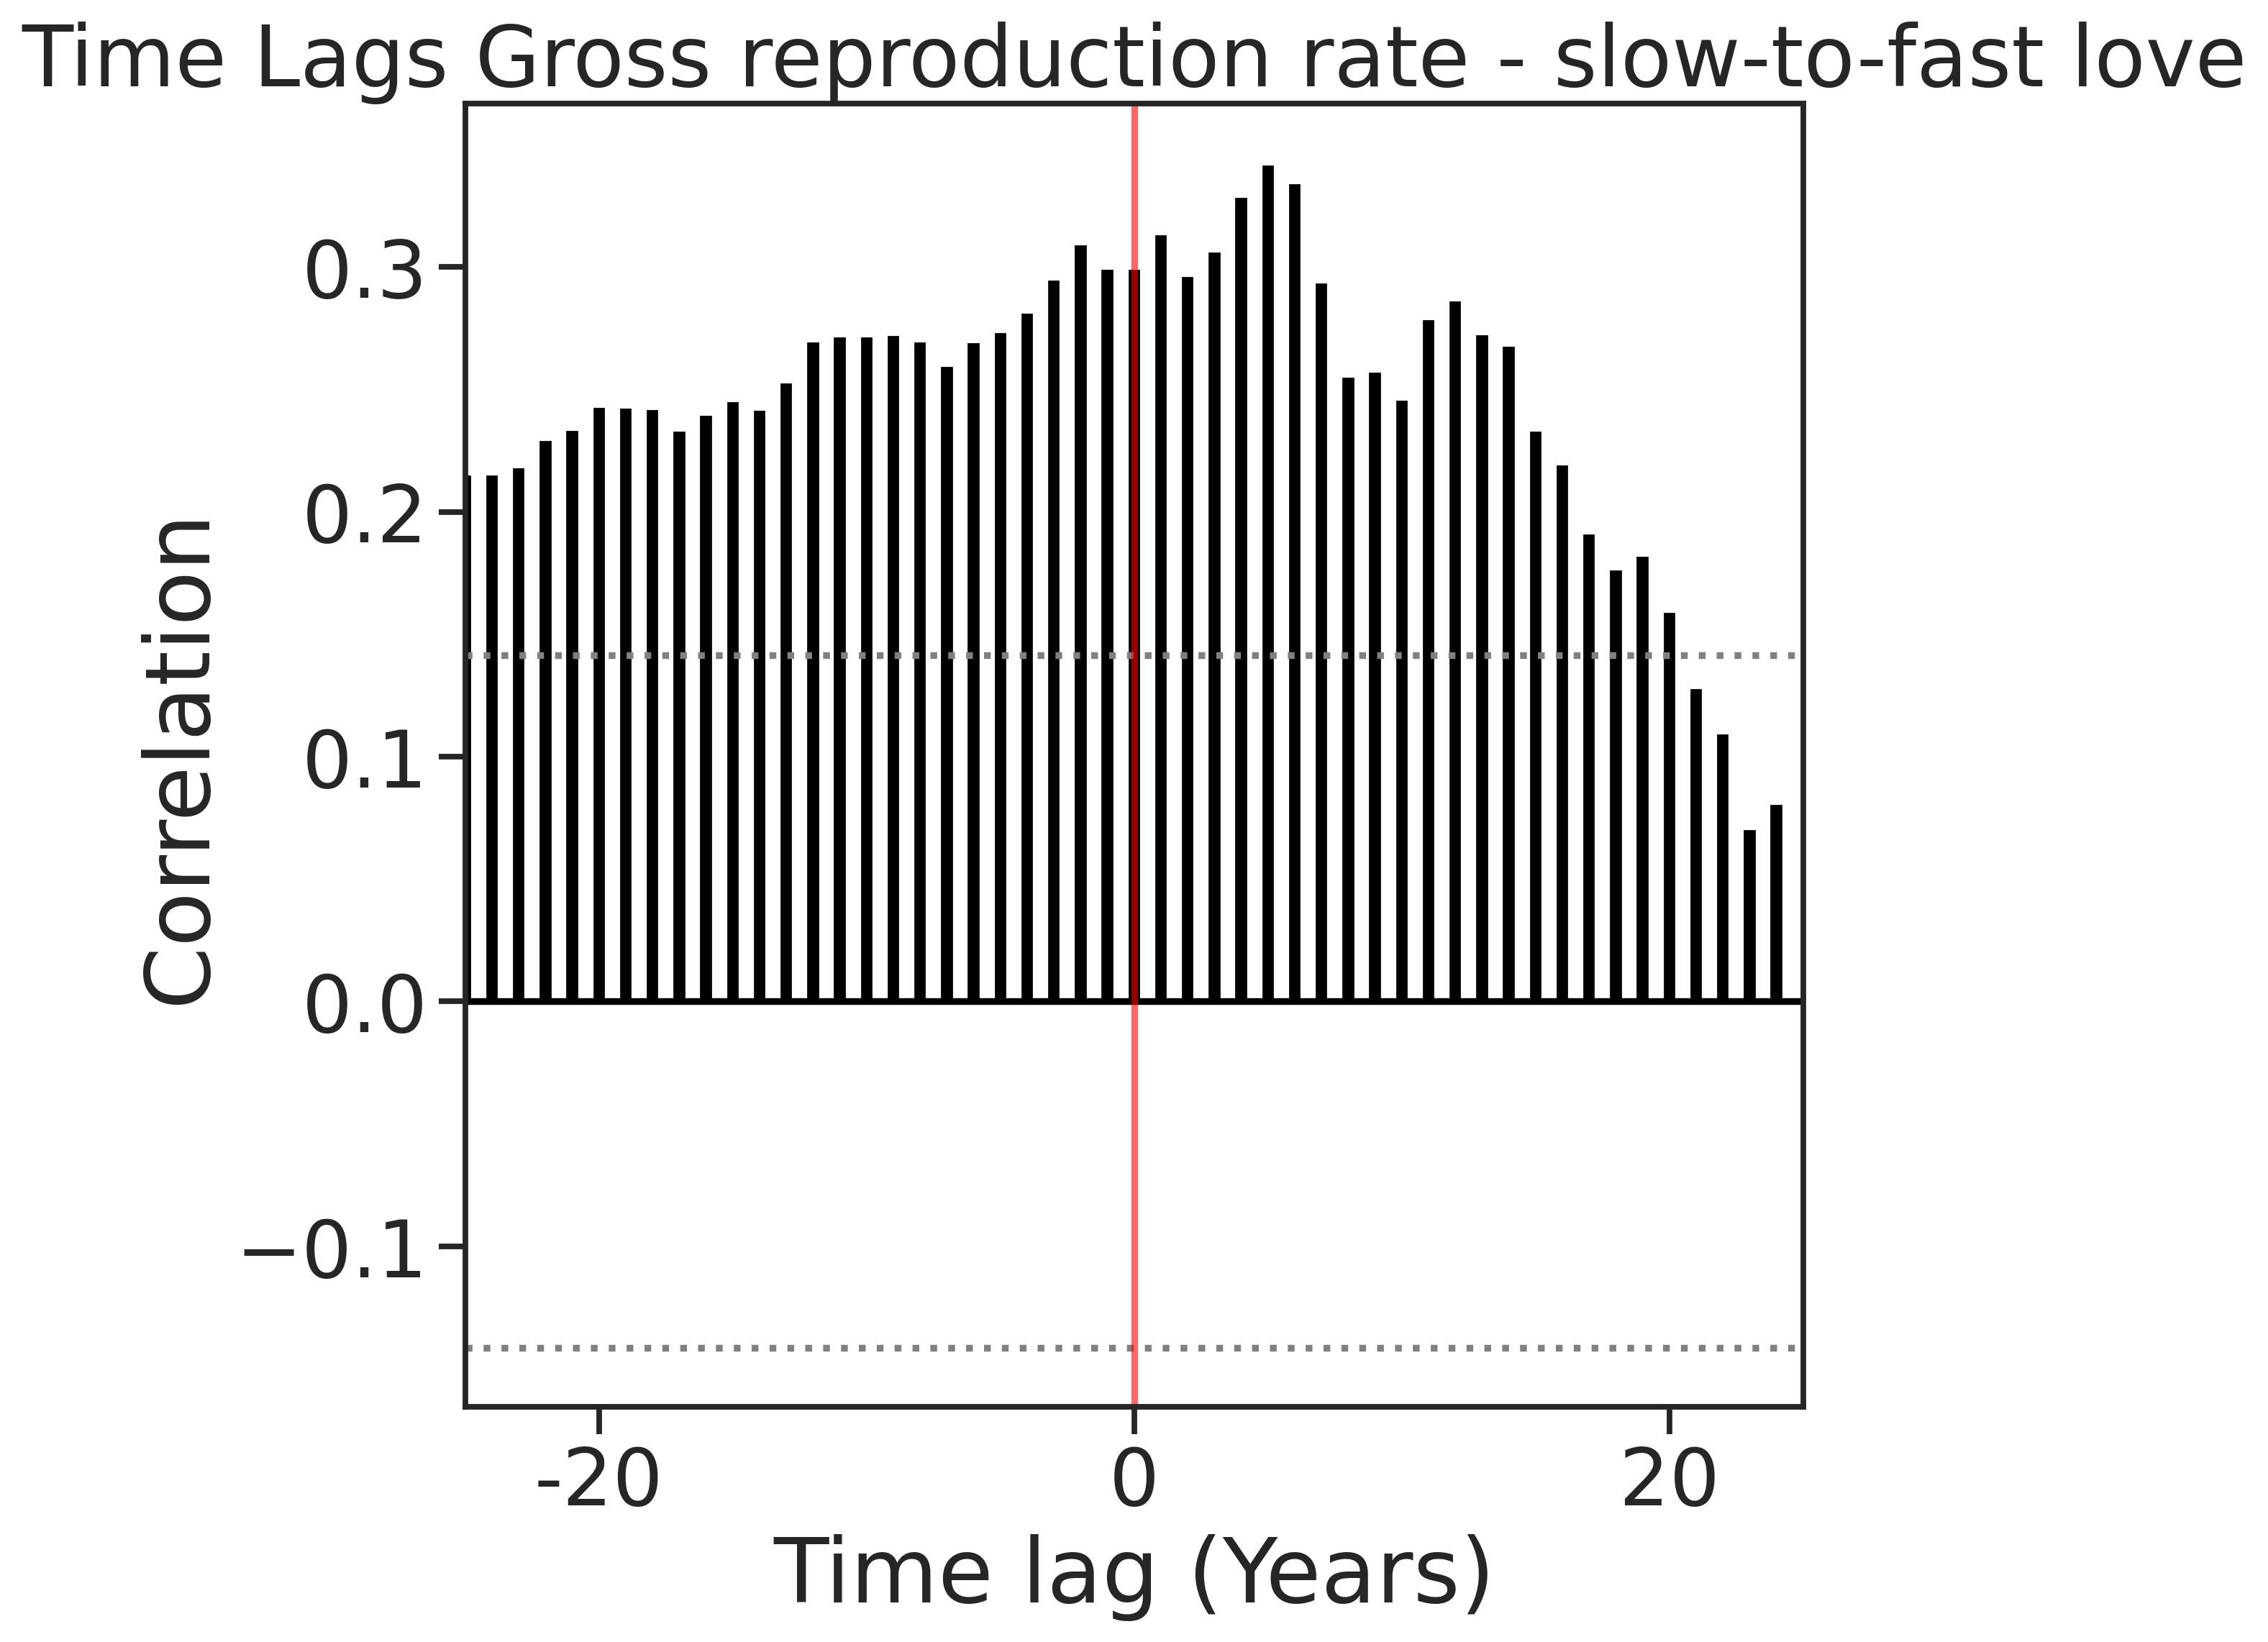

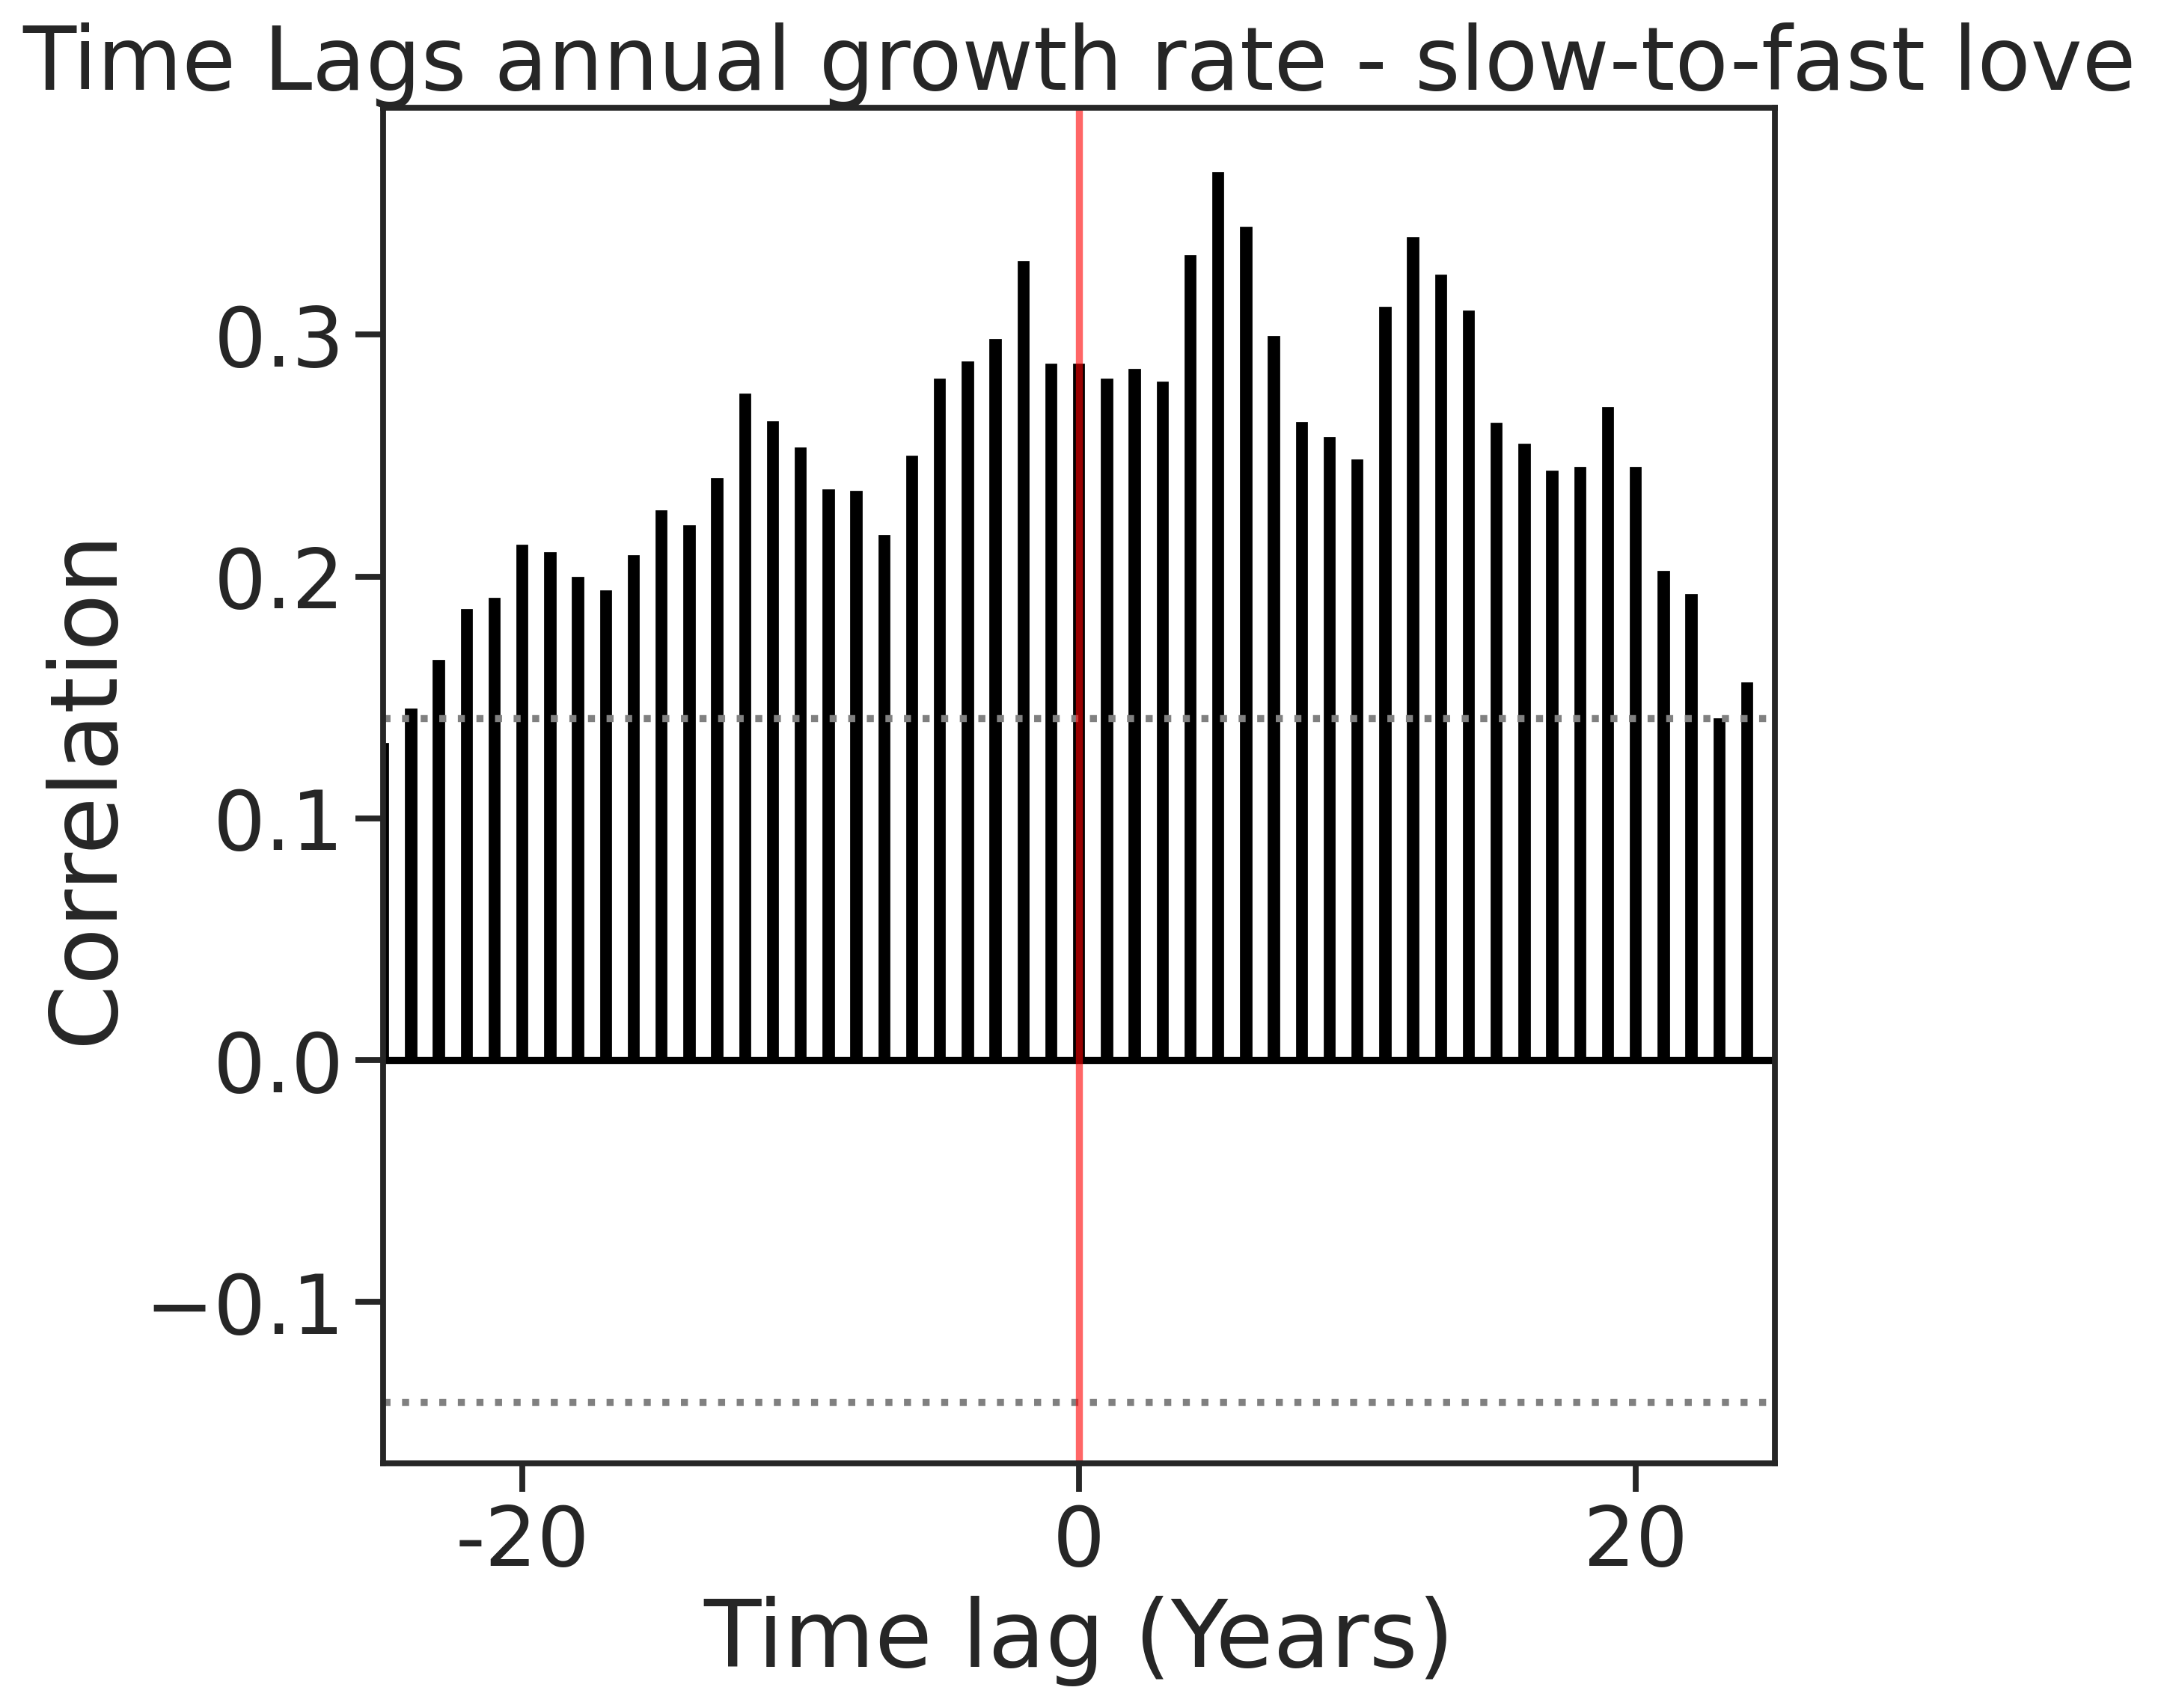

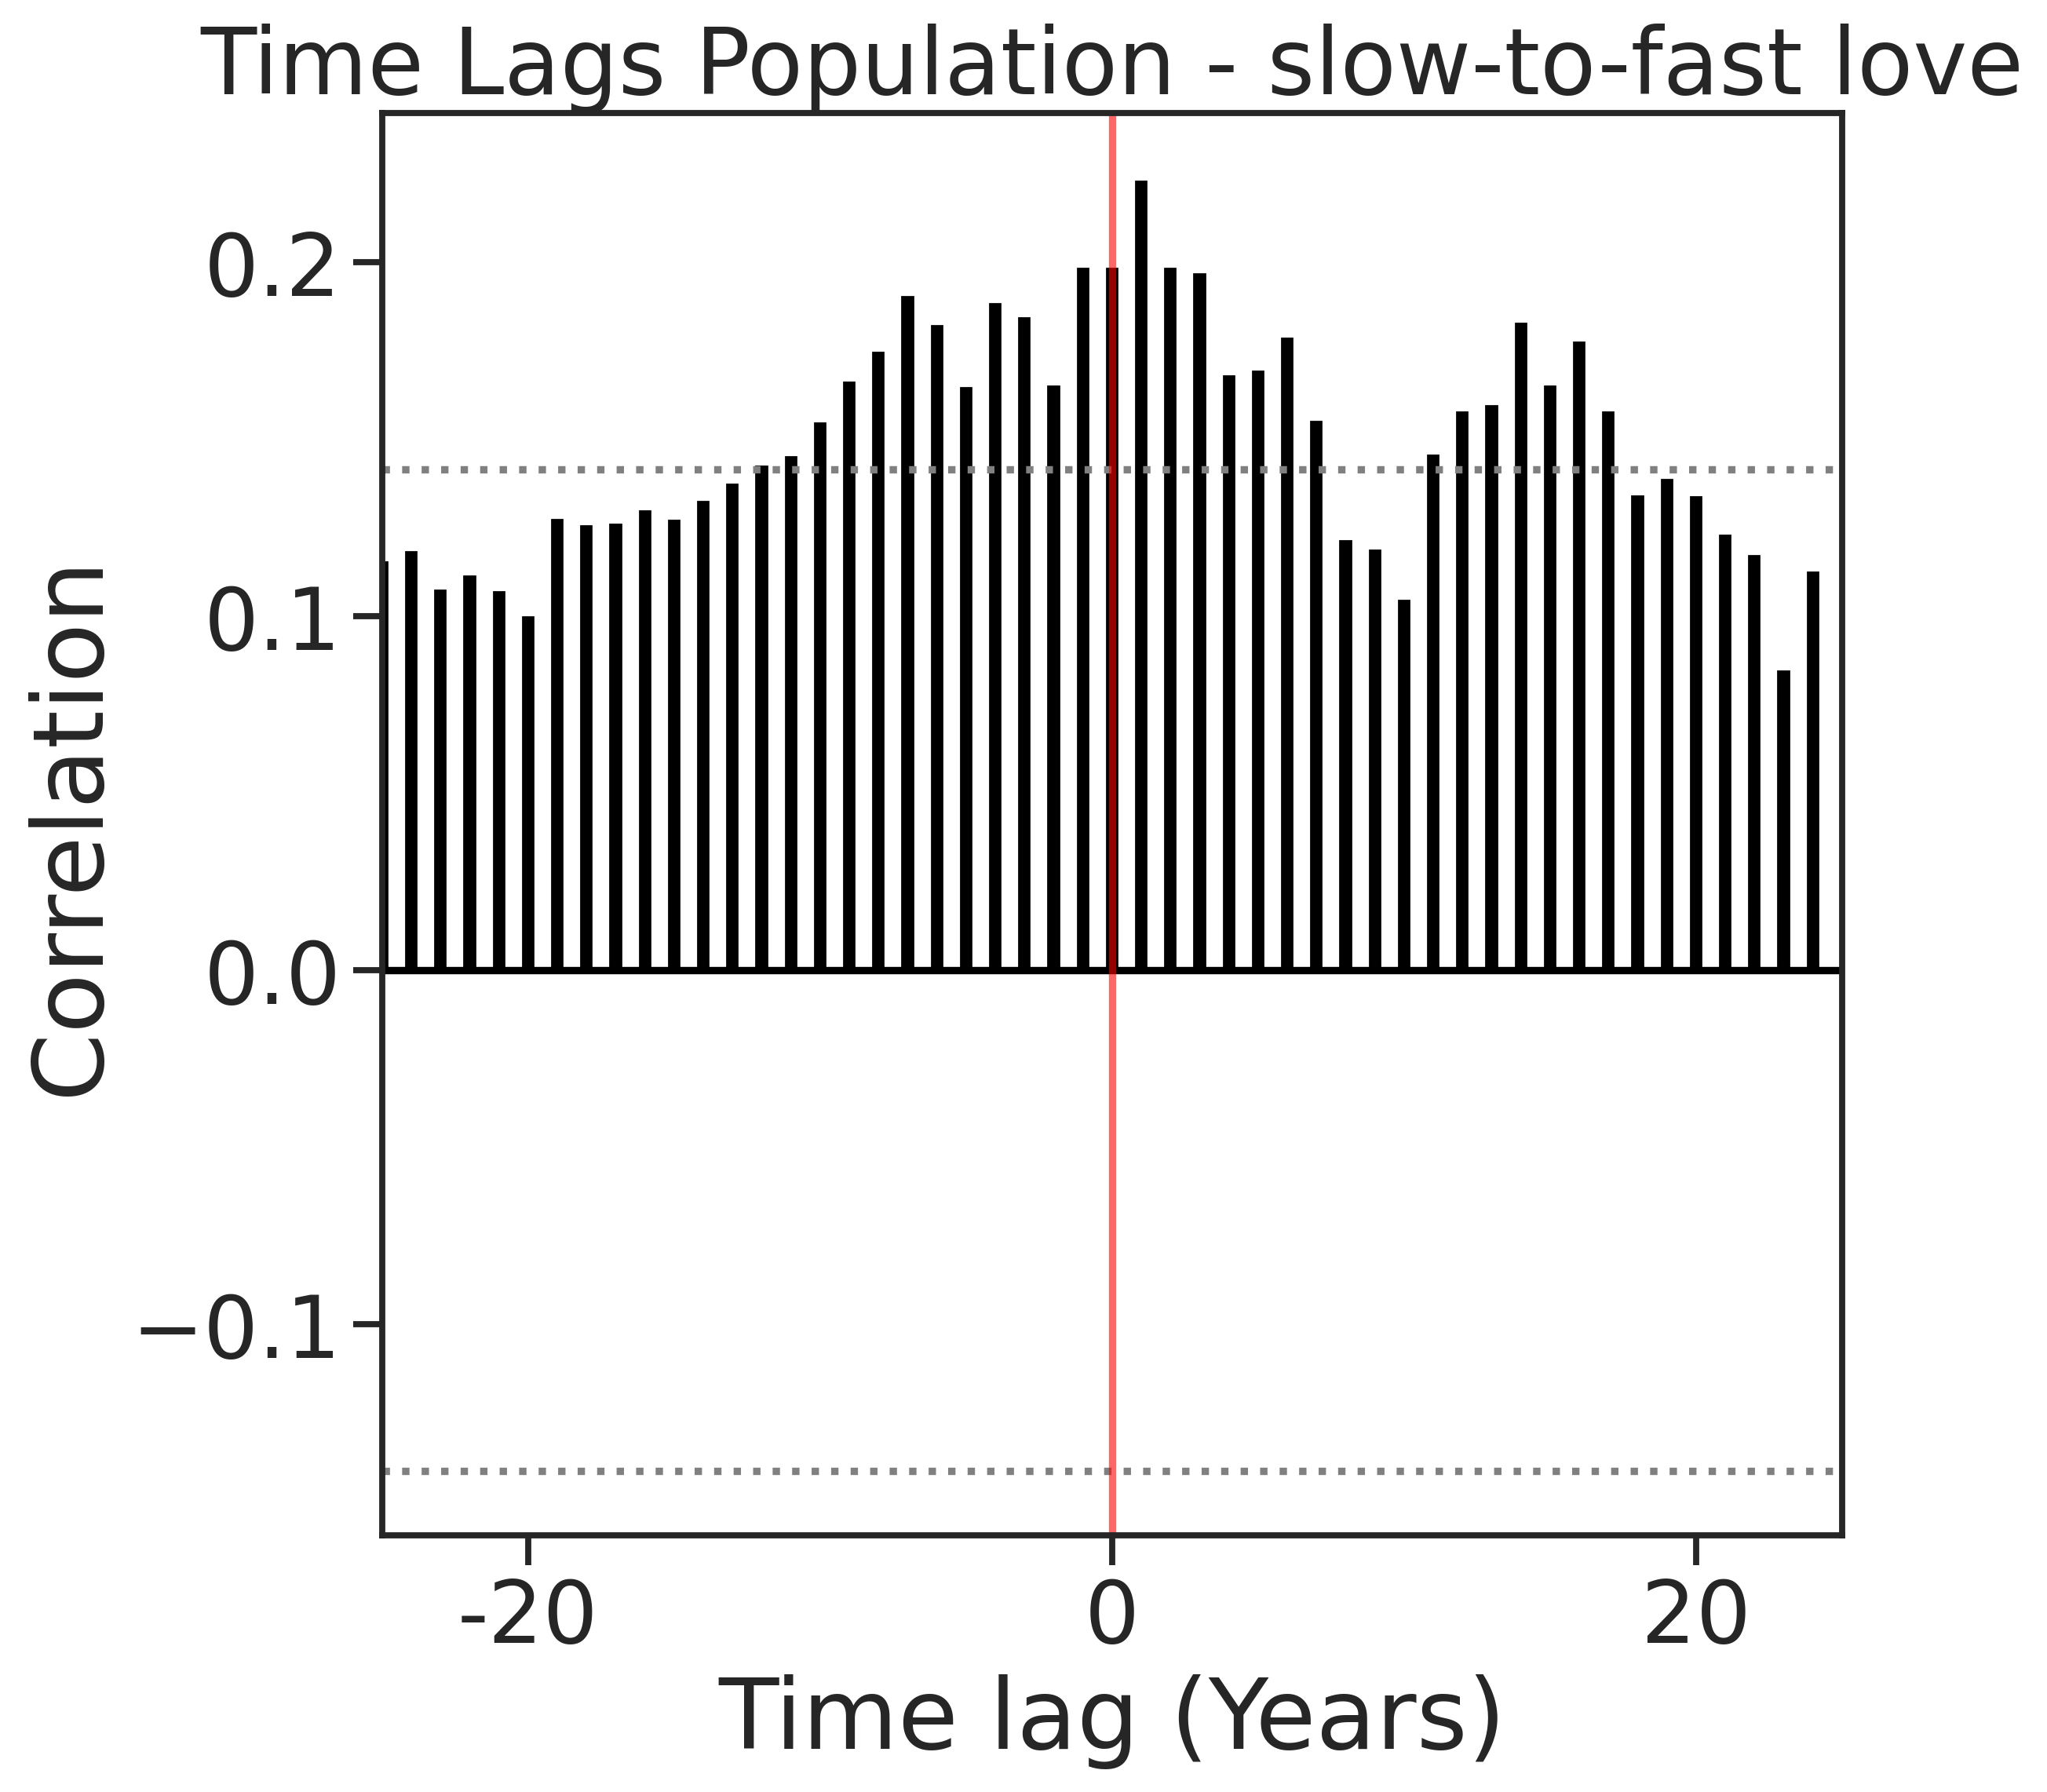

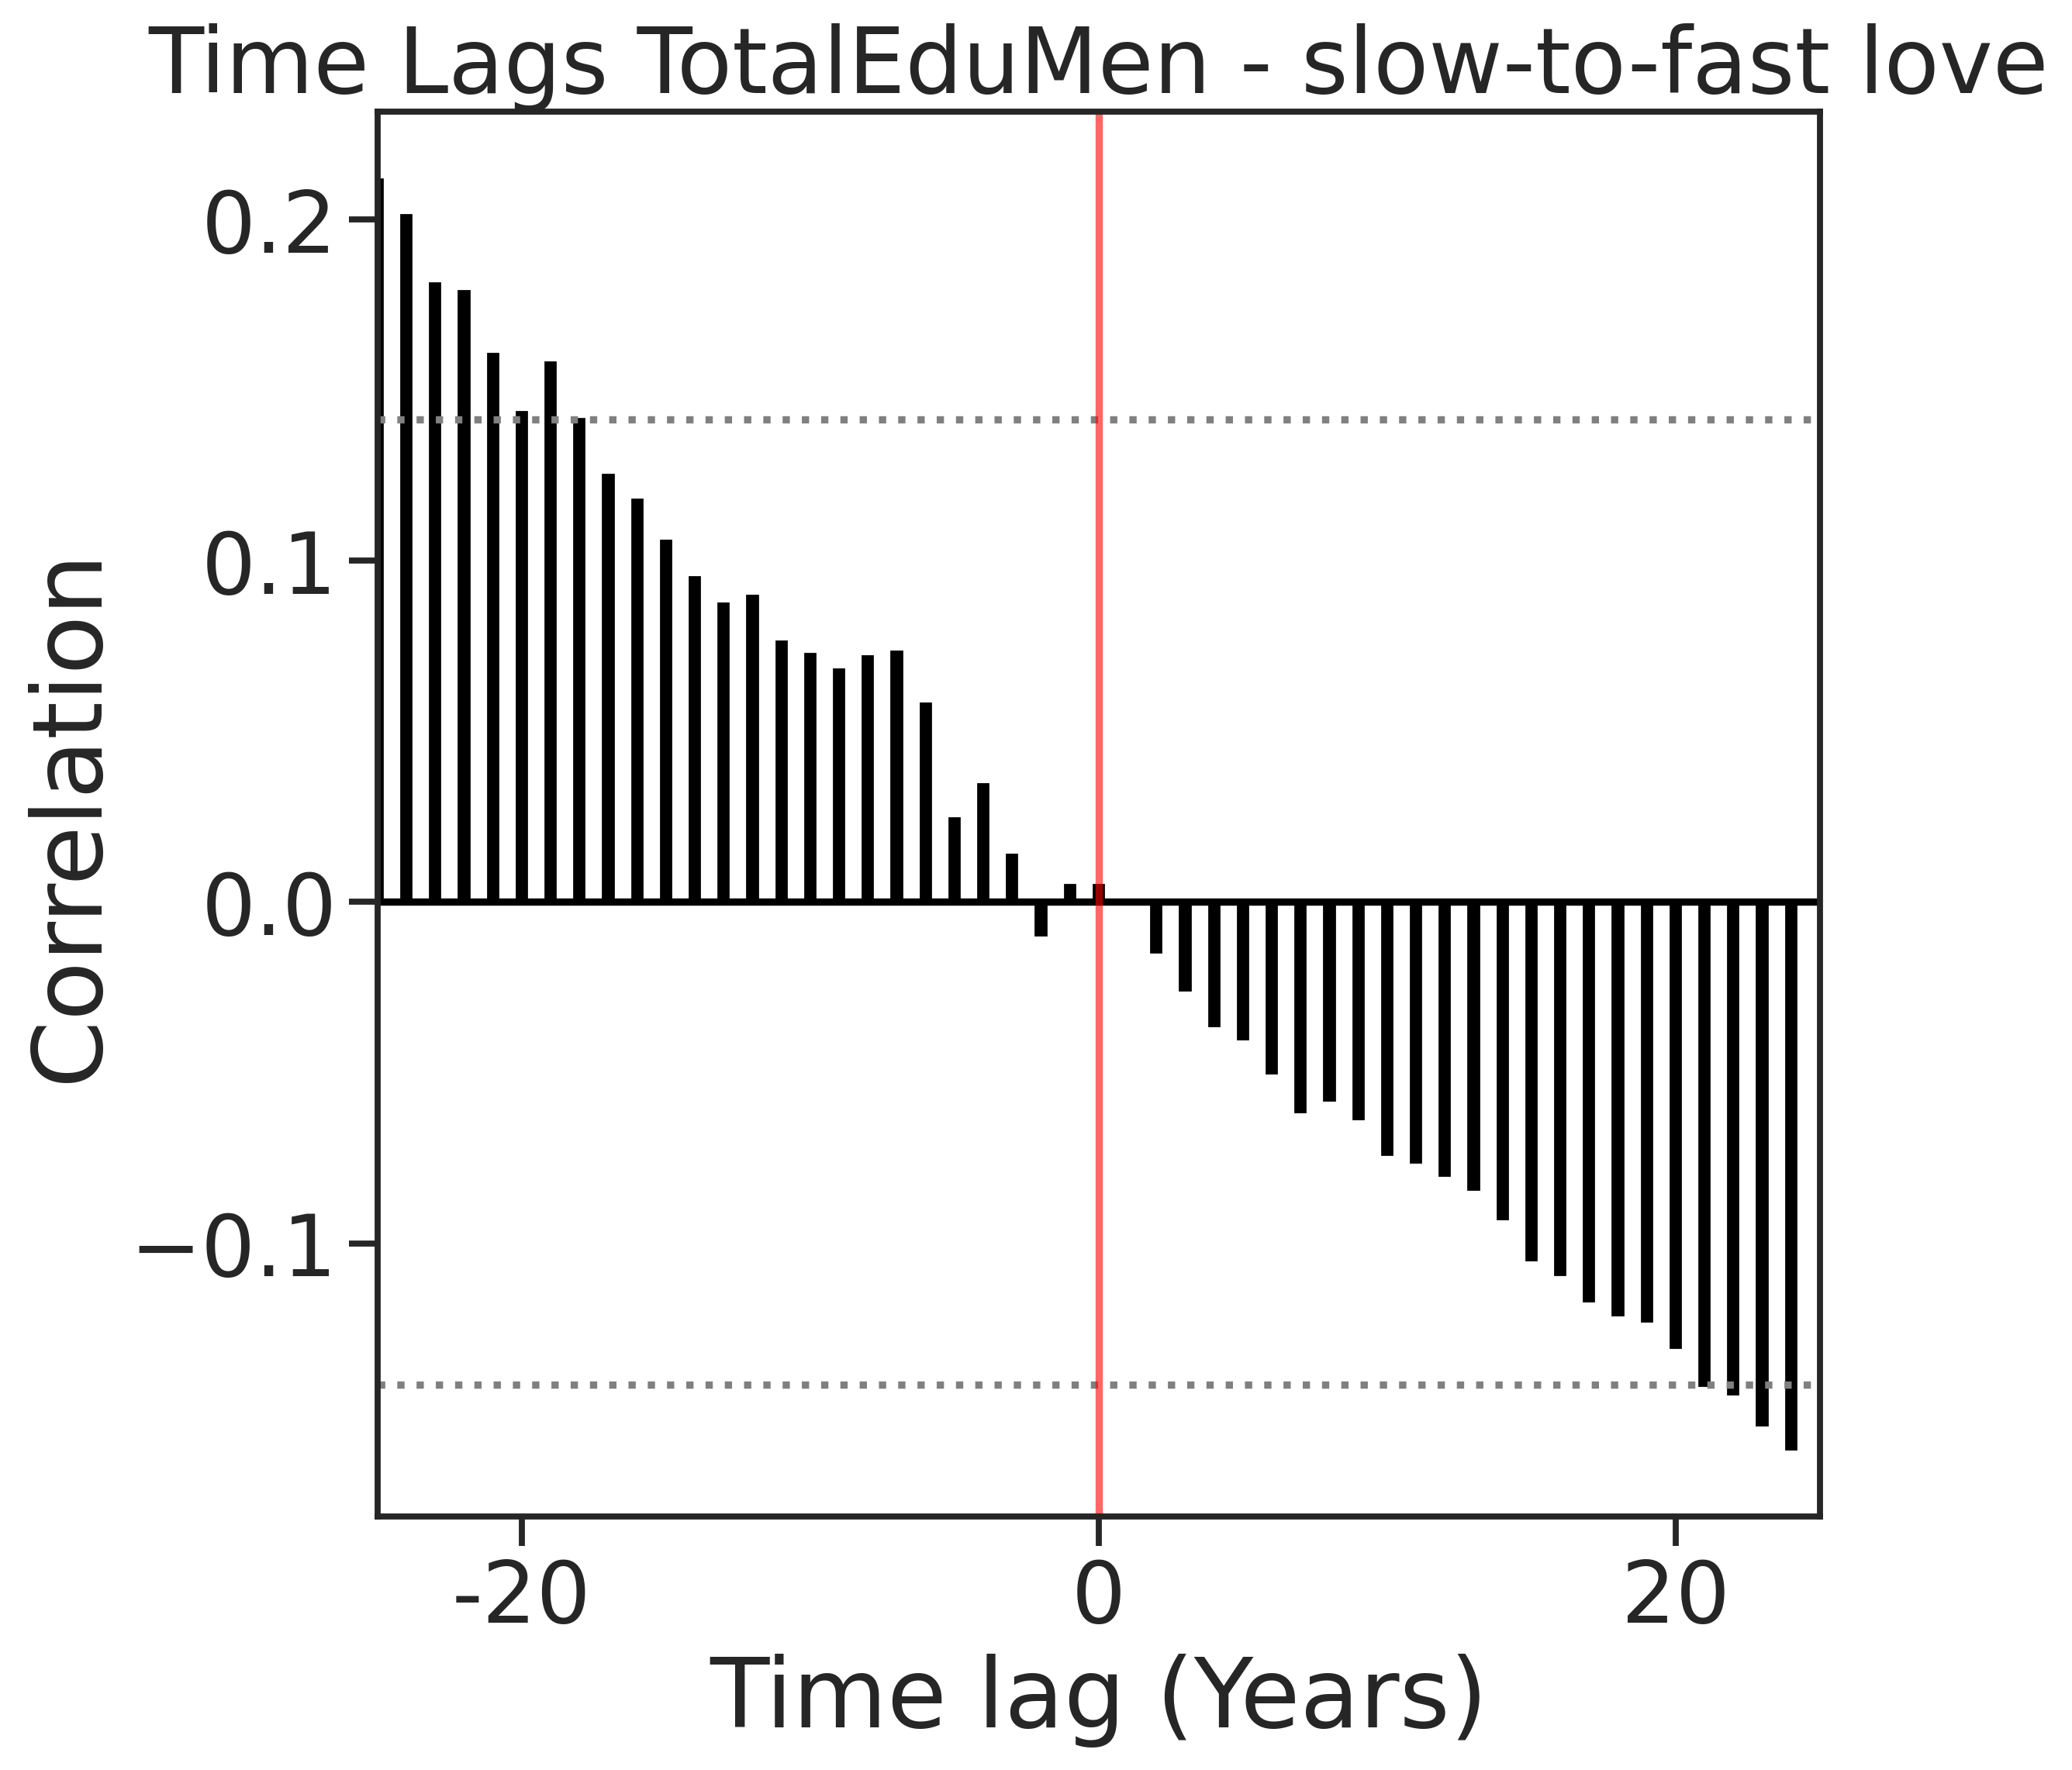

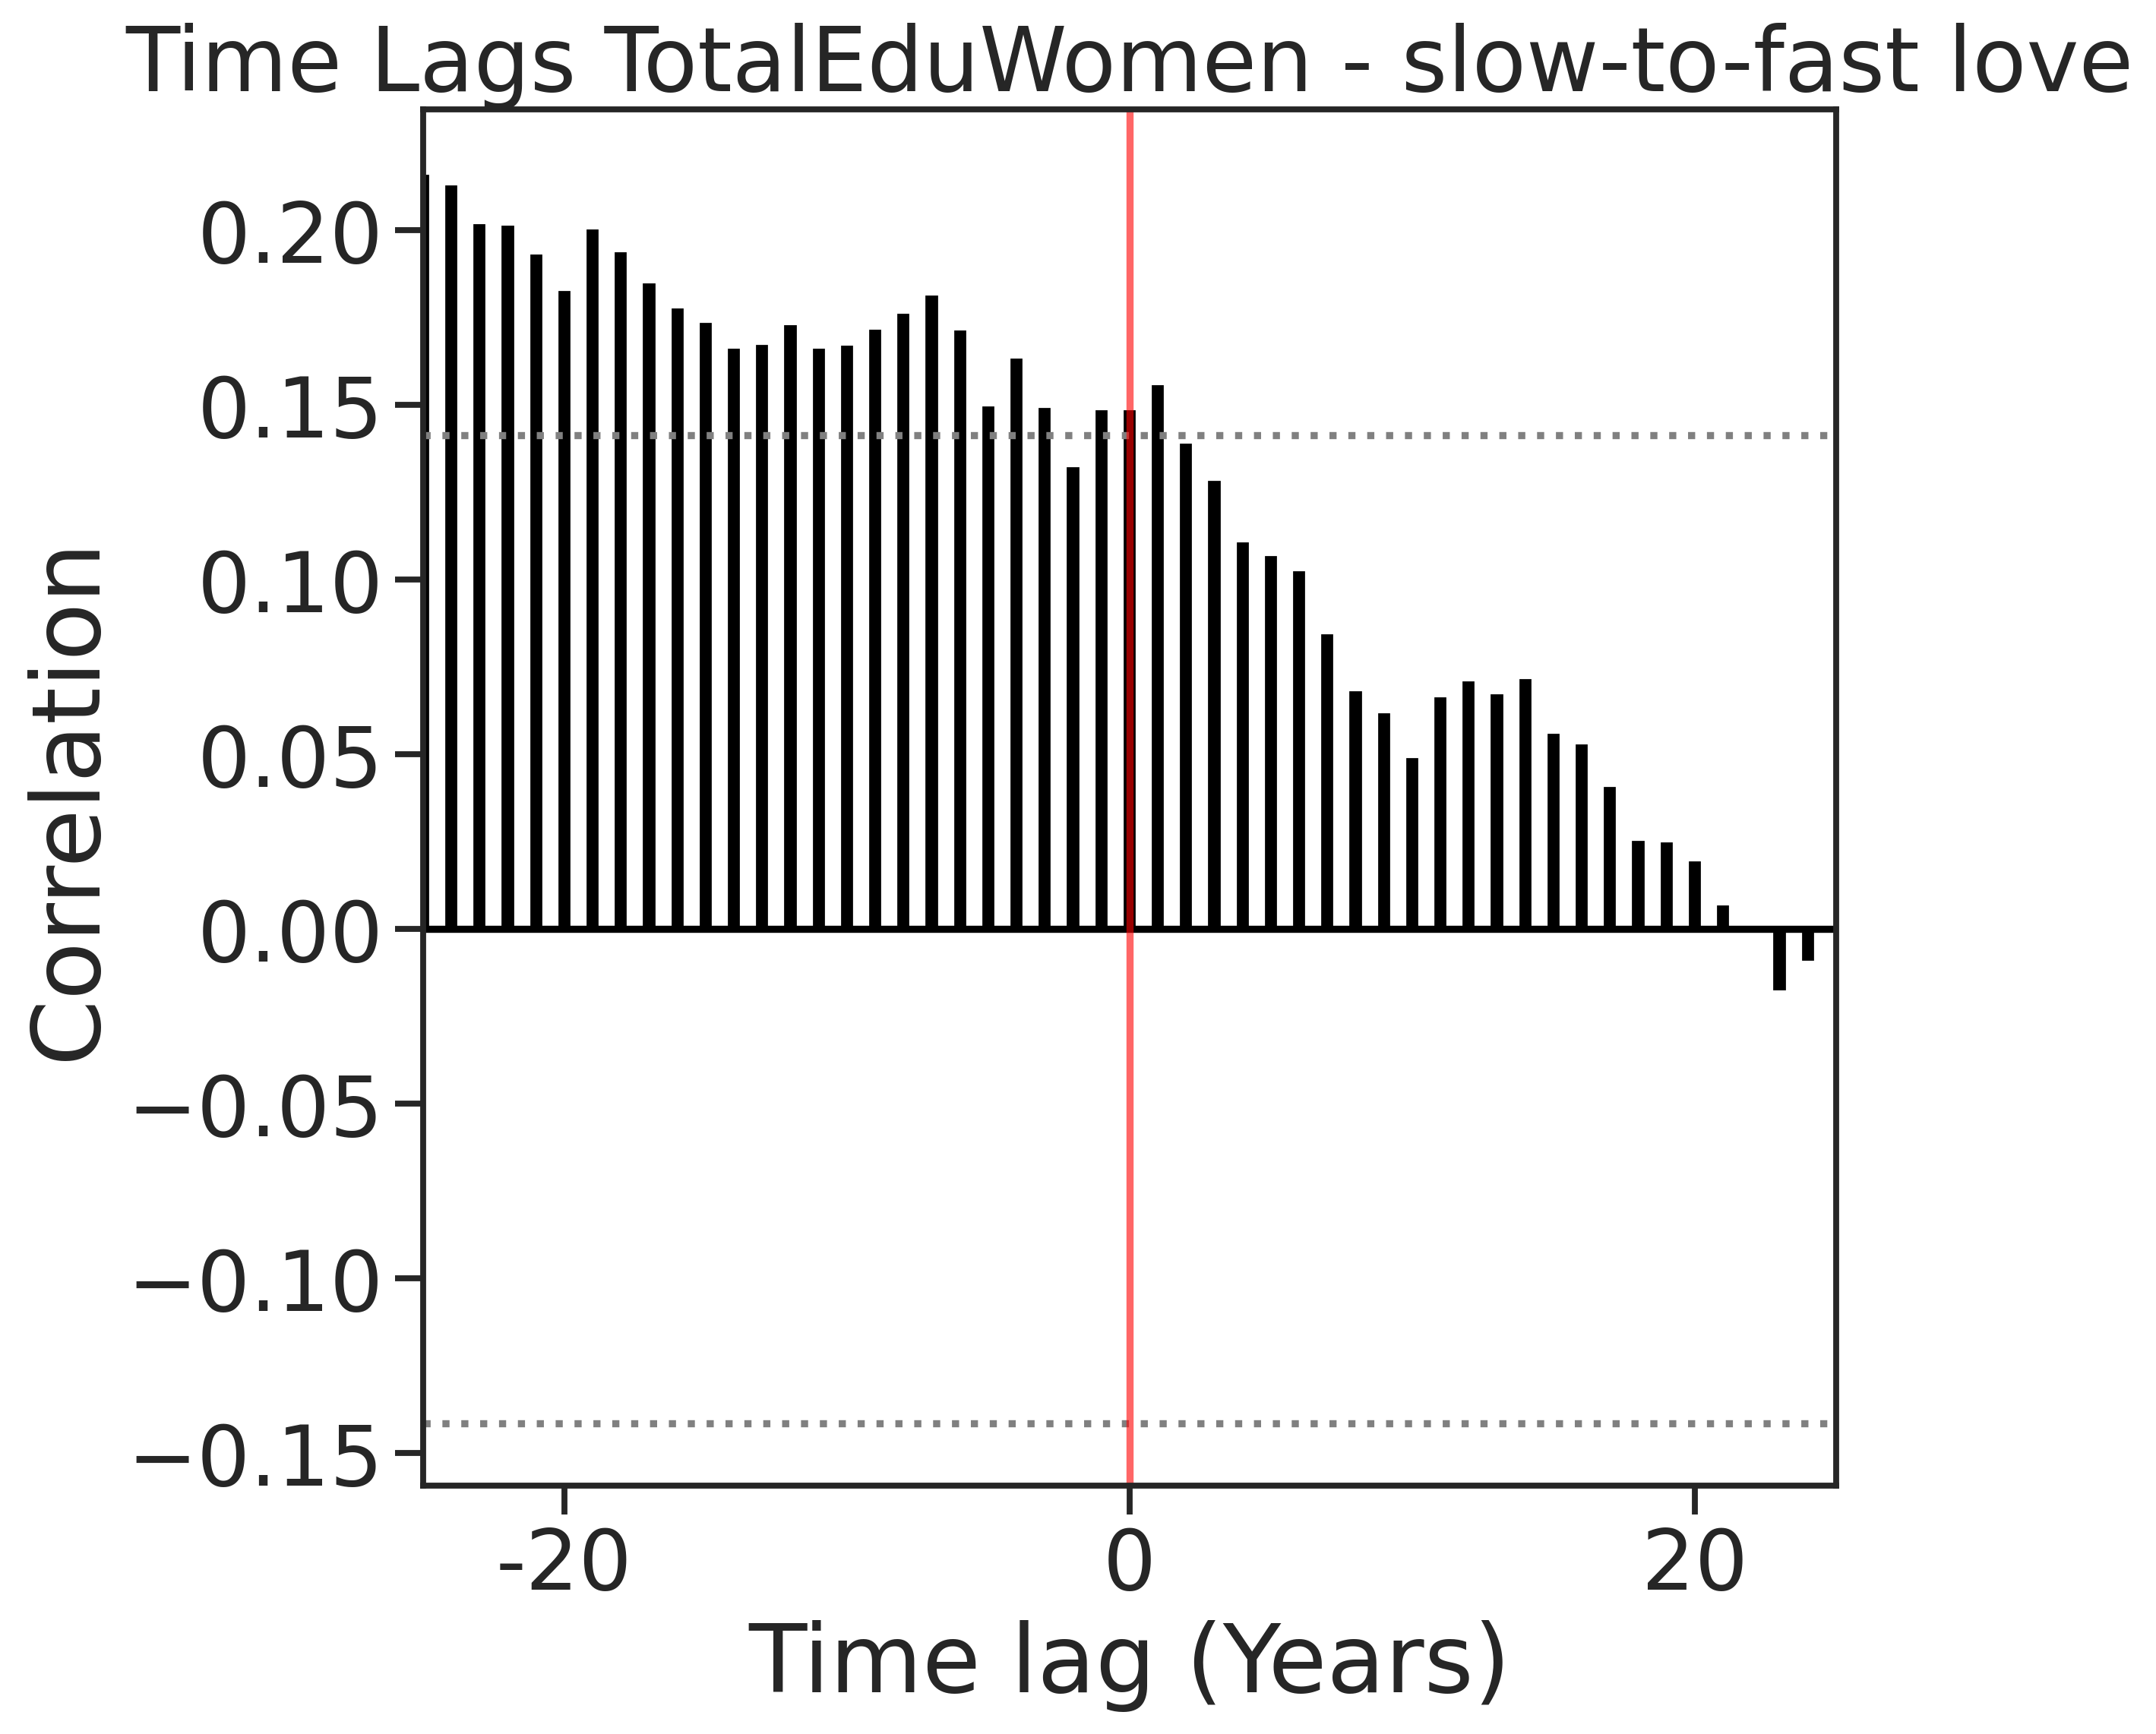

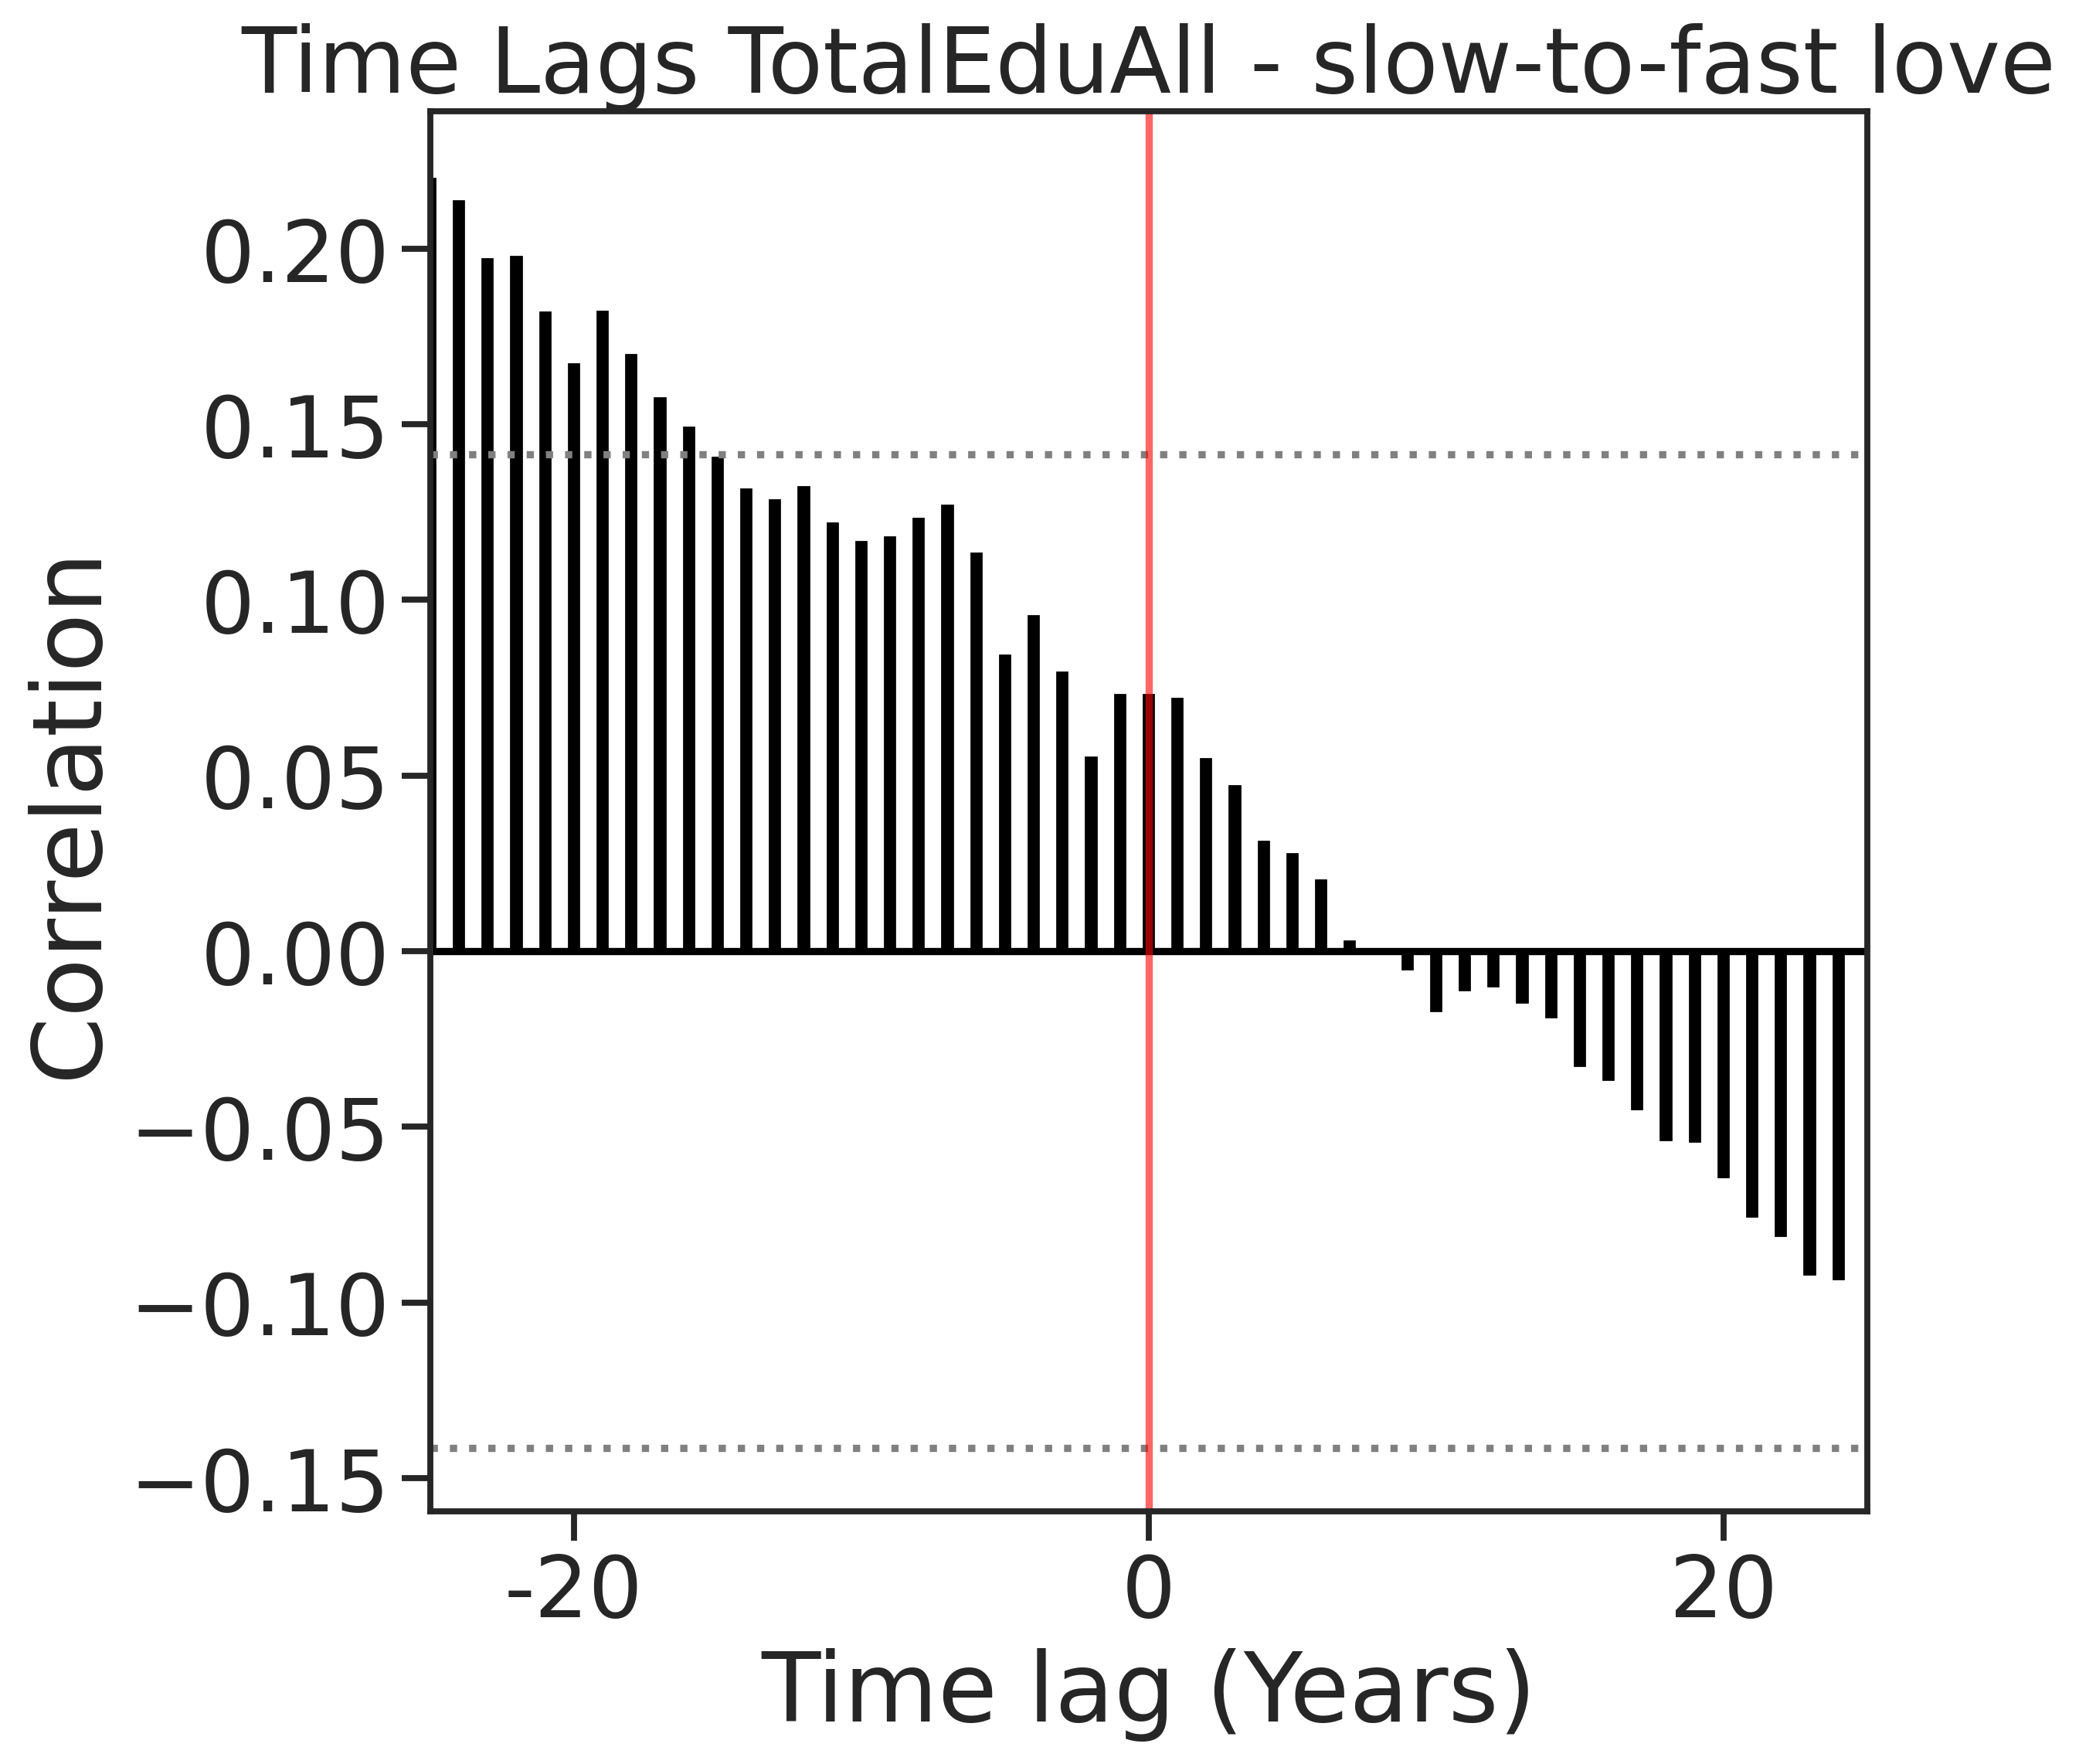

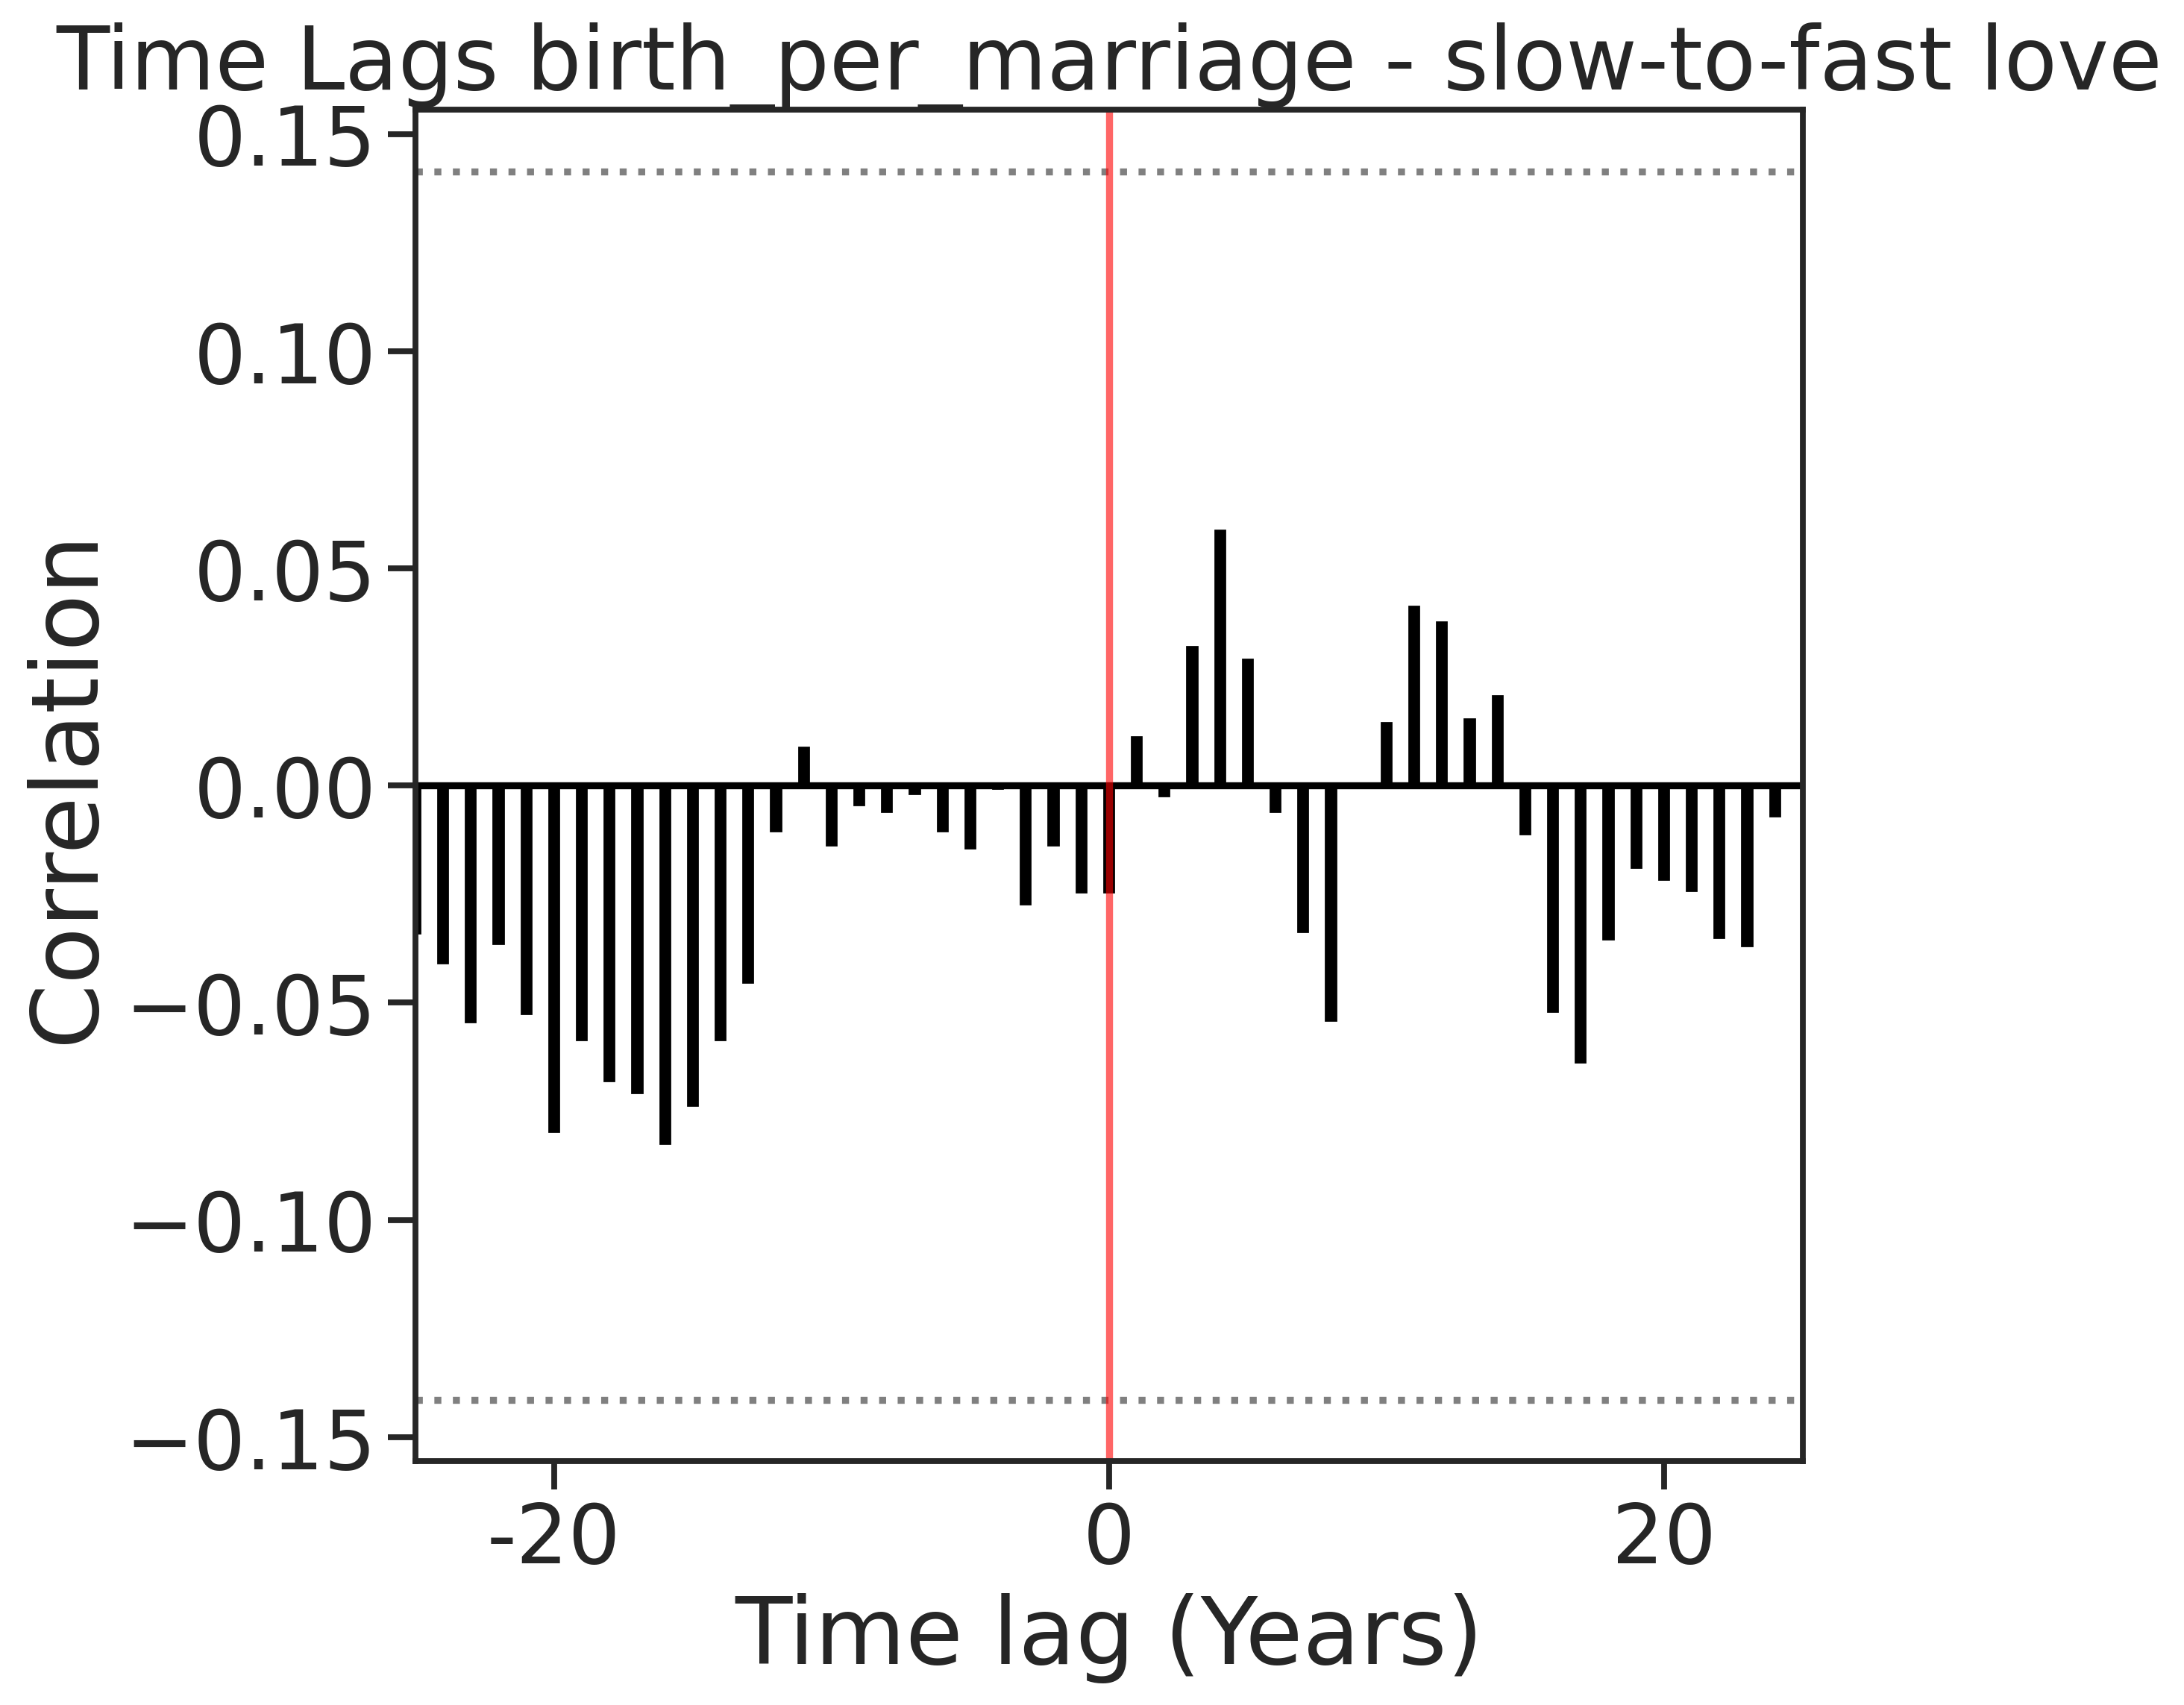

In [ ]:
df8 = df3.copy()

## the civil war period had no theatre
#df8 = df7[(df7["year"] < 1642) | (df7["year"] > 1651)]

df8['slow-to-fast love'] = df3['ratio_feelings2_Out']

ratio_list=['slow-to-fast love'] 
socio_economic_list = graph_vars2


for var1 in  ratio_list:
    for var2 in socio_economic_list:
        
        ## Remove outliers
        #print(df8)
        df8 = remove_outlier(df8, var1)        
        rolling_item = df8[var1].rolling(window=3)
        var3 = str(var1)
        df8['Love'] = rolling_item.mean()
        
        ccf_plot (var2,var1,df8)